In [1]:
!pip install ultralytics
# ПРАВИЛЬНО:
import matplotlib  # Сначала импортируем matplotlib
import ultralytics
import os
print(f"   ✅ Matplotlib: {matplotlib.__version__}")

# Теперь импортируем pyplot
import matplotlib.pyplot as plt
print(f"   ✅ Matplotlib.pyplot: импортирован")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
   ✅ Matplotlib: 3.10.0
   ✅ Matplotlib.pyplot: импортирован


In [2]:
# ========== БЛОК 2: МОНТИРОВАНИЕ GOOGLE DRIVE ==========
print("=" * 70)
print("📁 БЛОК 2: МОНТИРОВАНИЕ GOOGLE DRIVE")
print("=" * 70)

import os
from pathlib import Path
import sys

# Глобальное определение BASE_PATH
global BASE_PATH

# Проверяем, не смонтирован ли уже Google Drive
drive_mounted = False
if os.path.exists('/content/drive'):
    print("✅ Google Drive уже смонтирован")
    drive_mounted = True
else:
    print("⏳ Монтируем Google Drive...")
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        drive_mounted = True
        print("✅ Google Drive успешно смонтирован")
    except Exception as e:
        print(f"❌ Ошибка монтирования Google Drive: {e}")
        drive_mounted = False

# Определяем базовый путь
if drive_mounted:
    BASE_PATH = Path('/content/drive/MyDrive/Colab Notebooks/XVL')
    print(f"\n📂 Базовый путь установлен: {BASE_PATH}")
else:
    print("\n⚠️  Google Drive не смонтирован, используем локальную директорию")
    BASE_PATH = Path('/content/xvl_project')

# Создаем директорию если не существует
BASE_PATH.mkdir(parents=True, exist_ok=True)
print(f"📁 Директория гарантированно создана: {BASE_PATH}")

# Показываем содержимое
print(f"\n📁 Содержимое {BASE_PATH}:")
try:
    items = list(BASE_PATH.iterdir())
    if items:
        for item in items:
            size = ""
            if item.is_file():
                size_mb = item.stat().st_size / (1024**2)
                size = f" ({size_mb:.1f} MB)"
            print(f"   {'📁' if item.is_dir() else '📄'} {item.name}{size}")
    else:
        print("   📭 Директория пуста")
except Exception as e:
    print(f"   ❌ Ошибка чтения директории: {e}")

# Выводим абсолютный путь для проверки
print(f"\n📍 Абсолютный путь BASE_PATH: {BASE_PATH.absolute()}")

# Проверяем запись в директорию
test_file = BASE_PATH / ".test_write"
try:
    with open(test_file, 'w') as f:
        f.write("test")
    test_file.unlink()  # Удаляем тестовый файл
    print("✅ Проверка записи в директорию: УСПЕШНО")
except Exception as e:
    print(f"❌ Проверка записи в директорию: ОШИБКА - {e}")

print("\n" + "=" * 70)
print("✅ БЛОК 2 ЗАВЕРШЕН")
print("=" * 70)

📁 БЛОК 2: МОНТИРОВАНИЕ GOOGLE DRIVE
⏳ Монтируем Google Drive...
Mounted at /content/drive
✅ Google Drive успешно смонтирован

📂 Базовый путь установлен: /content/drive/MyDrive/Colab Notebooks/XVL
📁 Директория гарантированно создана: /content/drive/MyDrive/Colab Notebooks/XVL

📁 Содержимое /content/drive/MyDrive/Colab Notebooks/XVL:
   📄 yolo_trainer.py (0.0 MB)
   📄 train.zip (898.3 MB)
   📄 train.ipynb (0.2 MB)

📍 Абсолютный путь BASE_PATH: /content/drive/MyDrive/Colab Notebooks/XVL
✅ Проверка записи в директорию: УСПЕШНО

✅ БЛОК 2 ЗАВЕРШЕН


In [3]:
# ========== БЛОК 3: ПРОВЕРКА ИМЕЮЩИХСЯ ДАННЫХ ==========
print("=" * 70)
print("🔍 БЛОК 3: ПРОВЕРКА ИМЕЮЩИХСЯ ДАННЫХ")
print("=" * 70)

from datetime import datetime
import os

# Определяем путь к архиву на Google Drive
DRIVE_ZIP_PATH = "/content/drive/MyDrive/Colab Notebooks/XVL"

# Проверяем наличие архивов в указанной директории
print(f"📦 Проверяем наличие архивов в директории: {DRIVE_ZIP_PATH}")

if os.path.exists(DRIVE_ZIP_PATH):
    # Ищем архивные файлы в указанной директории
    zip_files = list(Path(DRIVE_ZIP_PATH).glob("*.zip")) + \
                list(Path(DRIVE_ZIP_PATH).glob("*.tar.gz")) + \
                list(Path(DRIVE_ZIP_PATH).glob("*.rar")) + \
                list(Path(DRIVE_ZIP_PATH).glob("*.7z"))

    if zip_files:
        print(f"✅ Найдено архивов в указанной директории: {len(zip_files)}")
        for zip_file in zip_files:
            size_mb = zip_file.stat().st_size / (1024**2)
            mod_time = datetime.fromtimestamp(zip_file.stat().st_mtime).strftime('%Y-%m-%d %H:%M:%S')
            print(f"   📦 {zip_file.name} ({size_mb:.1f} MB, изменен: {mod_time})")

        # Выбираем архив для работы
        if len(zip_files) == 1:
            ZIP_PATH = str(zip_files[0])
        else:
            # Если несколько архивов, используем первый с 'train' в названии
            train_zips = [z for z in zip_files if 'train' in z.name.lower()]
            if train_zips:
                ZIP_PATH = str(train_zips[0])
            else:
                # Или ищем по другим ключевым словам
                for keyword in ['data', 'dataset', 'images', 'annotations']:
                    keyword_zips = [z for z in zip_files if keyword in z.name.lower()]
                    if keyword_zips:
                        ZIP_PATH = str(keyword_zips[0])
                        break
                else:
                    ZIP_PATH = str(zip_files[0])  # Берем первый попавшийся

        print(f"\n🎯 Выбран архив: {Path(ZIP_PATH).name}")

        # Копируем архив в рабочую директорию для удобства
        import shutil
        local_zip_path = BASE_PATH / Path(ZIP_PATH).name
        if not local_zip_path.exists():
            print(f"\n📥 Копируем архив в рабочую директорию...")
            shutil.copy2(ZIP_PATH, local_zip_path)
            print(f"✅ Архив скопирован в: {local_zip_path}")
        ZIP_PATH = str(local_zip_path)
    else:
        print("❌ В указанной директории не найдено архивных файлов")

        # Проверяем, есть ли файлы данных без архива
        print("\n🔍 Ищем файлы данных в указанной директории...")
        all_files = list(Path(DRIVE_ZIP_PATH).rglob("*.*"))

        # Группируем по типам
        image_files = [f for f in all_files if f.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']]
        annotation_files = [f for f in all_files if f.suffix.lower() in ['.json', '.xml', '.txt', '.csv']]

        if image_files or annotation_files:
            print(f"   📸 Найдено изображений: {len(image_files)}")
            print(f"   📝 Найдено файлов аннотаций: {len(annotation_files)}")

            if image_files:
                print(f"\n🎯 Можно работать напрямую с файлами в директории:")
                print(f"   📁 {DRIVE_ZIP_PATH}")
                print(f"\n   Первые 5 изображений:")
                for img in image_files[:5]:
                    print(f"   - {img.name}")

                # Создаем архив из найденных файлов
                print("\n📦 Создаем архив из найденных файлов...")
                import zipfile
                created_zip = BASE_PATH / "dataset_from_drive.zip"

                with zipfile.ZipFile(created_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
                    # Добавляем изображения
                    for img_file in image_files[:100]:  # Ограничиваем количество для скорости
                        zipf.write(img_file, f"images/{img_file.name}")

                    # Добавляем аннотации
                    for ann_file in annotation_files[:10]:
                        zipf.write(ann_file, f"annotations/{ann_file.name}")

                ZIP_PATH = str(created_zip)
                print(f"✅ Создан архив: {created_zip.name} ({created_zip.stat().st_size / (1024**2):.1f} MB)")
        else:
            print("❌ В указанной директории не найдено файлов данных")
            ZIP_PATH = None
else:
    print(f"❌ Директория не найдена: {DRIVE_ZIP_PATH}")
    ZIP_PATH = None

# Если архив не найден в указанном месте
if not ZIP_PATH or not os.path.exists(ZIP_PATH):
    print("\n⚠️ Архив не найден в указанной директории Google Drive")
    print("\n📝 Пожалуйста, укажите путь к архиву вручную:")
    user_path = input("Путь (оставьте пустым для использования тестовых данных): ").strip()

    if user_path and os.path.exists(user_path):
        ZIP_PATH = user_path
        print(f"✅ Используем указанный путь: {ZIP_PATH}")
    else:
        print("📁 Используем тестовые данные...")

        # Создаем тестовый архив
        TEST_ZIP = BASE_PATH / "test_data.zip"

        if not TEST_ZIP.exists():
            print("📦 Создаем тестовые данные для демонстрации...")

            import json
            from PIL import Image, ImageDraw
            import numpy as np

            # Создаем тестовые изображения
            test_images_dir = BASE_PATH / "test_images"
            test_ann_dir = BASE_PATH / "test_annotations"
            test_images_dir.mkdir(exist_ok=True)
            test_ann_dir.mkdir(exist_ok=True)

            annotations = {}

            for i in range(10):
                # Создаем изображение
                img = Image.new('RGB', (640, 480), color='white')
                draw = ImageDraw.Draw(img)

                # Добавляем случайные прямоугольники
                for _ in range(np.random.randint(1, 4)):
                    x1 = np.random.randint(50, 500)
                    y1 = np.random.randint(50, 400)
                    x2 = x1 + np.random.randint(50, 150)
                    y2 = y1 + np.random.randint(50, 150)

                    color = tuple(np.random.randint(0, 255, 3))
                    draw.rectangle([x1, y1, x2, y2], fill=color, outline='black', width=2)

                    # Сохраняем аннотацию
                    if f"test_{i}" not in annotations:
                        annotations[f"test_{i}"] = {}
                    annotations[f"test_{i}"][f"defect_{_}"] = [x1, y1, x2, y2]

                img.save(test_images_dir / f"test_{i}.jpg")
                print(f"   Создано изображение: test_{i}.jpg")

            # Сохраняем аннотации
            with open(test_ann_dir / "annotations.json", 'w') as f:
                json.dump(annotations, f, indent=2)

            # Архивируем
            import zipfile
            with zipfile.ZipFile(TEST_ZIP, 'w', zipfile.ZIP_DEFLATED) as zipf:
                for file in test_images_dir.glob("*"):
                    zipf.write(file, f"images/{file.name}")
                for file in test_ann_dir.glob("*"):
                    zipf.write(file, f"annotations/{file.name}")

            # Очищаем временные файлы
            shutil.rmtree(test_images_dir)
            shutil.rmtree(test_ann_dir)

        ZIP_PATH = str(TEST_ZIP)
        print(f"✅ Используем тестовый архив: {TEST_ZIP.name}")

# Проверяем существование архива
if ZIP_PATH and os.path.exists(ZIP_PATH):
    size_mb = os.path.getsize(ZIP_PATH) / (1024**2)
    print(f"\n✅ Архив готов к использованию:")
    print(f"   📂 Путь: {ZIP_PATH}")
    print(f"   📏 Размер: {size_mb:.1f} MB")
    print(f"   📅 Дата изменения: {datetime.fromtimestamp(os.path.getmtime(ZIP_PATH)).strftime('%Y-%m-%d %H:%M:%S')}")
else:
    print(f"\n❌ Критическая ошибка: не удалось найти или создать архив данных")
    print("   Пожалуйста, убедитесь, что архив находится в правильной директории")
    print(f"   Ожидаемый путь: {DRIVE_ZIP_PATH}")
    exit(1)

print("\n" + "=" * 70)
print("✅ БЛОК 3 ЗАВЕРШЕН")
print("=" * 70)

🔍 БЛОК 3: ПРОВЕРКА ИМЕЮЩИХСЯ ДАННЫХ
📦 Проверяем наличие архивов в директории: /content/drive/MyDrive/Colab Notebooks/XVL
✅ Найдено архивов в указанной директории: 1
   📦 train.zip (898.3 MB, изменен: 2026-01-24 09:05:26)

🎯 Выбран архив: train.zip

✅ Архив готов к использованию:
   📂 Путь: /content/drive/MyDrive/Colab Notebooks/XVL/train.zip
   📏 Размер: 898.3 MB
   📅 Дата изменения: 2026-01-24 09:05:26

✅ БЛОК 3 ЗАВЕРШЕН


In [4]:
# ========== БЛОК 4: РАСПАКОВКА И АНАЛИЗ ДАННЫХ ==========
print("=" * 70)
print("📂 БЛОК 4: РАСПАКОВКА И АНАЛИЗ ДАННЫХ")
print("=" * 70)

import shutil
import zipfile
import os
from pathlib import Path

# Проверяем, определена ли переменная ZIP_PATH из предыдущего блока
try:
    # Пробуем получить значение ZIP_PATH
    current_zip_path = ZIP_PATH
    print(f"🔍 Используем архив из Блока 3: {current_zip_path}")
except NameError:
    print("⚠️  Переменная ZIP_PATH не определена в глобальной области видимости")

    # Ищем архив в рабочей директории
    print("🔍 Ищем архивы в рабочей директории...")
    zip_candidates = list(BASE_PATH.glob("*.zip")) + list(BASE_PATH.glob("*.tar.gz"))

    if zip_candidates:
        current_zip_path = str(zip_candidates[0])
        print(f"✅ Найден архив: {current_zip_path}")
    else:
        print("❌ Архивы не найдены в рабочей директории")

        # Запрашиваем путь у пользователя
        print("\n📝 Пожалуйста, укажите путь к архиву:")
        user_input = input("Путь: ").strip()

        if user_input and os.path.exists(user_input):
            current_zip_path = user_input
            print(f"✅ Используем указанный архив: {current_zip_path}")
        else:
            # Пробуем стандартные пути
            default_paths = [
                "/content/drive/MyDrive/Colab Notebooks/XVL/train.zip",
                "/content/drive/MyDrive/Colab Notebooks/XVL/downloaded_archive.zip",
                str(BASE_PATH / "train.zip"),
                str(BASE_PATH / "downloaded_archive.zip")
            ]

            for path in default_paths:
                if os.path.exists(path):
                    current_zip_path = path
                    print(f"✅ Найден архив по стандартному пути: {current_zip_path}")
                    break
            else:
                print("❌ Архив не найден. Будет создан тестовый архив.")
                # Создаем тестовый архив (код ниже)

# Проверяем существование архива перед распаковкой
if 'current_zip_path' in locals() and os.path.exists(current_zip_path):
    ZIP_PATH = current_zip_path  # Сохраняем в глобальную переменную для последующих блоков
    size_mb = os.path.getsize(ZIP_PATH) / (1024**2)
    print(f"\n✅ Архив найден:")
    print(f"   📂 Путь: {ZIP_PATH}")
    print(f"   📏 Размер: {size_mb:.1f} MB")
else:
    print(f"\n❌ Архив не найден: {current_zip_path if 'current_zip_path' in locals() else 'не указан'}")
    print("📝 Создаем тестовый архив для демонстрации...")

    # Создаем тестовый архив
    TEST_ZIP = BASE_PATH / "test_data.zip"

    # Создаем временную директорию для тестовых данных
    import tempfile
    with tempfile.TemporaryDirectory() as tmpdir:
        # Создаем структуру папок
        test_images_dir = Path(tmpdir) / "train"
        test_images_dir.mkdir(parents=True, exist_ok=True)

        # Создаем несколько тестовых изображений
        import numpy as np
        import cv2

        for i in range(5):
            img = np.random.randint(0, 255, (512, 512, 3), dtype=np.uint8)
            cv2.imwrite(str(test_images_dir / f"test_{i}.jpg"), img)

        # Создаем тестовые аннотации
        test_annotations_dir = Path(tmpdir) / "annotations"
        test_annotations_dir.mkdir(parents=True, exist_ok=True)

        import json
        annotations = {
            "test_0": {"defect_1": [100, 100, 200, 200]},
            "test_1": {"defect_1": [150, 150, 250, 250]},
            "test_2": {"defect_1": [200, 200, 300, 300]}
        }
        with open(test_annotations_dir / "annotations.json", 'w') as f:
            json.dump(annotations, f)

        # Архивируем
        import zipfile
        with zipfile.ZipFile(TEST_ZIP, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for file_path in Path(tmpdir).rglob("*"):
                if file_path.is_file():
                    arcname = file_path.relative_to(Path(tmpdir))
                    zipf.write(file_path, arcname)

    ZIP_PATH = str(TEST_ZIP)
    print(f"✅ Создан тестовый архив: {ZIP_PATH}")

# Теперь продолжаем с распаковкой
def safe_extract_directory(base_path):
    """Создает уникальное имя для директории распаковки"""
    counter = 1
    while True:
        extract_dir = base_path / f"extracted_data_{counter}"
        if not extract_dir.exists():
            return extract_dir
        counter += 1
        if counter > 100:  # Защита от бесконечного цикла
            extract_dir = base_path / f"extracted_data_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
            return extract_dir

# Создаем уникальную директорию для распаковки
print(f"\n📁 Создаем директорию для распаковки...")
EXTRACT_DIR = safe_extract_directory(BASE_PATH)
print(f"📂 Директория для распаковки: {EXTRACT_DIR}")

# Проверяем свободное место
print(f"\n💾 Проверяем свободное место...")
import psutil
try:
    disk_usage = psutil.disk_usage('/')
    free_gb = disk_usage.free / (1024**3)
    print(f"   ✅ Свободно: {free_gb:.1f} GB")

    # Проверяем размер архива
    archive_size_gb = os.path.getsize(ZIP_PATH) / (1024**3)
    print(f"   📦 Размер архива: {archive_size_gb:.1f} GB")

    # Рекомендуем в 2 раза больше свободного места
    recommended_space = archive_size_gb * 2
    if free_gb < recommended_space:
        print(f"   ⚠️  Внимание: мало свободного места!")
        print(f"   💡 Рекомендуется минимум: {recommended_space:.1f} GB")
except Exception as e:
    print(f"   ⚠️  Не удалось проверить свободное место: {e}")

# Распаковываем архив
print(f"\n📦 Распаковываем архив: {Path(ZIP_PATH).name}")
try:
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        file_list = zip_ref.namelist()
        print(f"   📊 Файлов в архиве: {len(file_list)}")

        # Показываем структуру архива
        print(f"\n   📁 Структура архива (первые 20 файлов):")
        for i, file in enumerate(file_list[:20]):
            icon = "📁" if file.endswith('/') else "📄"
            print(f"      {icon} {file}")

        if len(file_list) > 20:
            print(f"      ... и еще {len(file_list) - 20} файлов")

        # Проверяем, нет ли конфликтующих путей
        print(f"\n   🔍 Проверяем пути в архиве на конфликты...")
        all_files = []
        all_dirs = []

        for file in file_list:
            # Преобразуем путь к абсолютному в рамках EXTRACT_DIR
            full_path = EXTRACT_DIR / file

            # Проверяем, что путь остается внутри EXTRACT_DIR (защита от Zip Slip)
            try:
                full_path.relative_to(EXTRACT_DIR)
            except ValueError:
                print(f"      ⚠️  ПРЕДУПРЕЖДЕНИЕ: Обнаружен подозрительный путь: {file}")
                print(f"         Этот файл будет пропущен из соображений безопасности.")
                continue

            if file.endswith('/'):
                all_dirs.append(file)
            else:
                all_files.append(file)

        # Создаем директории
        for dir_path in all_dirs:
            target_dir = EXTRACT_DIR / dir_path
            target_dir.mkdir(parents=True, exist_ok=True)

        # Распаковываем файлы с прогресс-баром
        print(f"\n   ⏳ Распаковка файлов...")
        from tqdm import tqdm

        extracted_count = 0
        error_count = 0

        for file in tqdm(all_files, desc="Распаковка", unit="файл"):
            try:
                # Определяем целевой путь
                target_path = EXTRACT_DIR / file

                # Создаем родительскую директорию, если её нет
                target_path.parent.mkdir(parents=True, exist_ok=True)

                # Извлекаем файл
                zip_ref.extract(file, EXTRACT_DIR)
                extracted_count += 1

            except Exception as e:
                error_count += 1
                if error_count <= 5:  # Ограничиваем вывод ошибок
                    print(f"      ⚠️  Ошибка распаковки {file}: {str(e)[:50]}...")

        print(f"\n   📊 Результат распаковки:")
        print(f"      ✅ Успешно: {extracted_count} файлов")
        print(f"      ❌ С ошибками: {error_count} файлов")

        if extracted_count == 0 and error_count > 0:
            print(f"\n   ⚠️  ВНИМАНИЕ: Ни один файл не был распакован!")
            print(f"      Возможно, архив поврежден или требует пароль.")

    print(f"\n✅ Архив успешно распакован в: {EXTRACT_DIR}")

except zipfile.BadZipFile:
    print(f"❌ ОШИБКА: Архив поврежден или не является ZIP-файлом")
    print(f"🔄 Пробуем распаковать как tar.gz...")
    try:
        import tarfile
        with tarfile.open(ZIP_PATH, 'r:gz') as tar_ref:
            file_list = tar_ref.getmembers()
            print(f"📊 Файлов в архиве: {len(file_list)}")

            # Используем tqdm для tar.gz
            from tqdm import tqdm
            for file in tqdm(file_list, desc="Распаковка tar.gz", unit="файл"):
                # Проверяем путь перед извлечением
                try:
                    target_path = EXTRACT_DIR / file.name
                    target_path.parent.mkdir(parents=True, exist_ok=True)
                    tar_ref.extract(file, EXTRACT_DIR)
                except Exception as e:
                    print(f"      ⚠️  Ошибка распаковки {file.name}: {str(e)[:50]}...")

            print(f"✅ Архив распакован как tar.gz")
    except Exception as e:
        print(f"❌ Ошибка распаковки tar.gz: {e}")
        print(f"🔍 Проверьте целостность архива или используйте другой формат.")

except zipfile.LargeZipFile:
    print(f"❌ ОШИБКА: Архив слишком большой для распаковки стандартными средствами")
    print(f"💡 Попробуйте распаковать вручную с помощью команды:")
    print(f"   !unzip -q '{ZIP_PATH}' -d '{EXTRACT_DIR}'")

    # Пробуем использовать системный unzip
    try:
        EXTRACT_DIR.mkdir(parents=True, exist_ok=True)
        !unzip -q '{ZIP_PATH}' -d '{EXTRACT_DIR}' 2>&1 | head -20
        print(f"✅ Распаковка через unzip завершена")
    except Exception as e:
        print(f"❌ Не удалось распаковать: {e}")

except Exception as e:
    print(f"❌ Ошибка распаковки: {type(e).__name__}: {e}")
    print(f"📝 Проверьте путь к архиву и права доступа.")

# Анализируем распакованные данные
print(f"\n🔍 Анализируем распакованные данные...")
print(f"📁 Содержимое {EXTRACT_DIR}:")

def explore_directory(path: Path, depth=0, max_depth=3, max_items=10):
    """Рекурсивно исследуем директорию"""
    if depth > max_depth:
        return

    try:
        items = list(path.iterdir())
        items.sort(key=lambda x: (not x.is_dir(), x.name.lower()))

        for i, item in enumerate(items[:max_items]):
            indent = "    " * depth
            if item.is_dir():
                print(f"{indent}📁 {item.name}/")
                if depth < max_depth and i < 5:  # Ограничиваем вложенность
                    explore_directory(item, depth + 1, max_depth, max_items)
            else:
                size_mb = item.stat().st_size / 1024**2
                ext = item.suffix.lower()
                icon = {
                    '.jpg': '🖼️', '.jpeg': '🖼️', '.png': '🖼️', '.bmp': '🖼️',
                    '.json': '📋', '.txt': '📝', '.yaml': '⚙️', '.yml': '⚙️',
                    '.xml': '📊', '.csv': '📊'
                }.get(ext, '📄')
                print(f"{indent}{icon} {item.name} ({size_mb:.2f} MB)")

        if len(items) > max_items:
            indent = "    " * depth
            print(f"{indent}... и еще {len(items) - max_items} элементов")

    except PermissionError:
        indent = "    " * depth
        print(f"{indent}🚫 Нет доступа")
    except Exception as e:
        indent = "    " * depth
        print(f"{indent}⚠️  Ошибка: {str(e)[:30]}")

if EXTRACT_DIR.exists():
    explore_directory(EXTRACT_DIR)
else:
    print("❌ Директория распаковки не была создана")

# Проверяем наличие тренировочных данных
print(f"\n🔎 Проверяем наличие тренировочных данных...")
train_dir = EXTRACT_DIR / "train"
if train_dir.exists():
    print(f"✅ Найдена папка train: {train_dir}")

    # Подсчитываем файлы
    png_files = list(train_dir.glob("*.png"))
    jpg_files = list(train_dir.glob("*.jpg"))
    jpeg_files = list(train_dir.glob("*.jpeg"))
    all_images = png_files + jpg_files + jpeg_files

    print(f"📊 Статистика изображений:")
    print(f"   PNG: {len(png_files)} файлов")
    print(f"   JPG: {len(jpg_files)} файлов")
    print(f"   JPEG: {len(jpeg_files)} файлов")
    print(f"   Всего: {len(all_images)} изображений")

    # Проверяем первые несколько файлов
    if all_images:
        print(f"\n🔬 Проверяем первые 3 изображения:")
        for i, img_path in enumerate(all_images[:3]):
            try:
                img = cv2.imread(str(img_path))
                if img is not None:
                    height, width = img.shape[:2]
                    print(f"   {i+1}. {img_path.name}: {width}x{height}")
                else:
                    print(f"   {i+1}. {img_path.name}: не удалось прочитать")
            except:
                print(f"   {i+1}. {img_path.name}: ошибка загрузки")
else:
    print(f"⚠️  Папка train не найдена в {EXTRACT_DIR}")
    # Ищем другие возможные папки с данными
    print(f"🔍 Ищем альтернативные папки с данными...")
    for item in EXTRACT_DIR.iterdir():
        if item.is_dir():
            print(f"   📁 {item.name}/")
            # Проверяем, есть ли внутри изображения
            images_in_dir = list(item.glob("*.png")) + list(item.glob("*.jpg"))
            if images_in_dir:
                print(f"      ✅ Изображений: {len(images_in_dir)}")

print("\n" + "=" * 70)
print("✅ БЛОК 4 ЗАВЕРШЕН")
print("=" * 70)

📂 БЛОК 4: РАСПАКОВКА И АНАЛИЗ ДАННЫХ
🔍 Используем архив из Блока 3: /content/drive/MyDrive/Colab Notebooks/XVL/train.zip

✅ Архив найден:
   📂 Путь: /content/drive/MyDrive/Colab Notebooks/XVL/train.zip
   📏 Размер: 898.3 MB

📁 Создаем директорию для распаковки...
📂 Директория для распаковки: /content/drive/MyDrive/Colab Notebooks/XVL/extracted_data_1

💾 Проверяем свободное место...
   ✅ Свободно: 73.9 GB
   📦 Размер архива: 0.9 GB

📦 Распаковываем архив: train.zip
   📊 Файлов в архиве: 10002

   📁 Структура архива (первые 20 файлов):
      📁 train/
      📄 train/1.png
      📄 train/10.png
      📄 train/100.png
      📄 train/1000.png
      📄 train/10000.png
      📄 train/1001.png
      📄 train/1002.png
      📄 train/1003.png
      📄 train/1004.png
      📄 train/1005.png
      📄 train/1006.png
      📄 train/1007.png
      📄 train/1008.png
      📄 train/1009.png
      📄 train/101.png
      📄 train/1010.png
      📄 train/1011.png
      📄 train/1012.png
      📄 train/1013.png
      ... и ещ

Распаковка: 100%|██████████| 10001/10001 [01:48<00:00, 92.37файл/s]



   📊 Результат распаковки:
      ✅ Успешно: 10001 файлов
      ❌ С ошибками: 0 файлов

✅ Архив успешно распакован в: /content/drive/MyDrive/Colab Notebooks/XVL/extracted_data_1

🔍 Анализируем распакованные данные...
📁 Содержимое /content/drive/MyDrive/Colab Notebooks/XVL/extracted_data_1:
📁 train/
    🖼️ 1.png (0.09 MB)
    🖼️ 10.png (0.08 MB)
    🖼️ 100.png (0.09 MB)
    🖼️ 1000.png (0.09 MB)
    🖼️ 10000.png (0.08 MB)
    🖼️ 1001.png (0.16 MB)
    🖼️ 1002.png (0.10 MB)
    🖼️ 1003.png (0.08 MB)
    🖼️ 1004.png (0.08 MB)
    🖼️ 1005.png (0.08 MB)
    ... и еще 9991 элементов

🔎 Проверяем наличие тренировочных данных...
✅ Найдена папка train: /content/drive/MyDrive/Colab Notebooks/XVL/extracted_data_1/train
📊 Статистика изображений:
   PNG: 10000 файлов
   JPG: 0 файлов
   JPEG: 0 файлов
   Всего: 10000 изображений

🔬 Проверяем первые 3 изображения:
   1. 1.png: ошибка загрузки
   2. 10.png: ошибка загрузки
   3. 100.png: ошибка загрузки

✅ БЛОК 4 ЗАВЕРШЕН


In [5]:
# ========== БЛОК 5: ПОИСК И ПРОВЕРКА ИЗОБРАЖЕНИЙ И АННОТАЦИЙ ==========
print("=" * 70)
print("🔎 БЛОК 5: ПОИСК И ПРОВЕРКА ИЗОБРАЖЕНИЙ И АННОТАЦИЙ")
print("=" * 70)

import json
from tqdm import tqdm
import numpy as np

# Ищем изображения
print("🖼️ Ищем изображения...")
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif', '.jfif', '.webp']
image_files = []

for ext in image_extensions:
    image_files.extend(EXTRACT_DIR.rglob(f'*{ext}'))
    image_files.extend(EXTRACT_DIR.rglob(f'*{ext.upper()}'))

# Удаляем дубликаты (могут быть из-за регистра)
image_files = list(set(image_files))

# Сохраняем для использования в следующих блоках
IMAGE_PATHS = image_files

if image_files:
    print(f"✅ Найдено изображений: {len(image_files)}")

    # Анализируем размеры изображений
    print("\n📊 Анализ размеров изображений:")

    # Проверяем, можем ли мы импортировать cv2 для анализа
    try:
        import cv2
        can_analyze_images = True
    except:
        print("   ⚠️  Не удалось импортировать cv2, пропускаем анализ размеров")
        can_analyze_images = False

    if can_analyze_images and image_files:
        sizes = []
        successful_reads = 0

        # Ограничиваем количество проверяемых файлов для скорости
        max_files_to_check = min(100, len(image_files))

        for img_path in tqdm(image_files[:max_files_to_check], desc="Анализ размеров", unit="изобр"):
            try:
                # Пробуем прочитать изображение
                img = cv2.imread(str(img_path))
                if img is not None:
                    height, width = img.shape[:2]
                    sizes.append((width, height))
                    successful_reads += 1
                else:
                    # Пробуем альтернативный способ для определенных форматов
                    if img_path.suffix.lower() in ['.png', '.jpg', '.jpeg']:
                        # Иногда cv2 не может прочитать из-за кодировки
                        with open(img_path, 'rb') as f:
                            img_data = f.read()
                            if img_data:
                                # Попробуем использовать numpy для простых форматов
                                import numpy as np
                                nparr = np.frombuffer(img_data, np.uint8)
                                img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
                                if img is not None:
                                    height, width = img.shape[:2]
                                    sizes.append((width, height))
                                    successful_reads += 1
            except Exception as e:
                # Пропускаем ошибки при анализе отдельных файлов
                continue

        if sizes:
            avg_width = np.mean([s[0] for s in sizes])
            avg_height = np.mean([s[1] for s in sizes])
            min_width = min([s[0] for s in sizes])
            min_height = min([s[1] for s in sizes])
            max_width = max([s[0] for s in sizes])
            max_height = max([s[1] for s in sizes])

            print(f"   📐 Средний размер: {int(avg_width)}x{int(avg_height)}")
            print(f"   📏 Минимальный размер: {min_width}x{min_height}")
            print(f"   📏 Максимальный размер: {max_width}x{max_height}")
            print(f"   🔢 Успешно проанализировано: {successful_reads} из {max_files_to_check} изображений")

            # Анализ пропорций
            if successful_reads > 0:
                ratios = [w/h for w, h in sizes if h > 0]
                if ratios:
                    avg_ratio = np.mean(ratios)
                    print(f"   ⚖️  Среднее соотношение сторон (ширина/высота): {avg_ratio:.2f}")
        else:
            print("   ⚠️ Не удалось прочитать размеры изображений")
            print("   💡 Возможные причины:")
            print("      - Библиотека OpenCV не установлена или не работает")
            print("      - Форматы изображений не поддерживаются")
            print("      - Файлы повреждены или имеют нестандартные расширения")
    else:
        print("   ⚠️ Анализ размеров пропущен (нет изображений или нет cv2)")

    # Показываем примеры
    print(f"\n   🖼️ Примеры изображений (первые 5):")
    for i, img_path in enumerate(image_files[:5]):
        size_mb = img_path.stat().st_size / 1024**2
        print(f"      {i+1}. {img_path.name} ({size_mb:.2f} MB)")

    # Сохраняем информацию о путях
    print(f"\n   📂 Пути к изображениям сохранены в переменной IMAGE_PATHS")
    print(f"   🔢 Всего путей: {len(IMAGE_PATHS)}")
else:
    print("❌ Изображения не найдены!")
    print("\n📝 Создаем тестовые изображения...")
    # Создаем тестовые изображения
    test_img_dir = EXTRACT_DIR / "test_images"
    test_img_dir.mkdir(exist_ok=True)

    try:
        import cv2
        import numpy as np

        for i in range(10):
            img = np.random.randint(0, 255, (512, 512, 3), dtype=np.uint8)
            img_path = test_img_dir / f"test_{i:03d}.jpg"
            cv2.imwrite(str(img_path), img)

        image_files = list(test_img_dir.glob("*.jpg"))
        IMAGE_PATHS = image_files
        print(f"   ✅ Создано тестовых изображений: {len(image_files)}")
    except Exception as e:
        print(f"   ❌ Не удалось создать тестовые изображения: {e}")

# Ищем аннотации
print(f"\n📋 Ищем аннотации...")
annotation_files = []
annotation_extensions = ['.json', '.xml', '.txt', '.csv', '.yaml', '.yml']

for ext in annotation_extensions:
    annotation_files.extend(EXTRACT_DIR.rglob(f'*{ext}'))
    annotation_files.extend(EXTRACT_DIR.rglob(f'*{ext.upper()}'))

annotation_files = list(set(annotation_files))

# Сохраняем для использования в следующих блоках
ANNOTATION_PATHS = annotation_files

if annotation_files:
    print(f"✅ Найдено файлов аннотаций: {len(annotation_files)}")

    # Анализируем аннотации
    print(f"\n📊 Анализ аннотаций:")

    # Создаем словарь для хранения данных аннотаций
    ANNOTATION_DATA = {}

    for ann_path in annotation_files[:5]:  # Проверяем первые 5
        print(f"\n   📄 {ann_path.name}:")
        try:
            if ann_path.suffix.lower() == '.json':
                with open(ann_path, 'r', encoding='utf-8', errors='ignore') as f:
                    try:
                        ann_data = json.load(f)
                        ANNOTATION_DATA[str(ann_path)] = ann_data

                        if isinstance(ann_data, dict):
                            print(f"      🔑 Ключей: {len(ann_data)}")
                            if ann_data:
                                first_key = list(ann_data.keys())[0]
                                print(f"      📝 Пример ключа: '{first_key}'")
                                first_value = ann_data[first_key]
                                print(f"      📊 Тип значения: {type(first_value).__name__}")

                                if isinstance(first_value, dict):
                                    print(f"      🔢 Объектов в аннотации: {len(first_value)}")
                                    if first_value:
                                        first_obj = list(first_value.keys())[0]
                                        print(f"      🏷️  Метка объекта: '{first_obj}'")
                                elif isinstance(first_value, list):
                                    print(f"      🔢 Боксов в аннотации: {len(first_value)}")
                                    if first_value and len(first_value[0]) >= 4:
                                        print(f"      📏 Пример бокса: {first_value[0][:4]}")

                                # Проверяем структуру на наличие общих ключей
                                sample_keys = list(ann_data.keys())[:3]
                                print(f"      🔑 Примеры ключей: {sample_keys}")
                            else:
                                print(f"      ⚠️  Словарь пуст")
                        elif isinstance(ann_data, list):
                            print(f"      📋 Это список, элементов: {len(ann_data)}")
                            if ann_data:
                                print(f"      📝 Первый элемент: {type(ann_data[0]).__name__}")
                    except json.JSONDecodeError as e:
                        print(f"      ❌ Ошибка парсинга JSON: {str(e)[:50]}")

            elif ann_path.suffix.lower() == '.txt':
                with open(ann_path, 'r', encoding='utf-8', errors='ignore') as f:
                    lines = f.readlines()
                print(f"      📝 Строк: {len(lines)}")
                if lines:
                    # Определяем формат YOLO/COCO по содержимому
                    first_line = lines[0].strip()
                    if first_line:
                        parts = first_line.split()
                        print(f"      📄 Первая строка: '{first_line[:50]}...'")
                        if len(parts) >= 5:
                            print(f"      🔢 Возможно YOLO формат: {len(parts)} чисел")
            else:
                size_mb = ann_path.stat().st_size / 1024**2
                print(f"      📏 Размер: {size_mb:.2f} MB")

        except Exception as e:
            print(f"      ❌ Ошибка чтения: {str(e)[:50]}")

    # Проверяем соответствие изображений и аннотаций
    print(f"\n🔗 Проверяем соответствие изображений и аннотаций...")

    if image_files and annotation_files:
        # Пробуем найти аннотации для изображений
        image_names = [img_path.stem for img_path in image_files[:100]]  # Первые 100

        # Ищем JSON аннотации
        json_anns = [ann for ann in annotation_files if ann.suffix.lower() == '.json']

        if json_anns and len(image_names) > 0:
            # Берем первый JSON файл
            first_json = json_anns[0]
            try:
                with open(first_json, 'r', encoding='utf-8') as f:
                    json_data = json.load(f)

                if isinstance(json_data, dict):
                    json_keys = list(json_data.keys())
                    # Проверяем, есть ли совпадения имен
                    matches = 0
                    for img_name in image_names[:20]:  # Проверяем первые 20
                        if img_name in json_keys:
                            matches += 1

                    print(f"   📊 Совпадений с JSON аннотациями: {matches} из {min(20, len(image_names))}")

                    if matches == 0:
                        print(f"   ⚠️  Имена изображений и ключи аннотаций не совпадают")
                        print(f"   💡 Проверьте формат именования")
            except:
                print(f"   ⚠️  Не удалось проверить соответствие с JSON")
    else:
        print(f"   ⚠️  Нет данных для проверки соответствия")

    print(f"\n   📂 Пути к аннотациям сохранены в переменной ANNOTATION_PATHS")
    print(f"   📋 Данные аннотаций сохранены в переменной ANNOTATION_DATA")
else:
    print("⚠️ Файлы аннотаций не найдены")
    ANNOTATION_PATHS = []
    ANNOTATION_DATA = {}

print("\n" + "=" * 70)
print("✅ БЛОК 5 ЗАВЕРШЕН")
print("=" * 70)

# Выводим сводную информацию
print("\n📊 СВОДНАЯ ИНФОРМАЦИЯ:")
print(f"   🖼️  Изображений найдено: {len(image_files) if 'image_files' in locals() else 0}")
print(f"   📋 Аннотаций найдено: {len(annotation_files) if 'annotation_files' in locals() else 0}")
print(f"   📁 Директория данных: {EXTRACT_DIR}")

# Сохраняем важные переменные для следующих блоков
print("\n💾 Переменные сохранены для следующих блоков:")
print(f"   - IMAGE_PATHS: список путей к изображениям")
print(f"   - ANNOTATION_PATHS: список путей к аннотациям")
print(f"   - ANNOTATION_DATA: данные аннотаций (если есть)")

🔎 БЛОК 5: ПОИСК И ПРОВЕРКА ИЗОБРАЖЕНИЙ И АННОТАЦИЙ
🖼️ Ищем изображения...
✅ Найдено изображений: 10000

📊 Анализ размеров изображений:


Анализ размеров: 100%|██████████| 100/100 [00:01<00:00, 58.66изобр/s]


   📐 Средний размер: 549x501
   📏 Минимальный размер: 225x180
   📏 Максимальный размер: 1207x816
   🔢 Успешно проанализировано: 100 из 100 изображений
   ⚖️  Среднее соотношение сторон (ширина/высота): 1.26

   🖼️ Примеры изображений (первые 5):
      1. 9784.png (0.09 MB)
      2. 8474.png (0.09 MB)
      3. 2109.png (0.08 MB)
      4. 4230.png (0.08 MB)
      5. 1573.png (0.09 MB)

   📂 Пути к изображениям сохранены в переменной IMAGE_PATHS
   🔢 Всего путей: 10000

📋 Ищем аннотации...
✅ Найдено файлов аннотаций: 1

📊 Анализ аннотаций:

   📄 annotations.json:
      🔑 Ключей: 10000
      📝 Пример ключа: '1'
      📊 Тип значения: dict
      🔢 Объектов в аннотации: 1
      🏷️  Метка объекта: 'Непровар_№1'
      🔑 Примеры ключей: ['1', '2', '3']

🔗 Проверяем соответствие изображений и аннотаций...
   📊 Совпадений с JSON аннотациями: 20 из 20

   📂 Пути к аннотациям сохранены в переменной ANNOTATION_PATHS
   📋 Данные аннотаций сохранены в переменной ANNOTATION_DATA

✅ БЛОК 5 ЗАВЕРШЕН

📊 СВ

🔄 БЛОК 6: ПОДГОТОВКА ДАННЫХ В ФОРМАТ YOLO
📁 Директория YOLO: /content/drive/MyDrive/Colab Notebooks/XVL/yolo_data
✅ Структура создана

📋 Загружаем аннотации...
✅ Аннотации загружены: 10000 записей
📊 Построен быстрый поиск по 20000 вариантам ключей
📊 Обновлено аннотаций: 20000 записей

📝 ПРИМЕР АННОТАЦИИ:
   Ключ: '1', дефектов: 1
   - Непровар_№1: [115, 115, 170, 130]

🏷️ Определяем классы...
✅ Найдено 4 классов:
   0: Непровар
   1: Одиночное_включение
   2: Скопление_пор
   3: Трещина

✂️ Разделяем данные на train/val...
📸 Всего PNG файлов: 10000
📊 Изображений с аннотациями: 10000
📊 Изображений без аннотаций: 0
📊 Разделение завершено:
   🏋️  Train: 8000 изображений
     - С аннотациями: 8000
     - Без аннотаций: 0
   📊 Val: 2000 изображений
     - С аннотациями: 2000
     - Без аннотаций: 0

📤 Копируем изображения...
   📁 TRAIN:


Копирование train 16: 100%|██████████| 500/500 [00:06<00:00, 73.01it/s]


   📁 VAL:


Копирование val 4: 100%|██████████| 500/500 [00:06<00:00, 79.19it/s]


✅ Все изображения скопированы

📝 Создаем аннотации в формате YOLO...

   📁 Обработка TRAIN:


Батч 80: 100%|██████████| 100/100 [00:01<00:00, 93.40it/s]


      📊 Статистика train:
        Обработано изображений: 8000
        С аннотациями: 8000
        Без аннотаций: 0
        Всего объектов: 9496
        Среднее объектов на аннотированное изображение: 1.2

   📁 Обработка VAL:


Батч 20: 100%|██████████| 100/100 [00:00<00:00, 104.36it/s]


      📊 Статистика val:
        Обработано изображений: 2000
        С аннотациями: 2000
        Без аннотаций: 0
        Всего объектов: 2406
        Среднее объектов на аннотированное изображение: 1.2

📊 ИТОГО по аннотациям:
   🖼️  Всего изображений: 10000
   ✅ Изображений с аннотациями: 10000
   ⭕ Изображений без аннотаций: 0
   🎯 Всего объектов: 11902
   📈 Среднее объектов на аннотированное изображение: 1.2
   📊 Покрытие аннотациями: 100.0%

🏷️  РАСПРЕДЕЛЕНИЕ ПО КЛАССАМ:
   0: Непровар - 2075 объектов (17.4%)
   1: Одиночное_включение - 3330 объектов (28.0%)
   2: Скопление_пор - 3516 объектов (29.5%)
   3: Трещина - 2981 объектов (25.0%)

📄 Статистика сохранена в: /content/drive/MyDrive/Colab Notebooks/XVL/yolo_data/dataset_stats.txt

⚙️ Создаем конфигурационный файл data.yaml...
✅ Файл конфигурации создан: /content/drive/MyDrive/Colab Notebooks/XVL/yolo_data/data.yaml
📋 Содержимое config:
   path: /content/drive/MyDrive/Colab Notebooks/XVL/yolo_data
   train: images/train
   val:

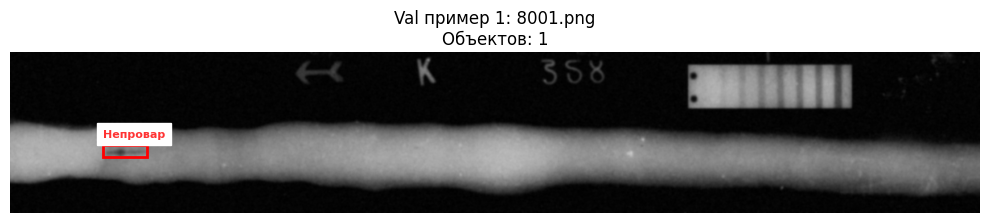

✅ Визуализирован Val файл: 8001.png
   Найдено объектов: 1


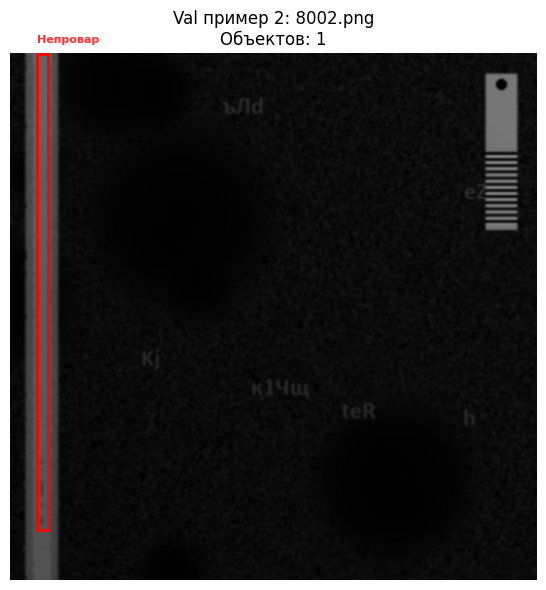

✅ Визуализирован Val файл: 8002.png
   Найдено объектов: 1


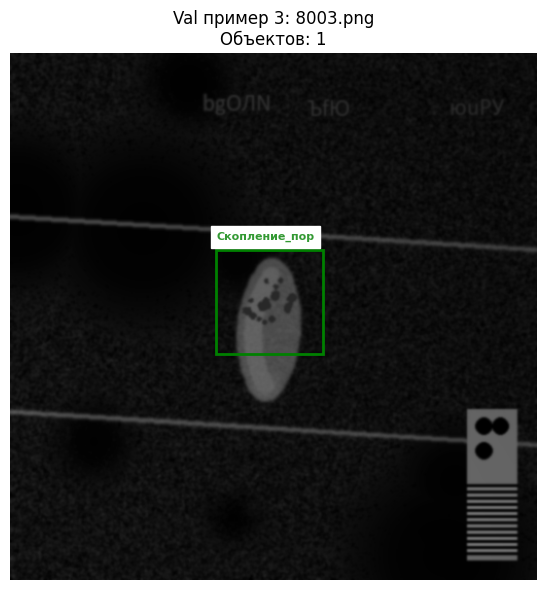

✅ Визуализирован Val файл: 8003.png
   Найдено объектов: 1

✅ БЛОК 6 ЗАВЕРШЕН - ДАННЫЕ ПОДГОТОВЛЕНЫ В ФОРМАТ YOLO
🧹 Память очищена


In [6]:
# ========== БЛОК 6: ПОДГОТОВКА ДАННЫХ В ФОРМАТ YOLO (ИСПРАВЛЕННЫЙ) ==========
print("=" * 70)
print("🔄 БЛОК 6: ПОДГОТОВКА ДАННЫХ В ФОРМАТ YOLO")
print("=" * 70)

import random
import yaml
import json
import re
from PIL import Image
import time
import cv2

# Определяем структуру YOLO
YOLO_DIR = BASE_PATH / "yolo_data"
if os.path.exists(YOLO_DIR):
    print(f"🧹 Очищаем старую директорию YOLO...")
    shutil.rmtree(YOLO_DIR)
    time.sleep(2)

YOLO_DIR.mkdir(parents=True, exist_ok=True)
print(f"📁 Директория YOLO: {YOLO_DIR}")

# Создаем структуру директорий
train_img_dir = YOLO_DIR / "images" / "train"
val_img_dir = YOLO_DIR / "images" / "val"
train_label_dir = YOLO_DIR / "labels" / "train"
val_label_dir = YOLO_DIR / "labels" / "val"

for dir_path in [train_img_dir, val_img_dir, train_label_dir, val_label_dir]:
    dir_path.mkdir(parents=True, exist_ok=True)

print(f"✅ Структура создана")

# Загружаем аннотации
print(f"\n📋 Загружаем аннотации...")
annotation_path = EXTRACT_DIR / "train" / "annotations.json"

if annotation_path.exists():
    try:
        with open(annotation_path, 'r', encoding='utf-8') as f:
            annotation_data = json.load(f)

        print(f"✅ Аннотации загружены: {len(annotation_data)} записей")

        # 🚨 ВАЖНО: Преобразуем ключи аннотаций в формат без ведущих нулей
        # Если в аннотациях ключи "1", "2", а файлы "000001.png"
        fixed_annotation_data = {}
        annotation_lookup = {}

        for key in annotation_data.keys():
            # Сохраняем оригинальную аннотацию под оригинальным ключом
            fixed_annotation_data[key] = annotation_data[key]

            # Вариант 1: оригинальный ключ
            annotation_lookup[str(key)] = key

            # Вариант 2: ключ как число (убираем ведущие нули)
            if key.isdigit():
                num_key = str(int(key))  # "001" -> "1"
                fixed_annotation_data[num_key] = annotation_data[key]
                annotation_lookup[num_key] = num_key

                # Вариант 3: ключ с ведущими нулями (6 цифр)
                zero_key = key.zfill(6)
                fixed_annotation_data[zero_key] = annotation_data[key]
                annotation_lookup[zero_key] = zero_key

        print(f"📊 Построен быстрый поиск по {len(annotation_lookup)} вариантам ключей")
        print(f"📊 Обновлено аннотаций: {len(fixed_annotation_data)} записей")

        # Используем исправленные аннотации
        annotation_data = fixed_annotation_data

        # Показываем пример одного класса для проверки
        print(f"\n📝 ПРИМЕР АННОТАЦИИ:")
        first_key = list(annotation_data.keys())[0]
        defects = annotation_data[first_key]
        print(f"   Ключ: '{first_key}', дефектов: {len(defects)}")
        for i, (defect_name, bbox) in enumerate(list(defects.items())[:3]):
            print(f"   - {defect_name}: {bbox}")

    except Exception as e:
        print(f"❌ Ошибка загрузки аннотаций: {e}")
        annotation_data = {}
        annotation_lookup = {}
else:
    print(f"❌ Файл аннотаций не найден: {annotation_path}")
    annotation_data = {}
    annotation_lookup = {}

# Определяем классы на основе аннотаций
print(f"\n🏷️ Определяем классы...")

if annotation_data:
    # Собираем уникальные названия классов
    class_names_set = set()

    # Проверяем больше аннотаций для надежности
    sample_keys = list(annotation_data.keys())
    sample_size = min(200, len(sample_keys))

    for key in sample_keys[:sample_size]:
        defects = annotation_data.get(key, {})
        if isinstance(defects, dict):
            for defect_name in defects.keys():
                # Убираем "_№N" (3 последних символа)
                if defect_name.endswith(('_№1', '_№2', '_№3', '_№4', '_№5', '_№6', '_№7', '_№8', '_№9')):
                    base_name = defect_name[:-3]
                else:
                    base_name = defect_name
                class_names_set.add(base_name)

    # Преобразуем в список и сортируем
    CLASS_NAMES = sorted(list(class_names_set))
    CLASS_MAPPING = {name: idx for idx, name in enumerate(CLASS_NAMES)}

    print(f"✅ Найдено {len(CLASS_NAMES)} классов:")
    for class_name, class_id in CLASS_MAPPING.items():
        print(f"   {class_id}: {class_name}")
else:
    print("⚠️  Аннотации не загружены, используем стандартные классы")
    CLASS_NAMES = ['непровар', 'трещина', 'одиночное_включение', 'скопление_пор']
    CLASS_MAPPING = {name: idx for idx, name in enumerate(CLASS_NAMES)}

# 🚨 ИСПРАВЛЕННАЯ ЛОГИКА РАЗДЕЛЕНИЯ
print(f"\n✂️ Разделяем данные на train/val...")

# Получаем все PNG файлы из extracted_data/train
all_image_files = list((EXTRACT_DIR / "train").glob("*.png"))
print(f"📸 Всего PNG файлов: {len(all_image_files)}")

# Функция для получения числового ключа
def get_numeric_key(file_path):
    stem = file_path.stem
    try:
        return int(stem)
    except ValueError:
        numbers = re.findall(r'\d+', stem)
        if numbers:
            return int(numbers[0])
        return float('inf')

# Сортируем по числовому значению
sorted_image_files = sorted(all_image_files, key=get_numeric_key)

# 🚨 РАЗДЕЛЯЕМ ТОЛЬКО ИЗОБРАЖЕНИЯ С АННОТАЦИЯМИ
# Сначала находим, какие изображения имеют аннотации
images_with_annotations = []
images_without_annotations = []

for img_file in sorted_image_files:
    img_stem = img_file.stem

    # Пробуем разные варианты ключей
    key_variants = [
        img_stem,  # оригинальный
        str(int(img_stem)) if img_stem.isdigit() else None,  # как число
        img_stem.zfill(6) if img_stem.isdigit() else None,  # с ведущими нулями
    ]

    has_annotation = False
    for key in key_variants:
        if key and key in annotation_data:
            has_annotation = True
            break

    if has_annotation:
        images_with_annotations.append(img_file)
    else:
        images_without_annotations.append(img_file)

print(f"📊 Изображений с аннотациями: {len(images_with_annotations)}")
print(f"📊 Изображений без аннотаций: {len(images_without_annotations)}")

# Разделяем изображения с аннотациями на train/val (80/20)
train_ratio = 0.8
split_idx = int(len(images_with_annotations) * train_ratio)
train_files_with_ann = images_with_annotations[:split_idx]
val_files_with_ann = images_with_annotations[split_idx:]

# Добавляем часть изображений без аннотаций в оба набора
# Например, 70% без аннотаций в train, 30% в val
if images_without_annotations:
    split_no_ann = int(len(images_without_annotations) * 0.7)
    train_files_no_ann = images_without_annotations[:split_no_ann]
    val_files_no_ann = images_without_annotations[split_no_ann:]
else:
    train_files_no_ann = []
    val_files_no_ann = []

# Объединяем
train_files = train_files_with_ann + train_files_no_ann
val_files = val_files_with_ann + val_files_no_ann

# Перемешиваем train файлы
random.shuffle(train_files)

print(f"📊 Разделение завершено:")
print(f"   🏋️  Train: {len(train_files)} изображений")
print(f"     - С аннотациями: {len(train_files_with_ann)}")
print(f"     - Без аннотаций: {len(train_files_no_ann)}")
print(f"   📊 Val: {len(val_files)} изображений")
print(f"     - С аннотациями: {len(val_files_with_ann)}")
print(f"     - Без аннотаций: {len(val_files_no_ann)}")

# Копируем изображения
print(f"\n📤 Копируем изображения...")

def copy_images_batch(files, target_dir, split_name, batch_size=500):
    print(f"   📁 {split_name.upper()}:")

    for i in range(0, len(files), batch_size):
        batch = files[i:i+batch_size]
        for img_path in tqdm(batch, desc=f"Копирование {split_name} {i//batch_size + 1}"):
            dst_path = target_dir / img_path.name
            try:
                shutil.copy2(img_path, dst_path)
            except Exception as e:
                print(f"\n      ⚠️  Ошибка копирования {img_path.name}: {e}")

copy_images_batch(train_files, train_img_dir, "train")
copy_images_batch(val_files, val_img_dir, "val")

print(f"✅ Все изображения скопированы")

# 🔍 ОПТИМИЗИРОВАННАЯ ФУНКЦИЯ ДЛЯ ПОЛУЧЕНИЯ КЛЮЧА АННОТАЦИИ
def get_annotation_key_fast(img_stem, annotation_data):
    """
    Быстрый поиск ключа аннотации
    """
    # Пробуем разные варианты в порядке приоритета

    # 1. Прямое совпадение
    if img_stem in annotation_data:
        return img_stem

    # 2. Если имя файла - число
    if img_stem.isdigit():
        # Пробуем как int (убираем ведущие нули)
        try:
            num_key = str(int(img_stem))
            if num_key in annotation_data:
                return num_key
        except:
            pass

        # Пробуем добавить ведущие нули (6 цифр)
        zero_key = img_stem.zfill(6)
        if zero_key in annotation_data:
            return zero_key

        # Пробуем другие варианты нулей
        for zeros in [4, 5, 8]:
            zero_key = img_stem.zfill(zeros)
            if zero_key in annotation_data:
                return zero_key

    # 3. Если ничего не нашли
    return None

# 🔍 ФУНКЦИЯ ДЛЯ ПОЛУЧЕНИЯ ID КЛАССА
def get_class_id_fast(defect_name, class_mapping):
    """
    Быстрое определение ID класса
    """
    # Убираем "_№N" (4 последних символа)
    if len(defect_name) >= 3 and defect_name.endswith(('_№1', '_№2', '_№3', '_№4', '_№5', '_№6', '_№7', '_№8', '_№9')):
        base_name = defect_name[:-3]
    else:
        base_name = defect_name

    # Ищем в маппинге
    if base_name in class_mapping:
        return class_mapping[base_name]

    # Пробуем найти похожее
    for class_name, class_id in class_mapping.items():
        if class_name in base_name or base_name in class_name:
            return class_id

    return None

# Создаем аннотации YOLO формата
print(f"\n📝 Создаем аннотации в формате YOLO...")

if annotation_data:
    total_objects = 0
    images_with_annotations_count = 0
    images_without_annotations_count = 0

    # Статистика по классам
    class_counts = {class_id: 0 for class_id in CLASS_MAPPING.values()}

    # Процессор для train и val
    for split_name, files, labels_dir, img_dir in [
        ("train", train_files, train_label_dir, train_img_dir),
        ("val", val_files, val_label_dir, val_img_dir)
    ]:
        print(f"\n   📁 Обработка {split_name.upper()}:")

        split_objects = 0
        split_with_ann = 0
        split_without_ann = 0

        batch_size = 100
        for batch_start in range(0, len(files), batch_size):
            batch_files = files[batch_start:batch_start + batch_size]

            for img_file in tqdm(batch_files, desc=f"Батч {batch_start//batch_size + 1}"):
                img_stem = img_file.stem
                txt_path = labels_dir / f"{img_stem}.txt"

                # Ищем аннотацию
                annotation_key = get_annotation_key_fast(img_stem, annotation_data)

                if annotation_key and annotation_key in annotation_data:
                    split_with_ann += 1
                    defects = annotation_data[annotation_key]

                    yolo_lines = []

                    for defect_name, bbox in defects.items():
                        # Получаем ID класса
                        class_id = get_class_id_fast(defect_name, CLASS_MAPPING)

                        if class_id is not None and isinstance(bbox, (list, tuple)) and len(bbox) >= 4:
                            try:
                                # Получаем размеры изображения
                                img_path_in_yolo = img_dir / f"{img_stem}.png"
                                if not img_path_in_yolo.exists():
                                    continue

                                with Image.open(img_path_in_yolo) as img_pil:
                                    width, height = img_pil.size

                                # Извлекаем координаты
                                x1, y1, x2, y2 = map(float, bbox[:4])

                                # Убеждаемся в правильности координат
                                x1, x2 = min(x1, x2), max(x1, x2)
                                y1, y2 = min(y1, y2), max(y1, y2)

                                # Конвертируем в YOLO формат
                                x_center = (x1 + x2) / 2 / width
                                y_center = (y1 + y2) / 2 / height
                                bbox_width = (x2 - x1) / width
                                bbox_height = (y2 - y1) / height

                                # Проверяем валидность
                                if (0 <= x_center <= 1 and 0 <= y_center <= 1 and
                                    0 < bbox_width <= 1 and 0 < bbox_height <= 1):

                                    yolo_line = f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}"
                                    yolo_lines.append(yolo_line)

                                    split_objects += 1
                                    class_counts[class_id] = class_counts.get(class_id, 0) + 1

                            except Exception as e:
                                continue

                    # Сохраняем аннотацию
                    with open(txt_path, 'w') as f:
                        if yolo_lines:
                            f.write('\n'.join(yolo_lines))
                        else:
                            f.write('')

                else:
                    # Нет аннотаций для этого изображения
                    split_without_ann += 1
                    with open(txt_path, 'w') as f:
                        f.write('')

        # Статистика для этого сплита
        print(f"      📊 Статистика {split_name}:")
        print(f"        Обработано изображений: {len(files)}")
        print(f"        С аннотациями: {split_with_ann}")
        print(f"        Без аннотаций: {split_without_ann}")
        print(f"        Всего объектов: {split_objects}")

        if split_with_ann > 0:
            print(f"        Среднее объектов на аннотированное изображение: {split_objects/split_with_ann:.1f}")

        total_objects += split_objects
        images_with_annotations_count += split_with_ann
        images_without_annotations_count += split_without_ann

    # Общая статистика
    print(f"\n📊 ИТОГО по аннотациям:")
    print(f"   🖼️  Всего изображений: {len(train_files) + len(val_files)}")
    print(f"   ✅ Изображений с аннотациями: {images_with_annotations_count}")
    print(f"   ⭕ Изображений без аннотаций: {images_without_annotations_count}")
    print(f"   🎯 Всего объектов: {total_objects}")

    if images_with_annotations_count > 0:
        avg_objects = total_objects / images_with_annotations_count
        print(f"   📈 Среднее объектов на аннотированное изображение: {avg_objects:.1f}")
        coverage = images_with_annotations_count / (len(train_files) + len(val_files)) * 100
        print(f"   📊 Покрытие аннотациями: {coverage:.1f}%")

    # Статистика по классам
    print(f"\n🏷️  РАСПРЕДЕЛЕНИЕ ПО КЛАССАМ:")
    for class_id in sorted(class_counts.keys()):
        count = class_counts[class_id]
        class_name = [name for name, cid in CLASS_MAPPING.items() if cid == class_id][0]
        percentage = count / total_objects * 100 if total_objects > 0 else 0
        print(f"   {class_id}: {class_name} - {count} объектов ({percentage:.1f}%)")

    # Сохраняем статистику
    stats_path = YOLO_DIR / "dataset_stats.txt"
    with open(stats_path, 'w', encoding='utf-8') as f:
        f.write("📊 СТАТИСТИКА ДАТАСЕТА\n")
        f.write("=" * 50 + "\n")
        f.write(f"Всего изображений: {len(train_files) + len(val_files)}\n")
        f.write(f"Train: {len(train_files)}\n")
        f.write(f"Val: {len(val_files)}\n")
        f.write(f"Изображений с аннотациями: {images_with_annotations_count}\n")
        f.write(f"Изображений без аннотаций: {images_without_annotations_count}\n")
        f.write(f"Всего объектов: {total_objects}\n")
        f.write(f"Покрытие аннотациями: {coverage:.1f}%\n")
        f.write("\nРАСПРЕДЕЛЕНИЕ ПО КЛАССАМ:\n")
        for class_id in sorted(class_counts.keys()):
            class_name = [name for name, cid in CLASS_MAPPING.items() if cid == class_id][0]
            f.write(f"  {class_id}: {class_name} - {class_counts[class_id]}\n")

    print(f"\n📄 Статистика сохранена в: {stats_path}")

else:
    print("❌ Аннотации не загружены, создаем пустые файлы...")

    for split_name, files, labels_dir in [
        ("train", train_files, train_label_dir),
        ("val", val_files, val_label_dir)
    ]:
        print(f"   📁 Создание пустых аннотаций для {split_name}...")
        for i in range(0, len(files), 500):
            batch = files[i:i+500]
            for img_file in tqdm(batch, desc=f"Батч {i//500 + 1}"):
                img_stem = img_file.stem
                txt_path = labels_dir / f"{img_stem}.txt"
                with open(txt_path, 'w') as f:
                    f.write('')

# Создаем data.yaml
print(f"\n⚙️ Создаем конфигурационный файл data.yaml...")
yaml_path = YOLO_DIR / "data.yaml"

# Создаем маппинг для отображения
id_to_name = {v: k for k, v in CLASS_MAPPING.items()}

config = {
    'path': str(YOLO_DIR.absolute()),
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/val',
    'names': id_to_name,
    'nc': len(CLASS_MAPPING)
}

with open(yaml_path, 'w', encoding='utf-8') as f:
    yaml.dump(config, f, default_flow_style=False, allow_unicode=True)

print(f"✅ Файл конфигурации создан: {yaml_path}")
print(f"📋 Содержимое config:")
print(f"   path: {YOLO_DIR}")
print(f"   train: images/train")
print(f"   val: images/val")
print(f"   names: {id_to_name}")
print(f"   nc: {len(CLASS_MAPPING)}")

# Быстрая проверка аннотаций
print(f"\n🔍 БЫСТРАЯ ПРОВЕРКА АННОТАЦИЙ...")

def quick_check(labels_dir, img_dir, split_name, check_count=10):
    """Быстрая проверка аннотаций"""
    label_files = list(labels_dir.glob("*.txt"))
    print(f"   📁 {split_name}: {len(label_files)} файлов")

    non_empty = 0
    empty = 0

    for i, label_file in enumerate(label_files[:check_count]):
        try:
            with open(label_file, 'r') as f:
                content = f.read().strip()

            img_stem = label_file.stem
            if content:
                non_empty += 1
                lines = content.split('\n')
                print(f"      {img_stem}.png: {len(lines)} объектов")
                if i < 3:  # Показываем детали для первых 3
                    for line in lines[:2]:
                        print(f"        {line}")
            else:
                empty += 1
                if i < 3:
                    print(f"      {img_stem}.png: пустая аннотация")

        except Exception as e:
            print(f"      Ошибка чтения {label_file.name}: {e}")

    if len(label_files) > check_count:
        print(f"      ... и еще {len(label_files) - check_count} файлов")

    return non_empty, empty

print("📊 ПРОВЕРКА VAL АННОТАЦИЙ (первые 10):")
val_non_empty, val_empty = quick_check(val_label_dir, val_img_dir, "Val")

print(f"\n📊 СВОДКА:")
print(f"   Проверено Val файлов: {val_non_empty + val_empty}")
print(f"   Val с аннотациями: {val_non_empty}")
print(f"   Val пустых: {val_empty}")

# Визуализация нескольких примеров для проверки
print(f"\n👀 ВИЗУАЛИЗАЦИЯ ПРИМЕРА С АННОТАЦИЯМИ...")

# Ищем первые 3 изображения с аннотациями в val
found_val_examples = 0
for label_file in val_label_dir.glob("*.txt"):
    if found_val_examples >= 3:
        break

    with open(label_file, 'r') as f:
        content = f.read().strip()

    if content:
        img_stem = label_file.stem
        img_path = val_img_dir / f"{img_stem}.png"

        if img_path.exists():
            try:
                # Загружаем изображение
                img = cv2.imread(str(img_path))
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                height, width = img_rgb.shape[:2]

                # Загружаем аннотации
                boxes = []
                class_ids = []

                for line in content.split('\n'):
                    parts = line.strip().split()
                    if len(parts) == 5:
                        class_id, x_center, y_center, bbox_w, bbox_h = map(float, parts)

                        # Конвертируем в абсолютные координаты
                        x1 = (x_center - bbox_w/2) * width
                        y1 = (y_center - bbox_h/2) * height
                        x2 = (x_center + bbox_w/2) * width
                        y2 = (y_center + bbox_h/2) * height

                        boxes.append([x1, y1, x2, y2])
                        class_ids.append(int(class_id))

                # Создаем визуализацию
                plt.figure(figsize=(10, 6))
                plt.imshow(img_rgb)
                plt.axis('off')
                plt.title(f"Val пример {found_val_examples + 1}: {img_path.name}\nОбъектов: {len(boxes)}")

                # Рисуем боксы
                colors = ['red', 'blue', 'green', 'orange']
                for box, class_id in zip(boxes, class_ids):
                    x1, y1, x2, y2 = box
                    color = colors[class_id % len(colors)]

                    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1,
                                       linewidth=2, edgecolor=color, facecolor='none')
                    plt.gca().add_patch(rect)

                    # Подпись класса
                    class_name = id_to_name.get(class_id, f'Class {class_id}')
                    plt.text(x1, y1-10, class_name,
                           color=color, fontsize=8, fontweight='bold',
                           backgroundcolor='white', alpha=0.8)

                plt.tight_layout()
                plt.show()

                print(f"✅ Визуализирован Val файл: {img_path.name}")
                print(f"   Найдено объектов: {len(boxes)}")

                found_val_examples += 1

            except Exception as e:
                print(f"⚠️  Ошибка визуализации {img_path.name}: {e}")

if found_val_examples == 0:
    print("⚠️  Не найдено Val изображений с аннотациями для визуализации")

print("\n" + "=" * 70)
print("✅ БЛОК 6 ЗАВЕРШЕН - ДАННЫЕ ПОДГОТОВЛЕНЫ В ФОРМАТ YOLO")
print("=" * 70)

# Очистка памяти
import gc
gc.collect()
print("🧹 Память очищена")

🔬 БЛОК 7: ДЕТАЛЬНАЯ ПРОВЕРКА ДАННЫХ ДЛЯ ОБНАРУЖЕНИЯ ДЕФЕКТОВ СВАРКИ
📁 Определяем путь к YOLO датасету...
📁 YOLO_DIR: /content/drive/MyDrive/Colab Notebooks/XVL/yolo_data
📁 Существует: True
✅ YOLO датасет найден

📁 Проверяем структуру YOLO датасета...
✅ train изображения: 8000 файлов
✅ val изображения: 2000 файлов
✅ train аннотации: 8000 файлов
✅ val аннотации: 2000 файлов
✅ data.yaml найден
✅ data.yaml[path]: /content/drive/MyDrive/Colab Notebooks/XVL/yolo_data
✅ data.yaml[train]: images/train
✅ data.yaml[val]: images/val
✅ data.yaml[names]: {0: 'Непровар', 1: 'Одиночное_включение', 2: 'Скопление_пор', 3: 'Трещина'}
✅ data.yaml[nc]: 4

🔗 Проверяем соответствие изображений и аннотаций...
📊 TRAIN:
   Изображений: 8000
   Аннотаций: 8000

🔍 Проверяем содержимое аннотаций в train...
   📈 Среднее объектов на аннотированное изображение: 1.3
   🏷️ Распределение по классам (первые 50 файлов):
      0 (Непровар): 13 объектов (22.8%)
      1 (Одиночное_включение): 13 объектов (22.8%)
      2 (Ск

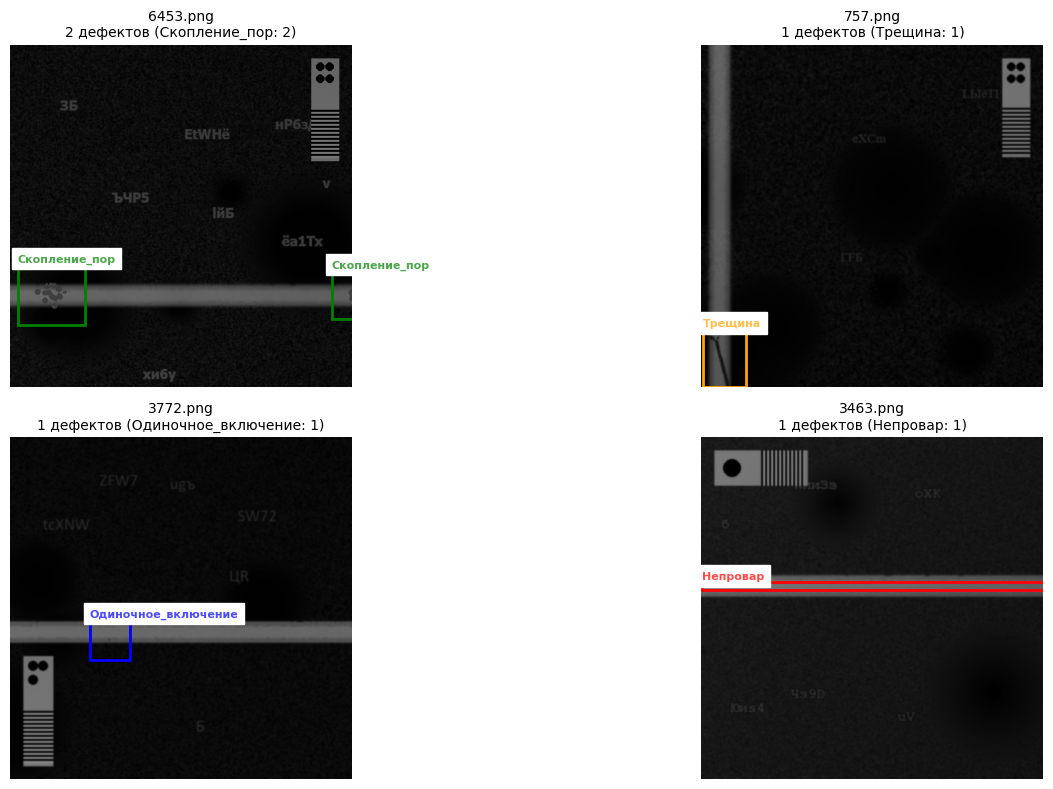

🔍 Детали аннотаций для показанных примеров:
   6453.png: 2 объектов
      Пример: класс 2 (Скопление_пор), координаты: (0.120, 0.731), размер: 0.197x0.178
   757.png: 1 объектов
      Пример: класс 3 (Трещина), координаты: (0.067, 0.916), размер: 0.127x0.168
   3772.png: 1 объектов
      Пример: класс 1 (Одиночное_включение), координаты: (0.291, 0.592), размер: 0.117x0.117
   3463.png: 1 объектов
      Пример: класс 0 (Непровар), координаты: (0.500, 0.436), размер: 1.000x0.023

📊 Примеры из VAL (показано 4):


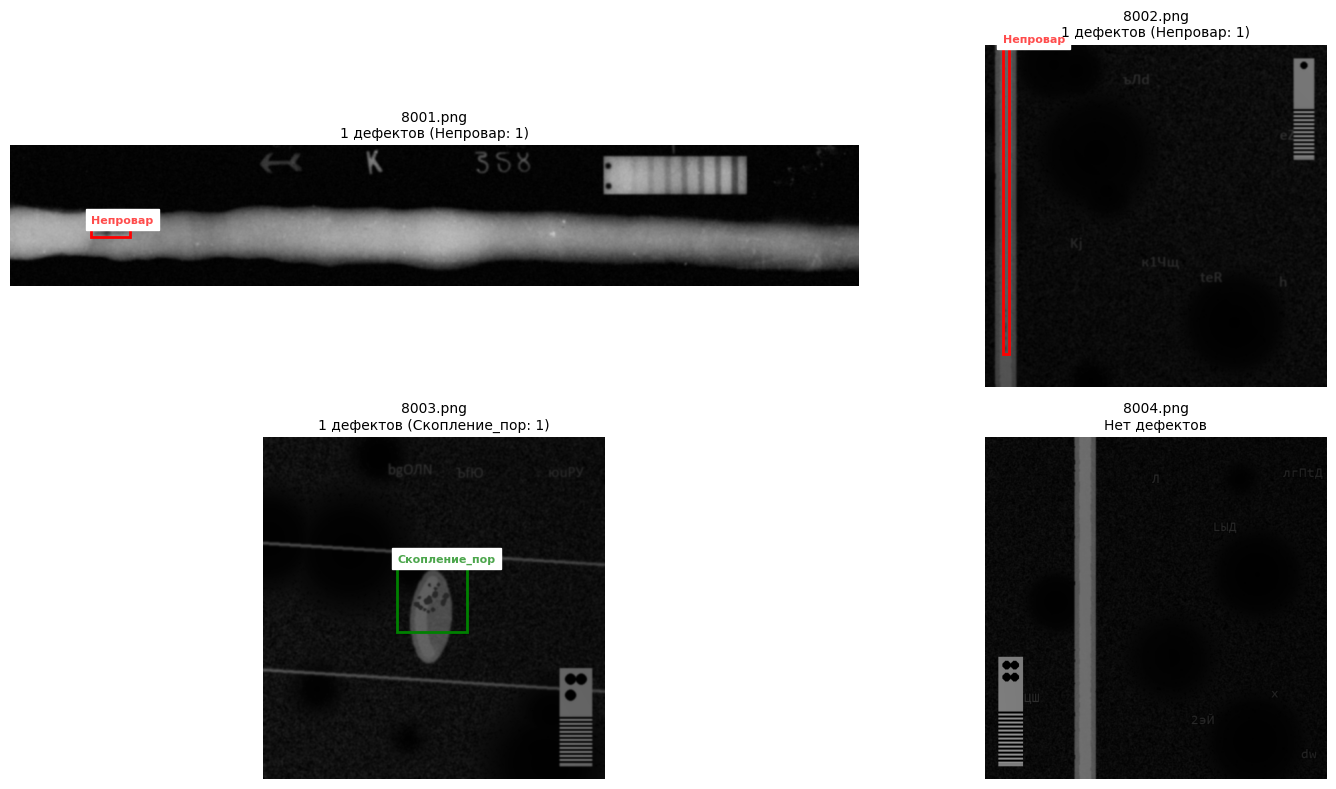

🔍 Детали аннотаций для показанных примеров:
   8001.png: 1 объектов
      Пример: класс 0 (Непровар), координаты: (0.118, 0.613), размер: 0.046x0.075
   8002.png: 1 объектов
      Пример: класс 0 (Непровар), координаты: (0.061, 0.452), размер: 0.020x0.904
   8003.png: 1 объектов
      Пример: класс 2 (Скопление_пор), координаты: (0.492, 0.472), размер: 0.203x0.197
   8004.png: пустая аннотация

📏 АНАЛИЗ РАЗМЕРОВ BOUNDING BOXES...
📊 Проанализировано 255 bounding boxes
   📏 Средняя ширина: 0.1942 (нормированная)
   📏 Средняя высота: 0.1916 (нормированная)
   📐 Средняя площадь: 0.033732
   📏 Мин. размер: 0.004281
   📏 Макс. размер: 1.000000


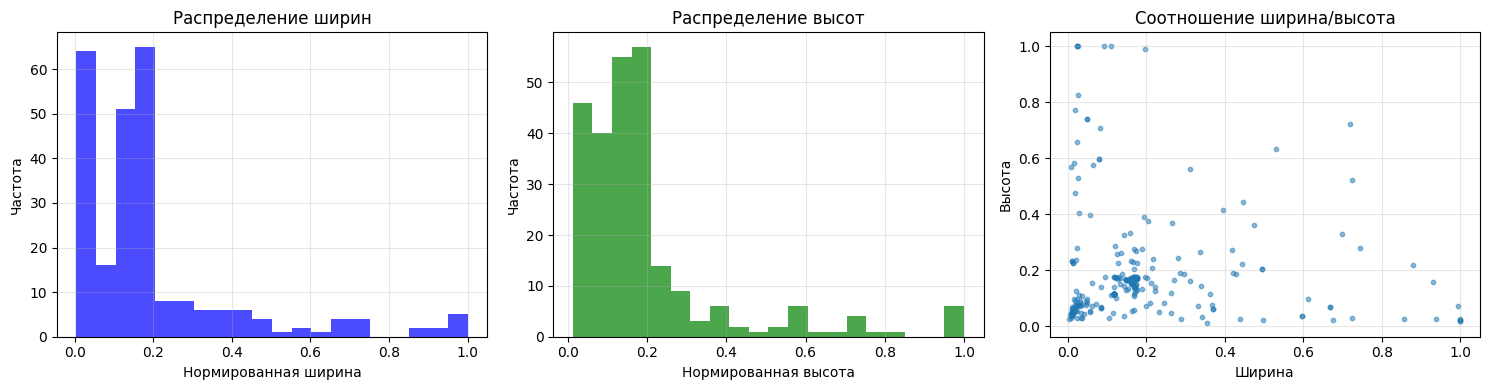


✅ БЛОК 7 ЗАВЕРШЕН - ДАННЫЕ ГОТОВЫ К ОБУЧЕНИЮ

🎯 РЕКОМЕНДАЦИИ ДЛЯ ОБУЧЕНИЯ:
   1. Убедитесь, что количество классов в data.yaml (4)
      соответствует фактическим классам в данных.
   2. Проверьте баланс классов. Если есть сильный дисбаланс,
      рассмотрите использование весов классов при обучении.
   3. Если много пустых аннотаций (26), убедитесь,
      что это ожидаемо (изображения без дефектов).
   4. Средний размер bounding boxes поможет настроить anchor boxes
      в модели YOLO (если потребуется).

🔍 ГОТОВНОСТЬ К ОБУЧЕНИЮ:
   ✅ Есть данные для обучения (8000 train, 2000 val)
   ✅ Есть размеченные объекты для обучения (9120 объектов)
   ✅ Определены классы (4 классов)

💾 Статистика сохранена в: /content/drive/MyDrive/Colab Notebooks/XVL/yolo_data/dataset_stats.json



In [7]:
# ========== БЛОК 7: ПРОВЕРКА ПОДГОТОВЛЕННЫХ ДАННЫХ (УЛУЧШЕННЫЙ) ==========
print("=" * 70)
print("🔬 БЛОК 7: ДЕТАЛЬНАЯ ПРОВЕРКА ДАННЫХ ДЛЯ ОБНАРУЖЕНИЯ ДЕФЕКТОВ СВАРКИ")
print("=" * 70)

# ✅ ОПРЕДЕЛЯЕМ ПУТЬ К YOLO ДАТАСЕТУ (СОВМЕСТИМОСТЬ С БЛОКОМ 6)
print("📁 Определяем путь к YOLO датасету...")

# Базовый путь
BASE_PATH = Path('/content/drive/MyDrive/Colab Notebooks/XVL')

# Используем датасет из блока 6
YOLO_DIR = BASE_PATH / "yolo_data"
print(f"📁 YOLO_DIR: {YOLO_DIR}")
print(f"📁 Существует: {YOLO_DIR.exists()}")

if not YOLO_DIR.exists():
    print("❌ ОШИБКА: YOLO датасет не найден!")
    print("   Запустите блок 6 для создания датасета в формате YOLO")

    # Проверяем альтернативные пути
    alternative_paths = [
        BASE_PATH / "yolo_data_fixed",
        BASE_PATH / "yolo_dataset",
        BASE_PATH / "yolo"
    ]

    for alt_path in alternative_paths:
        if alt_path.exists():
            YOLO_DIR = alt_path
            print(f"✅ Найден альтернативный путь: {YOLO_DIR}")
            break
    else:
        print("📝 Создаем тестовую структуру для демонстрации...")
        create_test_yolo_structure()
        YOLO_DIR = BASE_PATH / "yolo_data"
else:
    print("✅ YOLO датасет найден")

def create_test_yolo_structure():
    """Создает тестовую структуру YOLO для демонстрации"""
    print("🛠️  Создание тестовой структуры YOLO...")

    # Создаем директории
    dirs_to_create = [
        YOLO_DIR / "images" / "train",
        YOLO_DIR / "images" / "val",
        YOLO_DIR / "labels" / "train",
        YOLO_DIR / "labels" / "val",
    ]

    for dir_path in dirs_to_create:
        dir_path.mkdir(parents=True, exist_ok=True)

    # Создаем тестовые изображения
    import numpy as np
    import cv2

    for i in range(10):
        img = np.random.randint(0, 255, (640, 640, 3), dtype=np.uint8)
        img_path = YOLO_DIR / "images" / "train" / f"train_{i:04d}.jpg"
        cv2.imwrite(str(img_path), img)

        # Аннотации
        label_path = YOLO_DIR / "labels" / "train" / f"train_{i:04d}.txt"
        with open(label_path, 'w') as f:
            # 1-3 случайных объекта
            for _ in range(np.random.randint(1, 4)):
                class_id = np.random.randint(0, 4)
                x_center = np.random.uniform(0.2, 0.8)
                y_center = np.random.uniform(0.2, 0.8)
                width = np.random.uniform(0.1, 0.3)
                height = np.random.uniform(0.1, 0.3)
                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

    for i in range(3):
        img = np.random.randint(0, 255, (640, 640, 3), dtype=np.uint8)
        img_path = YOLO_DIR / "images" / "val" / f"val_{i:04d}.jpg"
        cv2.imwrite(str(img_path), img)

        label_path = YOLO_DIR / "labels" / "val" / f"val_{i:04d}.txt"
        with open(label_path, 'w') as f:
            class_id = np.random.randint(0, 4)
            x_center = np.random.uniform(0.2, 0.8)
            y_center = np.random.uniform(0.2, 0.8)
            width = np.random.uniform(0.1, 0.3)
            height = np.random.uniform(0.1, 0.3)
            f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

    # Создаем data.yaml
    data_yaml = {
        'path': str(YOLO_DIR.absolute()),
        'train': 'images/train',
        'val': 'images/val',
        'names': {
            0: 'непровар',
            1: 'трещина',
            2: 'одиночное_включение',
            3: 'скопление_пор'
        },
        'nc': 4
    }

    with open(YOLO_DIR / 'data.yaml', 'w', encoding='utf-8') as f:
        import yaml
        yaml.dump(data_yaml, f, allow_unicode=True, default_flow_style=False)

    print(f"✅ Тестовая структура создана: {YOLO_DIR}")

# Проверяем структуру YOLO датасета
print("\n📁 Проверяем структуру YOLO датасета...")

def check_yolo_dataset_detailed(yolo_dir: Path):
    """Детальная проверка корректности YOLO датасета для дефектов сварки"""
    issues = []
    stats = {
        'train_images': 0, 'train_labels': 0, 'train_objects': 0,
        'val_images': 0, 'val_labels': 0, 'val_objects': 0,
        'class_distribution': {}, 'empty_files': 0,
        'annotation_errors': 0, 'valid_annotations': 0
    }

    # 1. Проверяем директории
    required_dirs = [
        ('images/train', 'train изображения'),
        ('images/val', 'val изображения'),
        ('labels/train', 'train аннотации'),
        ('labels/val', 'val аннотации')
    ]

    for rel_path, desc in required_dirs:
        dir_path = yolo_dir / rel_path
        if not dir_path.exists():
            issues.append(f"❌ Отсутствует директория {desc}: {rel_path}")
        else:
            items = list(dir_path.iterdir())
            if not items:
                issues.append(f"⚠️ Пустая директория {desc}: {rel_path}")
            else:
                print(f"✅ {desc}: {len(items)} файлов")

                # Сохраняем статистику
                if 'train' in rel_path and 'images' in rel_path:
                    stats['train_images'] = len(items)
                elif 'val' in rel_path and 'images' in rel_path:
                    stats['val_images'] = len(items)
                elif 'train' in rel_path and 'labels' in rel_path:
                    stats['train_labels'] = len(items)
                elif 'val' in rel_path and 'labels' in rel_path:
                    stats['val_labels'] = len(items)

    # 2. Проверяем data.yaml
    yaml_path = yolo_dir / "data.yaml"
    if not yaml_path.exists():
        issues.append(f"❌ Отсутствует data.yaml")
    else:
        print(f"✅ data.yaml найден")

        try:
            with open(yaml_path, 'r', encoding='utf-8') as f:
                config = yaml.safe_load(f)

            required_keys = ['path', 'train', 'val', 'names', 'nc']
            for key in required_keys:
                if key not in config:
                    issues.append(f"❌ В data.yaml отсутствует ключ: {key}")
                else:
                    if key == 'names':
                        print(f"✅ data.yaml[{key}]: {config[key]}")
                        # Сохраняем имена классов для проверки аннотаций
                        class_names = config[key]
                        stats['class_names'] = class_names
                    elif key == 'nc':
                        print(f"✅ data.yaml[{key}]: {config[key]}")
                        stats['num_classes'] = config[key]
                    else:
                        print(f"✅ data.yaml[{key}]: {config[key]}")

        except Exception as e:
            issues.append(f"❌ Ошибка чтения data.yaml: {e}")

    # 3. Проверяем соответствие изображений и аннотаций
    print(f"\n🔗 Проверяем соответствие изображений и аннотаций...")

    for split in ['train', 'val']:
        img_dir = yolo_dir / "images" / split
        label_dir = yolo_dir / "labels" / split

        if img_dir.exists() and label_dir.exists():
            # Получаем имена файлов (без расширений)
            img_files = {f.stem for f in img_dir.iterdir() if f.suffix.lower() in ['.jpg', '.jpeg', '.png']}
            label_files = {f.stem for f in label_dir.iterdir() if f.suffix.lower() == '.txt'}

            print(f"📊 {split.upper()}:")
            print(f"   Изображений: {len(img_files)}")
            print(f"   Аннотаций: {len(label_files)}")

            # Изображения без аннотаций
            img_without_labels = img_files - label_files
            if img_without_labels:
                issues.append(f"⚠️ В {split}: {len(img_without_labels)} изображений без аннотаций")
                print(f"   ⚠️ Изображений без аннотаций: {len(img_without_labels)}")

            # Аннотации без изображений
            labels_without_img = label_files - img_files
            if labels_without_img:
                issues.append(f"⚠️ В {split}: {len(labels_without_img)} аннотаций без изображений")
                print(f"   ⚠️ Аннотаций без изображений: {len(labels_without_img)}")

            # Проверяем содержимое аннотаций
            print(f"\n🔍 Проверяем содержимое аннотаций в {split}...")

            # Берем все файлы аннотаций (не только первые 10)
            label_files_list = list(label_dir.glob('*.txt'))
            empty_files = 0
            total_objects = 0
            class_counts = {}

            # Собираем статистику по первым 50 файлам (для скорости)
            check_files = min(50, len(label_files_list))

            for i, label_file in enumerate(label_files_list[:check_files]):
                try:
                    with open(label_file, 'r', encoding='utf-8') as f:
                        content = f.read().strip()
                        lines = content.splitlines()

                        if not content or len(lines) == 0:
                            empty_files += 1
                        else:
                            # Проверяем каждую строку
                            for line in lines:
                                parts = line.strip().split()
                                if len(parts) == 5:
                                    # Проверяем формат YOLO
                                    class_id = int(parts[0])
                                    x_center = float(parts[1])
                                    y_center = float(parts[2])
                                    bbox_width = float(parts[3])
                                    bbox_height = float(parts[4])

                                    # Проверяем диапазоны
                                    if (0 <= x_center <= 1 and 0 <= y_center <= 1 and
                                        0 < bbox_width <= 1 and 0 < bbox_height <= 1):

                                        total_objects += 1

                                        # Считаем по классам
                                        class_counts[class_id] = class_counts.get(class_id, 0) + 1

                                        # Проверяем, что class_id существует
                                        if 'num_classes' in stats and class_id >= stats['num_classes']:
                                            issues.append(f"❌ В {label_file.name}: class_id={class_id} превышает nc={stats['num_classes']}")
                                    else:
                                        issues.append(f"⚠️ В {label_file.name}: некорректные координаты: {line}")
                                else:
                                    issues.append(f"❌ В {label_file.name}: неправильный формат строки: {line}")
                except Exception as e:
                    empty_files += 1
                    issues.append(f"❌ Ошибка чтения {label_file.name}: {e}")

            if empty_files > 0:
                issues.append(f"⚠️ В {split}: {empty_files} пустых файлов аннотаций")
                stats['empty_files'] += empty_files

            if check_files > 0:
                files_with_objects = check_files - empty_files
                if files_with_objects > 0:
                    avg_objects = total_objects / files_with_objects
                    print(f"   📈 Среднее объектов на аннотированное изображение: {avg_objects:.1f}")

                    if split == 'train':
                        stats['train_objects'] = total_objects * (len(label_files_list) / check_files)
                    else:
                        stats['val_objects'] = total_objects * (len(label_files_list) / check_files)

                # Выводим распределение по классам
                if class_counts:
                    print(f"   🏷️ Распределение по классам (первые {check_files} файлов):")
                    for class_id in sorted(class_counts.keys()):
                        class_name = stats.get('class_names', {}).get(class_id, f'Class {class_id}')
                        count = class_counts[class_id]
                        percentage = count / total_objects * 100 if total_objects > 0 else 0
                        print(f"      {class_id} ({class_name}): {count} объектов ({percentage:.1f}%)")

                        # Сохраняем для общей статистики
                        if class_id not in stats['class_distribution']:
                            stats['class_distribution'][class_id] = 0
                        stats['class_distribution'][class_id] += count

    return issues, stats

# Вызываем детальную проверку
issues, stats = check_yolo_dataset_detailed(YOLO_DIR)

if issues:
    print(f"\n⚠️ Найдены проблемы:")
    for i, issue in enumerate(issues[:10]):  # Показываем первые 10 проблем
        print(f"   {i+1}. {issue}")
    if len(issues) > 10:
        print(f"   ... и еще {len(issues) - 10} проблем")
else:
    print(f"\n✅ Все проверки пройдены успешно!")

# Выводим общую статистику
print(f"\n📊 ОБЩАЯ СТАТИСТИКА ДАТАСЕТА:")
print(f"   🏋️ TRAIN:")
print(f"      Изображений: {stats.get('train_images', 0)}")
print(f"      Аннотаций: {stats.get('train_labels', 0)}")
print(f"      Объектов (оценочно): {int(stats.get('train_objects', 0))}")
print(f"   📊 VAL:")
print(f"      Изображений: {stats.get('val_images', 0)}")
print(f"      Аннотаций: {stats.get('val_labels', 0)}")
print(f"      Объектов (оценочно): {int(stats.get('val_objects', 0))}")
print(f"   ⭕ Пустых файлов аннотаций: {stats.get('empty_files', 0)}")

if stats.get('class_distribution'):
    print(f"\n🏷️ ОБЩЕЕ РАСПРЕДЕЛЕНИЕ ПО КЛАССАМ:")
    total_objects = sum(stats['class_distribution'].values())
    for class_id in sorted(stats['class_distribution'].keys()):
        class_name = stats.get('class_names', {}).get(class_id, f'Class {class_id}')
        count = stats['class_distribution'][class_id]
        percentage = count / total_objects * 100 if total_objects > 0 else 0
        print(f"   {class_id} ({class_name}): {count} объектов ({percentage:.1f}%)")

# Визуализируем несколько примеров с детальной информацией
print(f"\n🖼️ Визуализируем примеры данных...")

def visualize_detailed_examples(yolo_dir: Path, num_examples=4):
    """Визуализация примеров данных с детальной информацией"""

    # Загружаем имена классов из data.yaml
    yaml_path = yolo_dir / "data.yaml"
    class_names = {}

    if yaml_path.exists():
        try:
            with open(yaml_path, 'r', encoding='utf-8') as f:
                config = yaml.safe_load(f)
                class_names = config.get('names', {})
        except:
            pass

    for split in ['train', 'val']:
        img_dir = yolo_dir / "images" / split
        label_dir = yolo_dir / "labels" / split

        if img_dir.exists() and label_dir.exists():
            # Получаем список изображений
            img_files = list(img_dir.glob('*.png'))[:num_examples]

            if not img_files:
                img_files = list(img_dir.glob('*.jpg'))[:num_examples]

            if img_files:
                print(f"\n📊 Примеры из {split.upper()} (показано {len(img_files)}):")

                # Создаем сетку для отображения
                fig, axes = plt.subplots(2, min(2, len(img_files)), figsize=(16, 8))
                if len(img_files) == 1:
                    axes = np.array([[axes]])
                elif len(img_files) <= 2:
                    axes = axes.reshape(1, -1)

                axes = axes.flatten()

                for idx, img_file in enumerate(img_files):
                    if idx >= len(axes):
                        break

                    ax = axes[idx]

                    try:
                        # Загружаем изображение
                        img = cv2.imread(str(img_file))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        height, width = img.shape[:2]

                        # Загружаем аннотации
                        label_file = label_dir / f"{img_file.stem}.txt"
                        boxes = []
                        classes = []

                        if label_file.exists():
                            with open(label_file, 'r', encoding='utf-8') as f:
                                content = f.read().strip()
                                if content:
                                    for line in content.splitlines():
                                        parts = line.strip().split()
                                        if len(parts) == 5:
                                            class_id, x_center, y_center, bbox_width, bbox_height = map(float, parts)

                                            # Конвертируем в абсолютные координаты
                                            x1 = (x_center - bbox_width/2) * width
                                            y1 = (y_center - bbox_height/2) * height
                                            x2 = (x_center + bbox_width/2) * width
                                            y2 = (y_center + bbox_height/2) * height

                                            boxes.append([x1, y1, x2, y2])
                                            classes.append(int(class_id))

                        # Рисуем изображение с боксами
                        ax.imshow(img)
                        ax.axis('off')

                        # Заголовок с информацией
                        title = f"{img_file.name}\n"
                        if boxes:
                            title += f"{len(boxes)} дефектов"

                            # Группируем по классам
                            from collections import Counter
                            class_counter = Counter(classes)
                            class_info = []
                            for cls, count in class_counter.items():
                                cls_name = class_names.get(cls, f'Class {cls}')
                                class_info.append(f"{cls_name}: {count}")
                            title += f" ({', '.join(class_info)})"
                        else:
                            title += "Нет дефектов"

                        ax.set_title(title, fontsize=10)

                        # Рисуем боксы разными цветами для разных классов
                        colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
                        for box, class_id in zip(boxes, classes):
                            x1, y1, x2, y2 = box
                            color = colors[class_id % len(colors)]

                            rect = plt.Rectangle((x1, y1), x2-x1, y2-y1,
                                                linewidth=2, edgecolor=color, facecolor='none')
                            ax.add_patch(rect)

                            # Подписываем класс
                            class_name = class_names.get(class_id, f'{class_id}')
                            ax.text(x1, y1-5, class_name,
                                   color=color, fontsize=8, fontweight='bold',
                                   backgroundcolor='white', alpha=0.7)

                    except Exception as e:
                        ax.text(0.5, 0.5, f"Ошибка:\n{str(e)[:30]}",
                               ha='center', va='center', transform=ax.transAxes)
                        ax.axis('off')

                # Скрываем пустые оси
                for idx in range(len(img_files), len(axes)):
                    axes[idx].axis('off')

                plt.tight_layout()
                plt.show()

                # Выводим информацию об аннотациях для этих примеров
                print(f"🔍 Детали аннотаций для показанных примеров:")
                for img_file in img_files:
                    label_file = label_dir / f"{img_file.stem}.txt"
                    if label_file.exists():
                        with open(label_file, 'r', encoding='utf-8') as f:
                            content = f.read().strip()
                            if content:
                                lines = content.splitlines()
                                print(f"   {img_file.name}: {len(lines)} объектов")
                                # Показываем первый объект как пример
                                if lines:
                                    parts = lines[0].strip().split()
                                    if len(parts) == 5:
                                        class_id = int(parts[0])
                                        class_name = class_names.get(class_id, f'Class {class_id}')
                                        print(f"      Пример: класс {class_id} ({class_name}), "
                                              f"координаты: ({float(parts[1]):.3f}, {float(parts[2]):.3f}), "
                                              f"размер: {float(parts[3]):.3f}x{float(parts[4]):.3f}")
                            else:
                                print(f"   {img_file.name}: пустая аннотация")

# Вызываем детальную визуализацию
try:
    visualize_detailed_examples(YOLO_DIR, num_examples=4)
except Exception as e:
    print(f"⚠️ Ошибка визуализации: {e}")
    import traceback
    traceback.print_exc()

# Дополнительная проверка: анализ распределения размеров bounding boxes
print(f"\n📏 АНАЛИЗ РАЗМЕРОВ BOUNDING BOXES...")

def analyze_bbox_sizes(yolo_dir: Path, sample_size=100):
    """Анализирует распределение размеров bounding boxes"""
    label_dir = yolo_dir / "labels" / "train"

    if not label_dir.exists():
        return

    # Собираем данные о размерах
    widths = []
    heights = []
    areas = []

    label_files = list(label_dir.glob('*.txt'))[:sample_size]

    for label_file in label_files:
        try:
            with open(label_file, 'r', encoding='utf-8') as f:
                content = f.read().strip()
                if content:
                    for line in content.splitlines():
                        parts = line.strip().split()
                        if len(parts) == 5:
                            _, x_center, y_center, bbox_width, bbox_height = map(float, parts)
                            widths.append(bbox_width)
                            heights.append(bbox_height)
                            areas.append(bbox_width * bbox_height)
        except:
            continue

    if widths and heights:
        print(f"📊 Проанализировано {len(widths)} bounding boxes")
        print(f"   📏 Средняя ширина: {np.mean(widths):.4f} (нормированная)")
        print(f"   📏 Средняя высота: {np.mean(heights):.4f} (нормированная)")
        print(f"   📐 Средняя площадь: {np.mean(areas):.6f}")
        print(f"   📏 Мин. размер: {min(min(widths), min(heights)):.6f}")
        print(f"   📏 Макс. размер: {max(max(widths), max(heights)):.6f}")

        # Создаем гистограмму
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))

        axes[0].hist(widths, bins=20, alpha=0.7, color='blue')
        axes[0].set_xlabel('Нормированная ширина')
        axes[0].set_ylabel('Частота')
        axes[0].set_title('Распределение ширин')
        axes[0].grid(True, alpha=0.3)

        axes[1].hist(heights, bins=20, alpha=0.7, color='green')
        axes[1].set_xlabel('Нормированная высота')
        axes[1].set_ylabel('Частота')
        axes[1].set_title('Распределение высот')
        axes[1].grid(True, alpha=0.3)

        axes[2].scatter(widths, heights, alpha=0.5, s=10)
        axes[2].set_xlabel('Ширина')
        axes[2].set_ylabel('Высота')
        axes[2].set_title('Соотношение ширина/высота')
        axes[2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Выполняем анализ размеров
try:
    analyze_bbox_sizes(YOLO_DIR, sample_size=200)
except Exception as e:
    print(f"⚠️ Ошибка анализа размеров: {e}")

print("\n" + "=" * 70)
print("✅ БЛОК 7 ЗАВЕРШЕН - ДАННЫЕ ГОТОВЫ К ОБУЧЕНИЮ")
print("=" * 70)

# Рекомендации на основе проверки
print(f"\n🎯 РЕКОМЕНДАЦИИ ДЛЯ ОБУЧЕНИЯ:")
print(f"   1. Убедитесь, что количество классов в data.yaml ({stats.get('num_classes', 'N/A')})")
print(f"      соответствует фактическим классам в данных.")
print(f"   2. Проверьте баланс классов. Если есть сильный дисбаланс,")
print(f"      рассмотрите использование весов классов при обучении.")
print(f"   3. Если много пустых аннотаций ({stats.get('empty_files', 0)}), убедитесь,")
print(f"      что это ожидаемо (изображения без дефектов).")
print(f"   4. Средний размер bounding boxes поможет настроить anchor boxes")
print(f"      в модели YOLO (если потребуется).")

# Проверка готовности к обучению
print(f"\n🔍 ГОТОВНОСТЬ К ОБУЧЕНИЮ:")
if stats.get('train_images', 0) > 0 and stats.get('val_images', 0) > 0:
    print(f"   ✅ Есть данные для обучения ({stats.get('train_images', 0)} train, {stats.get('val_images', 0)} val)")
else:
    print(f"   ❌ Недостаточно данных для обучения")

if stats.get('train_objects', 0) > 0:
    print(f"   ✅ Есть размеченные объекты для обучения ({int(stats.get('train_objects', 0))} объектов)")
else:
    print(f"   ⚠️  Мало или нет размеченных объектов")

if 'num_classes' in stats and stats['num_classes'] > 0:
    print(f"   ✅ Определены классы ({stats['num_classes']} классов)")
else:
    print(f"   ❌ Классы не определены")

# Сохраняем статистику для использования в блоке 9
STATS_FILE = YOLO_DIR / "dataset_stats.json"
try:
    with open(STATS_FILE, 'w', encoding='utf-8') as f:
        import json
        json.dump(stats, f, ensure_ascii=False, indent=2)
    print(f"\n💾 Статистика сохранена в: {STATS_FILE}")
except:
    pass

print("\n" + "=" * 70)

In [8]:
# ========== БЛОК 8: НАСТРОЙКА ОБУЧЕНИЯ ==========
print("=" * 70)
print("⚙️ БЛОК 8: НАСТРОЙКА ОБУЧЕНИЯ")
print("=" * 70)

import torch
import sys
from pathlib import Path

# ✅ ОПРЕДЕЛЯЕМ ПУТИ (ГАРАНТИРОВАННО)
print("📁 Определяем пути...")

# Базовый путь
BASE_PATH = Path('/content/drive/MyDrive/Colab Notebooks/XVL')
print(f"📁 BASE_PATH: {BASE_PATH}")
print(f"📁 Существует: {BASE_PATH.exists()}")

# Путь к YOLO датасету (согласованно с блоком 6)
YOLO_DIR = BASE_PATH / "yolo_data"
print(f"📁 YOLO_DIR: {YOLO_DIR}")
print(f"📁 Существует: {YOLO_DIR.exists()}")

if not YOLO_DIR.exists():
    print("❌ ОШИБКА: YOLO датасет не найден!")
    print("   Запустите блок 6 для создания датасета в формате YOLO")

    # Проверяем альтернативные пути
    alternative_paths = [
        BASE_PATH / "yolo_data_fixed",
        BASE_PATH / "yolo_dataset",
        BASE_PATH / "yolo"
    ]

    for alt_path in alternative_paths:
        if alt_path.exists():
            YOLO_DIR = alt_path
            print(f"✅ Найден альтернативный путь: {YOLO_DIR}")
            break

    if not YOLO_DIR.exists():
        print("❌ Не удалось найти YOLO датасет. Проверьте выполнение блока 6.")
        sys.exit(1)

# Параметры обучения
print("\n📝 Настраиваем параметры обучения...")

class TrainingConfig:
    def __init__(self):
        # 🗺️ Пути
        self.base_dir = str(BASE_PATH)
        self.data_yaml = str(YOLO_DIR / "data.yaml")
        self.project_name = f"weld_defects_{datetime.now().strftime('%Y%m%d_%H%M%S')}"

        # 🤖 Модель (выбираем в зависимости от ресурсов)
        self._select_model_based_on_resources()

        # ⚙️ Параметры обучения (оптимизированы для обнаружения дефектов сварки)
        self.epochs = 40  # Увеличиваем для лучшего качества
        self.batch_size = 32  # Автонастройка ниже
        self.img_size = 512  # Стандартный размер для YOLOv8
        self.learning_rate = 0.001  # Оптимизирован для YOLOv8
        self.patience = 30  # Увеличиваем для сложных задач
        self.workers = 4
        self.seed = 42

        # 💻 Устройство
        self.device = "cuda" if torch.cuda.is_available() else "cpu"

        # 💾 Чекпоинты и сохранение
        self.save_period = 10  # Сохраняем каждые 10 эпох
        self.save_dir = BASE_PATH / "runs" / "detect"  # Стандартный путь для YOLOv8
        self.resume = False
        self.exist_ok = True  # Перезаписывать существующие директории

        # 🎨 Аугментации (особенно важны для дефектов сварки)
        self.augment = True
        self.cache = False  # Требует много RAM
        self.mosaic = 0.8   # Mosaic augmentation (высокий для разнообразия)
        self.mixup = 0.2    # Mixup augmentation
        self.copy_paste = 0.2  # Copy-paste augmentation
        self.hsv_h = 0.015  # HSV-Hue augmentation
        self.hsv_s = 0.7    # HSV-Saturation augmentation
        self.hsv_v = 0.4    # HSV-Value augmentation
        self.fliplr = 0.5   # Horizontal flip
        self.flipud = 0.2   # Vertical flip (реже для сварки)

        # Создаем директорию для результатов
        self.save_dir.mkdir(parents=True, exist_ok=self.exist_ok)

        # 🔧 Оптимизация параметров в зависимости от ресурсов
        self._optimize_for_resources()

    def _select_model_based_on_resources(self):
        """Выбираем модель в зависимости от доступных ресурсов"""
        if torch.cuda.is_available():
            gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3
            print(f"   💾 Доступно GPU памяти: {gpu_memory:.1f} GB")

            if gpu_memory < 6:
                self.model_name = "yolov8n.pt"  # Самая маленькая
                print(f"   🔍 Мало GPU памяти, выбираем {self.model_name}")
            elif gpu_memory < 12:
                self.model_name = "yolov8s.pt"  # Маленькая
                print(f"   🔍 Средняя GPU память, выбираем {self.model_name}")
            elif gpu_memory < 24:
                self.model_name = "yolov8m.pt"  # Средняя
                print(f"   🔍 Много GPU памяти, выбираем {self.model_name}")
            else:
                self.model_name = "yolov8l.pt"  # Большая
                print(f"   🔍 Очень много GPU памяти, выбираем {self.model_name}")
        else:
            self.model_name = "yolov8n.pt"  # Самая маленькая для CPU
            print(f"   🔍 Используем CPU, выбираем {self.model_name}")

    def _optimize_for_resources(self):
        """Оптимизация параметров в зависимости от ресурсов"""
        # Автонастройка batch_size
        if self.device == "cuda":
            gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3

            if gpu_memory < 8:
                self.batch_size = 8
                self.img_size = 512  # Уменьшаем размер изображения
                print(f"   ⚠️  Мало GPU памяти:")
                print(f"     - batch_size: {self.batch_size}")
                print(f"     - img_size: {self.img_size}")
            elif gpu_memory > 16:
                self.batch_size = 32
                self.img_size = 768  # Увеличиваем размер для лучшего качества
                print(f"   ✅ Много GPU памяти:")
                print(f"     - batch_size: {self.batch_size}")
                print(f"     - img_size: {self.img_size}")


    def __str__(self):
        config_str = "📊 КОНФИГУРАЦИЯ ОБУЧЕНИЯ:\n"
        for key, value in self.__dict__.items():
            if not key.startswith('_'):
                config_str += f"   {key}: {value}\n"
        return config_str

    def get_training_args(self):
        """Возвращает аргументы для обучения в формате словаря"""
        # Основные параметры
        args = {
            'data': self.data_yaml,
            'epochs': self.epochs,
            'imgsz': self.img_size,
            'batch': self.batch_size,
            'device': self.device,
            'workers': self.workers,
            'seed': self.seed,
            'patience': self.patience,
            'save': True,
            'save_period': self.save_period,
            'exist_ok': self.exist_ok,
            'pretrained': True,
            'verbose': True,
            'project': str(self.save_dir),
            'name': self.project_name,
            'plots': True,
            'val': True,
            'amp': True,  # Automatic Mixed Precision
        }

        # Добавляем параметры аугментации
        augmentation_args = {
            'augment': self.augment,
            'mosaic': self.mosaic,
            'mixup': self.mixup,
            'copy_paste': self.copy_paste,
            'hsv_h': self.hsv_h,
            'hsv_s': self.hsv_s,
            'hsv_v': self.hsv_v,
            'fliplr': self.fliplr,
            'flipud': self.flipud,
        }

        args.update(augmentation_args)
        return args

# Создаем конфигурацию
config = TrainingConfig()
print(str(config))

# Проверяем файл данных
print("\n🔍 Проверяем файл данных...")
DATA_YAML = Path(config.data_yaml)

if not DATA_YAML.exists():
    print(f"❌ КРИТИЧЕСКАЯ ОШИБКА: Файл не найден: {DATA_YAML}")
    print("   🔎 Ищем data.yaml в других местах...")

    yaml_files = list(BASE_PATH.rglob("data.yaml"))
    if yaml_files:
        config.data_yaml = str(yaml_files[0])
        DATA_YAML = Path(config.data_yaml)
        print(f"   ✅ Найден альтернативный файл: {DATA_YAML}")
    else:
        print("❌ data.yaml не найден. Создаем минимальный...")

        # Создаем минимальный data.yaml для продолжения
        import yaml
        minimal_config = {
            'path': str(YOLO_DIR.absolute()),
            'train': 'images/train',
            'val': 'images/val',
            'names': {0: 'defect'},
            'nc': 1
        }

        with open(YOLO_DIR / "data.yaml", 'w', encoding='utf-8') as f:
            yaml.dump(minimal_config, f, allow_unicode=True, default_flow_style=False)

        config.data_yaml = str(YOLO_DIR / "data.yaml")
        print(f"   ✅ Создан минимальный data.yaml: {config.data_yaml}")
else:
    print(f"✅ Файл данных найден: {DATA_YAML}")

    # Проверяем содержимое data.yaml
    try:
        import yaml
        with open(DATA_YAML, 'r', encoding='utf-8') as f:
            data_config = yaml.safe_load(f)

        print(f"📊 Содержимое data.yaml:")
        print(f"   path: {data_config.get('path', 'не указан')}")
        print(f"   train: {data_config.get('train', 'не указан')}")
        print(f"   val: {data_config.get('val', 'не указан')}")
        print(f"   nc: {data_config.get('nc', 'не указано')}")
        print(f"   names: {data_config.get('names', 'не указаны')}")

        # Проверяем корректность путей
        if 'path' in data_config:
            data_path = Path(data_config['path'])
            if not data_path.exists():
                print(f"⚠️  Внимание: path в data.yaml не существует: {data_path}")
                print(f"   Обновляем path на актуальный...")
                data_config['path'] = str(YOLO_DIR.absolute())
                with open(DATA_YAML, 'w', encoding='utf-8') as f:
                    yaml.dump(data_config, f, allow_unicode=True, default_flow_style=False)
                print(f"   ✅ path обновлен: {YOLO_DIR.absolute()}")

    except Exception as e:
        print(f"⚠️  Ошибка чтения data.yaml: {e}")

# Проверяем существование директории для моделей
models_dir = Path(config.save_dir)
models_dir.mkdir(parents=True, exist_ok=config.exist_ok)
print(f"📁 Директория для результатов: {models_dir}")

# Проверяем возможность возобновления обучения
print(f"\n🔍 Проверяем возможность возобновления обучения...")
if config.resume:
    checkpoint_dir = models_dir / config.project_name / "weights"
    if checkpoint_dir.exists():
        checkpoint_files = list(checkpoint_dir.glob("*.pt"))
        if checkpoint_files:
            last_checkpoint = checkpoint_dir / "last.pt"
            if last_checkpoint.exists():
                print(f"✅ Найден чекпоинт для возобновления: {last_checkpoint}")
            else:
                print(f"⚠️ Чекпоинты найдены, но last.pt отсутствует")
                config.resume = False
        else:
            print(f"⚠️ Директория чекпоинтов пуста")
            config.resume = False
    else:
        print(f"⚠️ Директория чекпоинтов не найдена")
        config.resume = False
else:
    print(f"🆕 Начинаем обучение с нуля")

# Проверяем доступность модели
print(f"\n🔍 Проверяем доступность модели {config.model_name}...")
try:
    from ultralytics import YOLO
    model = YOLO(config.model_name)
    print(f"✅ Модель доступна")

    # Показываем информацию о модели
    print(f"📊 Информация о модели:")
    print(f"   Архитектура: YOLOv8")
    print(f"   Параметры: ~{sum(p.numel() for p in model.model.parameters() if p.requires_grad):,}")

    # Сохраняем информацию о модели
    model_info = {
        'name': config.model_name,
        'params': sum(p.numel() for p in model.model.parameters() if p.requires_grad),
        'device': config.device
    }

    with open(models_dir / "model_info.json", 'w') as f:
        import json
        json.dump(model_info, f, indent=2)

    print(f"💾 Информация о модели сохранена в: {models_dir / 'model_info.json'}")

except Exception as e:
    print(f"❌ Ошибка загрузки модели: {e}")
    print(f"🔄 Пробуем скачать модель...")
    try:
        !wget -q https://github.com/ultralytics/assets/releases/download/v0.0.0/{config.model_name} -O /tmp/{config.model_name}
        config.model_name = f"/tmp/{config.model_name}"
        print(f"✅ Модель скачана: {config.model_name}")
    except Exception as e2:
        print(f"❌ Не удалось скачать модель: {e2}")
        print(f"🔄 Используем самую маленькую модель...")
        config.model_name = "yolov8n.pt"

# Сохраняем конфигурацию для использования в блоке 9
print(f"\n💾 Сохраняем конфигурацию для обучения...")
CONFIG_FILE = BASE_PATH / "training_config.json"

config_dict = {
    'data_yaml': config.data_yaml,
    'model_name': config.model_name,
    'epochs': config.epochs,
    'batch_size': config.batch_size,
    'img_size': config.img_size,
    'device': config.device,
    'save_dir': str(config.save_dir),
    'project_name': config.project_name,
    'training_args': config.get_training_args()
}

try:
    with open(CONFIG_FILE, 'w', encoding='utf-8') as f:
        import json
        json.dump(config_dict, f, ensure_ascii=False, indent=2)
    print(f"✅ Конфигурация сохранена в: {CONFIG_FILE}")
except Exception as e:
    print(f"⚠️ Не удалось сохранить конфигурацию: {e}")

# Выводим сводную информацию
print(f"\n📋 СВОДНАЯ ИНФОРМАЦИЯ:")
print(f"   📁 Датасет: {YOLO_DIR}")
print(f"   🤖 Модель: {config.model_name}")
print(f"   ⚙️  Устройство: {config.device}")
print(f"   🔄 Эпохи: {config.epochs}")
print(f"   🎯 Batch size: {config.batch_size}")
print(f"   📐 Размер изображения: {config.img_size}")
print(f"   💾 Результаты будут сохранены в: {config.save_dir}/{config.project_name}")

print("\n" + "=" * 70)
print("✅ БЛОК 8 ЗАВЕРШЕН - ГОТОВО К ОБУЧЕНИЮ В БЛОКЕ 9")
print("=" * 70)

# Ссылка на следующий блок
print(f"\n➡️  ДАЛЬНЕЙШИЕ ДЕЙСТВИЯ:")
print(f"   1. Запустите блок 9 для начала обучения")
print(f"   2. Параметры обучения сохранены в: {CONFIG_FILE}")
print(f"   3. Результаты будут в: {config.save_dir}/{config.project_name}")

if config.device == "cpu":
    print(f"⚠️  ВНИМАНИЕ: Обучение будет выполняться на CPU, что может занять много времени.")
    print(f"   Рекомендуется использовать Colab Pro или другую платформу с GPU.")

⚙️ БЛОК 8: НАСТРОЙКА ОБУЧЕНИЯ
📁 Определяем пути...
📁 BASE_PATH: /content/drive/MyDrive/Colab Notebooks/XVL
📁 Существует: True
📁 YOLO_DIR: /content/drive/MyDrive/Colab Notebooks/XVL/yolo_data
📁 Существует: True

📝 Настраиваем параметры обучения...
   💾 Доступно GPU памяти: 14.7 GB
   🔍 Много GPU памяти, выбираем yolov8m.pt
📊 КОНФИГУРАЦИЯ ОБУЧЕНИЯ:
   base_dir: /content/drive/MyDrive/Colab Notebooks/XVL
   data_yaml: /content/drive/MyDrive/Colab Notebooks/XVL/yolo_data/data.yaml
   project_name: weld_defects_20260125_061633
   model_name: yolov8m.pt
   epochs: 40
   batch_size: 32
   img_size: 512
   learning_rate: 0.001
   patience: 30
   workers: 4
   seed: 42
   device: cuda
   save_period: 10
   save_dir: /content/drive/MyDrive/Colab Notebooks/XVL/runs/detect
   resume: False
   exist_ok: True
   augment: True
   cache: False
   mosaic: 0.8
   mixup: 0.2
   copy_paste: 0.2
   hsv_h: 0.015
   hsv_s: 0.7
   hsv_v: 0.4
   fliplr: 0.5
   flipud: 0.2


🔍 Проверяем файл данных...
✅ Файл да

🤖 БЛОК 9: ЗАПУСК ОБУЧЕНИЯ YOLOv8

📦 УСТАНОВКА И ИМПОРТ БИБЛИОТЕК...
⚙️  Установка ultralytics...
✅ Все библиотеки импортированы

🗺️  ОПРЕДЕЛЕНИЕ ПУТЕЙ К ДАННЫМ...
📁 BASE_PATH: /content/drive/MyDrive/Colab Notebooks/XVL
📁 BASE_PATH существует: True
📁 Датасет YOLO: /content/drive/MyDrive/Colab Notebooks/XVL/yolo_data
📁 Существует: True

🔍 ПРОВЕРКА СТРУКТУРЫ ДАТАСЕТА...
   ✅ train images: 8000 файлов
   ✅ val images: 2000 файлов
   ✅ train labels: 8000 файлов
   ✅ val labels: 2000 файлов
   ✅ data.yaml: найден
   📊 Классы: {0: 'Непровар', 1: 'Одиночное_включение', 2: 'Скопление_пор', 3: 'Трещина'}
   📊 Количество классов: 4

🖼️  ВИЗУАЛИЗАЦИЯ ДАННЫХ ДЛЯ ПРОВЕРКИ...
📊 Train данные:


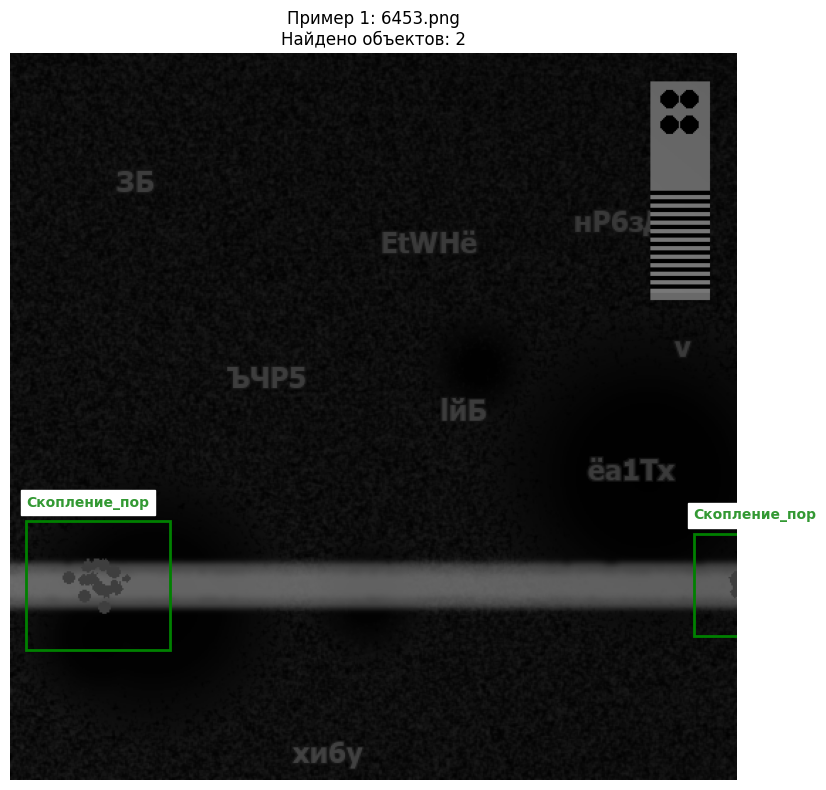

   ✅ Пример 1: 6453.png - 2 объектов


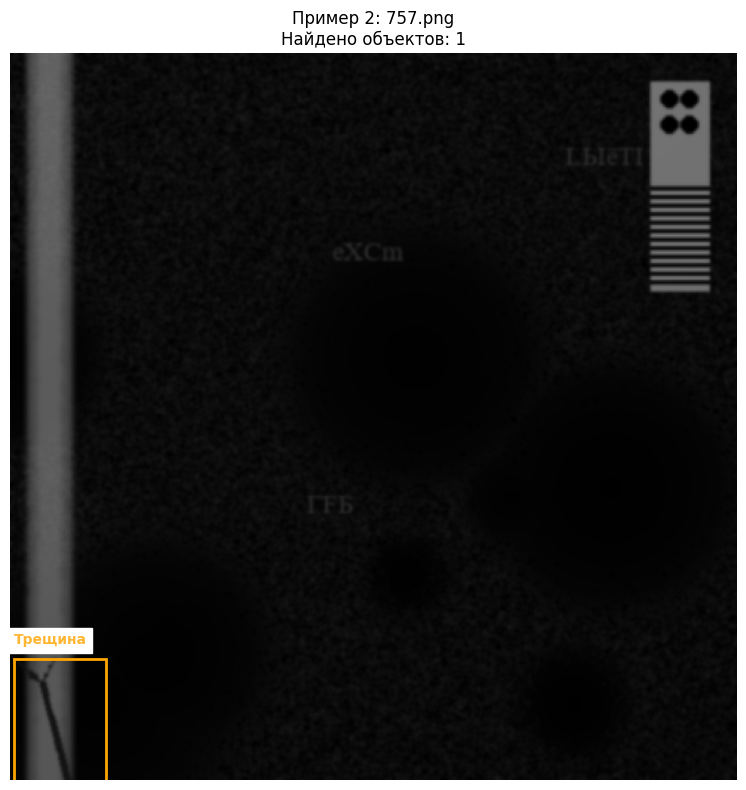

   ✅ Пример 2: 757.png - 1 объектов
📊 Val данные:


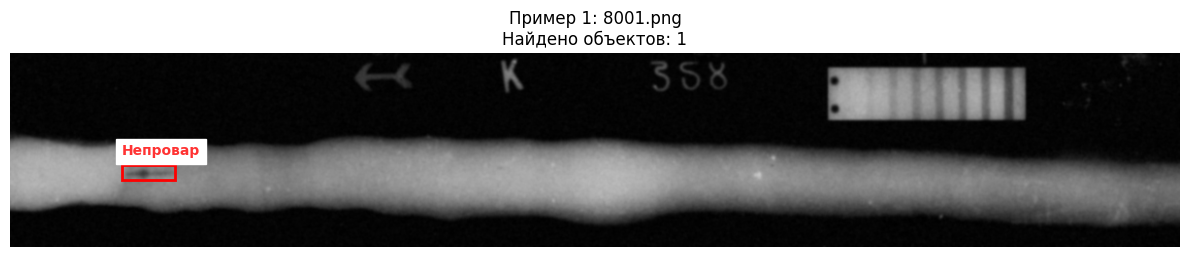

   ✅ Пример 1: 8001.png - 1 объектов


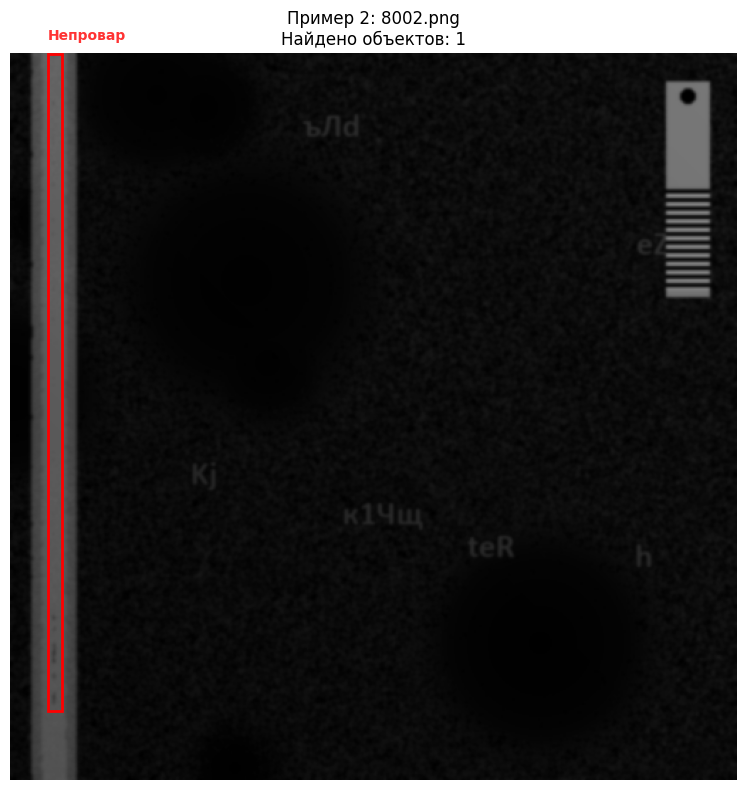

   ✅ Пример 2: 8002.png - 1 объектов

💾 ПРОВЕРКА РЕСУРСОВ СИСТЕМЫ...
   🎮 GPU: Tesla T4
   💾 Память GPU: 14.7 GB
   🧹 Память GPU очищена
   🖥️  RAM всего: 12.7 GB
   🖥️  RAM доступно: 10.1 GB
   🖥️  RAM используется: 20.7%
   💿 Диск всего: 112.6 GB
   💿 Диск свободно: 71.0 GB

⚙️  НАСТРОЙКА КОНФИГУРАЦИИ ОБУЧЕНИЯ...
   💾 Доступно GPU памяти: 14.7 GB
   🔍 Много GPU памяти, выбираем yolov8m.pt
   📁 Директория проекта: /content/drive/MyDrive/Colab Notebooks/XVL/runs/detect
   🤖 Модель: yolov8m.pt
   📊 Датасет: data.yaml
   ⚙️  Устройство: cuda
   🔄 Эпохи: 40
   🎯 Batch size: 32
   📐 Размер изображения: 512

🚀 ЗАПУСК ОБУЧЕНИЯ YOLOv8...

📋 ПАРАМЕТРЫ ОБУЧЕНИЯ:
   epochs: 40
   imgsz: 512
   batch: 32
   device: cuda
   workers: 4
   seed: 42
   patience: 30
   save: True
   save_period: 10
   exist_ok: True
   pretrained: True
   verbose: True
   project: /content/drive/MyDrive/Colab Notebooks/XVL/runs/detect
   name: weld_defects_20260125_061650
   plots: True
   val: True
   amp: True

⚠️  

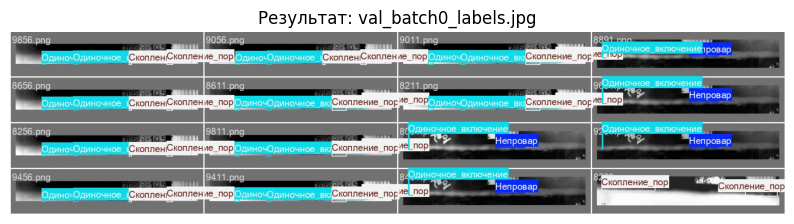

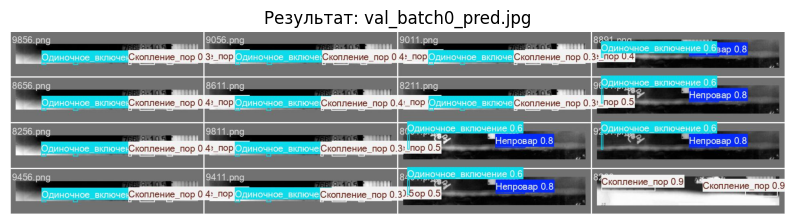


🧹 ОЧИСТКА ПАМЯТИ...
   ✅ Память GPU очищена

📊 ИТОГОВАЯ СТАТИСТИКА:
   ⏱️  Время выполнения: 9709.3 сек
   ✅ Обучение успешно: Да
   🎮 GPU память выделено: 0.55 GB
   🖥️  RAM используется: 47.3%

✅ БЛОК 9 ЗАВЕРШЕН

📚 ЧТО ДЕЛАТЬ ДАЛЬШЕ:

    1. 📊 АНАЛИЗ РЕЗУЛЬТАТОВ:
       - Проверьте папку: /content/drive/MyDrive/Colab Notebooks/XVL/runs/detect/weld_defects_20260125_061650
       - Посмотрите графики (loss, metrics)
       - Найдите best.pt и last.pt модели

    2. 🧪 ТЕСТИРОВАНИЕ МОДЕЛИ:
       from ultralytics import YOLO
       model = YOLO('/content/drive/MyDrive/Colab Notebooks/XVL/runs/detect/weld_defects_20260125_061650/weights/best.pt')
       results = model.predict('тестовое_изображение.jpg', save=True)

    3. 📈 УЛУЧШЕНИЕ МОДЕЛИ (если нужно):
       - Увеличьте epochs до 50-100
       - Попробуйте yolov8s.pt или yolov8m.pt (более крупные модели)
       - Увеличьте img_size до 1280 (если хватает памяти)
    


In [9]:
# ========== БЛОК 9: ИСПРАВЛЕННЫЙ СКРИПТ ОБУЧЕНИЯ ==========
print("=" * 70)
print("🤖 БЛОК 9: ЗАПУСК ОБУЧЕНИЯ YOLOv8")
print("=" * 70)

# ✅ ПЕРВЫЙ ШАГ: УСТАНОВКА И ИМПОРТ БИБЛИОТЕК
print("\n📦 УСТАНОВКА И ИМПОРТ БИБЛИОТЕК...")

import sys
import os
import json
import yaml
import shutil
import random
import time
import math
import warnings
import subprocess
import zipfile
import gc
from pathlib import Path
from datetime import datetime

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import psutil
import torch

# Установка ultralytics (YOLOv8)
print("⚙️  Установка ultralytics...")
!pip install ultralytics -q

# Импорт YOLO ПОСЛЕ установки
from ultralytics import YOLO

print("✅ Все библиотеки импортированы")
warnings.filterwarnings('ignore')

# ✅ ВТОРОЙ ШАГ: ОПРЕДЕЛЕНИЕ ПУТЕЙ
print("\n🗺️  ОПРЕДЕЛЕНИЕ ПУТЕЙ К ДАННЫМ...")

# Базовый путь
BASE_PATH = Path('/content/drive/MyDrive/Colab Notebooks/XVL')
print(f"📁 BASE_PATH: {BASE_PATH}")
print(f"📁 BASE_PATH существует: {BASE_PATH.exists()}")

# Используем датасет из блока 6
YOLO_DATA_PATH = BASE_PATH / "yolo_data"
print(f"📁 Датасет YOLO: {YOLO_DATA_PATH}")
print(f"📁 Существует: {YOLO_DATA_PATH.exists()}")

if not YOLO_DATA_PATH.exists():
    print("\n❌ ОШИБКА: Папка yolo_data не найдена!")
    print("   Запустите блок 6 для создания датасета в формате YOLO")
    sys.exit(1)

# Проверяем структуру датасета
print("\n🔍 ПРОВЕРКА СТРУКТУРЫ ДАТАСЕТА...")

# Ключевые папки
train_images_dir = YOLO_DATA_PATH / "images" / "train"
val_images_dir = YOLO_DATA_PATH / "images" / "val"
train_labels_dir = YOLO_DATA_PATH / "labels" / "train"
val_labels_dir = YOLO_DATA_PATH / "labels" / "val"

for path, name in [
    (train_images_dir, "train images"),
    (val_images_dir, "val images"),
    (train_labels_dir, "train labels"),
    (val_labels_dir, "val labels")
]:
    exists = path.exists()
    if exists:
        files = list(path.glob("*.*"))
        print(f"   ✅ {name}: {len(files)} файлов")
    else:
        print(f"   ❌ {name}: не найдено")

# Проверяем data.yaml
DATA_YAML = YOLO_DATA_PATH / "data.yaml"
if DATA_YAML.exists():
    print(f"   ✅ data.yaml: найден")

    # Читаем и проверяем содержимое
    with open(DATA_YAML, 'r', encoding='utf-8') as f:
        data_config = yaml.safe_load(f)

    print(f"   📊 Классы: {data_config.get('names', {})}")
    print(f"   📊 Количество классов: {data_config.get('nc', 0)}")

    # Сохраняем для использования в обучении
    CLASS_NAMES = data_config.get('names', {})
    NC = data_config.get('nc', 0)
else:
    print(f"   ❌ data.yaml: не найден")
    sys.exit(1)

# ✅ ТРЕТИЙ ШАГ: ВИЗУАЛИЗАЦИЯ ДАННЫХ (ПРОВЕРКА КОРРЕКТНОСТИ)
print("\n🖼️  ВИЗУАЛИЗАЦИЯ ДАННЫХ ДЛЯ ПРОВЕРКИ...")

def visualize_sample(image_dir, label_dir, num_samples=3):
    """Визуализирует несколько примеров с аннотациями"""
    image_files = list(image_dir.glob("*.png"))[:num_samples]

    if not image_files:
        print(f"   ⚠️  Нет изображений в {image_dir}")
        return

    for i, img_path in enumerate(image_files):
        try:
            # Загружаем изображение
            img = cv2.imread(str(img_path))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            height, width = img_rgb.shape[:2]

            # Загружаем аннотации
            label_path = label_dir / f"{img_path.stem}.txt"
            boxes = []
            class_ids = []

            if label_path.exists():
                with open(label_path, 'r') as f:
                    for line in f:
                        parts = line.strip().split()
                        if len(parts) == 5:
                            class_id, x_center, y_center, bbox_w, bbox_h = map(float, parts)

                            # Конвертируем в абсолютные координаты
                            x1 = (x_center - bbox_w/2) * width
                            y1 = (y_center - bbox_h/2) * height
                            x2 = (x_center + bbox_w/2) * width
                            y2 = (y_center + bbox_h/2) * height

                            boxes.append([x1, y1, x2, y2])
                            class_ids.append(int(class_id))

            # Создаем визуализацию
            plt.figure(figsize=(12, 8))
            plt.imshow(img_rgb)
            plt.axis('off')
            plt.title(f"Пример {i+1}: {img_path.name}\nНайдено объектов: {len(boxes)}")

            # Рисуем боксы
            colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta']
            for box, class_id in zip(boxes, class_ids):
                x1, y1, x2, y2 = box
                color = colors[class_id % len(colors)]

                # Прямоугольник
                rect = plt.Rectangle((x1, y1), x2-x1, y2-y1,
                                   linewidth=2, edgecolor=color, facecolor='none')
                plt.gca().add_patch(rect)

                # Подпись класса
                class_name = CLASS_NAMES.get(class_id, f'Класс {class_id}')
                plt.text(x1, y1-10, class_name,
                       color=color, fontsize=10, fontweight='bold',
                       backgroundcolor='white', alpha=0.8)

            plt.tight_layout()
            plt.show()

            print(f"   ✅ Пример {i+1}: {img_path.name} - {len(boxes)} объектов")

        except Exception as e:
            print(f"   ⚠️  Ошибка визуализации {img_path.name}: {e}")

# Визуализируем train и val данные
print("📊 Train данные:")
visualize_sample(train_images_dir, train_labels_dir, 2)

print("📊 Val данные:")
visualize_sample(val_images_dir, val_labels_dir, 2)

# ✅ ЧЕТВЕРТЫЙ ШАГ: ПРОВЕРКА ПАМЯТИ И РЕСУРСОВ
print("\n💾 ПРОВЕРКА РЕСУРСОВ СИСТЕМЫ...")

# Проверка GPU
if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3
    print(f"   🎮 GPU: {gpu_name}")
    print(f"   💾 Память GPU: {gpu_memory:.1f} GB")

    # Очищаем память GPU
    torch.cuda.empty_cache()
    print(f"   🧹 Память GPU очищена")
    device = "0"  # Используем GPU
else:
    print(f"   ⚠️  GPU не доступен, используется CPU")
    device = "cpu"

# Проверка RAM
ram = psutil.virtual_memory()
print(f"   🖥️  RAM всего: {ram.total / 1024**3:.1f} GB")
print(f"   🖥️  RAM доступно: {ram.available / 1024**3:.1f} GB")
print(f"   🖥️  RAM используется: {ram.percent}%")

# Проверка диска
try:
    disk = psutil.disk_usage('/')
    print(f"   💿 Диск всего: {disk.total / 1024**3:.1f} GB")
    print(f"   💿 Диск свободно: {disk.free / 1024**3:.1f} GB")
except:
    pass

# ✅ ПЯТЫЙ ШАГ: КОНФИГУРАЦИЯ ОБУЧЕНИЯ
print("\n⚙️  НАСТРОЙКА КОНФИГУРАЦИИ ОБУЧЕНИЯ...")

# Создаем конфигурацию
config = TrainingConfig()

print(f"   📁 Директория проекта: {config.save_dir}")
print(f"   🤖 Модель: {config.model_name}")
print(f"   📊 Датасет: {Path(config.data_yaml).name}")
print(f"   ⚙️  Устройство: {config.device}")
print(f"   🔄 Эпохи: {config.epochs}")
print(f"   🎯 Batch size: {config.batch_size}")
print(f"   📐 Размер изображения: {config.img_size}")

# ✅ ШЕСТОЙ ШАГ: ЗАПУСК ОБУЧЕНИЯ
print("\n🚀 ЗАПУСК ОБУЧЕНИЯ YOLOv8...")
print("=" * 70)

# Подготовка аргументов
train_args = {
    'data': config.data_yaml,
    'epochs': config.epochs,
    'imgsz': config.img_size,
    'batch': config.batch_size,
    'device': config.device,
    'workers': config.workers,
    'seed': config.seed,
    'patience': config.patience,
    'save': True,
    'save_period': config.save_period,
    'exist_ok': True,
    'pretrained': True,
    'verbose': True,
    'project': str(config.save_dir),
    'name': config.project_name,
    'plots': True,
    'val': True,
    'amp': True,  # Automatic Mixed Precision
}

# Информация перед запуском
print(f"\n📋 ПАРАМЕТРЫ ОБУЧЕНИЯ:")
for key, value in train_args.items():
    if key != 'data':  # data может быть длинным
        print(f"   {key}: {value}")

print(f"\n⚠️  ВНИМАНИЕ:")
print(f"   - Обучение начнется через 5 секунд")
print(f"   - Прервать: Ctrl+M I (в Colab)")
print(f"   - Результаты будут в: {config.save_dir}/{config.project_name}")

time.sleep(5)  # Даем время для прерывания

# Основной блок обучения
start_time = time.time()
training_successful = False

try:
    print("\n" + "=" * 70)
    print("🎯 НАЧАЛО ОБУЧЕНИЯ")
    print("=" * 70)

    # 1. Загрузка модели
    print(f"\n📦 ЗАГРУЗКА МОДЕЛИ {config.model_name}...")
    model = YOLO(config.model_name)
    print(f"✅ Модель загружена")

    # 2. Запуск обучения
    print(f"\n🔥 ЗАПУСК ОБУЧЕНИЯ...")

    # Важно: используем прямой вызов train
    results = model.train(**train_args)

    # 3. Обучение завершено
    training_successful = True
    end_time = time.time()
    training_duration = end_time - start_time

    print(f"\n" + "=" * 70)
    print("✅ ОБУЧЕНИЕ УСПЕШНО ЗАВЕРШЕНО!")
    print("=" * 70)
    print(f"⏱️  Общее время: {training_duration:.1f} секунд ({training_duration/60:.1f} минут)")

except KeyboardInterrupt:
    print(f"\n⚠️  ОБУЧЕНИЕ ПРЕРВАНО ПОЛЬЗОВАТЕЛЕМ")
    end_time = time.time()
    training_duration = end_time - start_time

except Exception as e:
    print(f"\n❌ ОШИБКА ВО ВРЕМЯ ОБУЧЕНИЯ:")
    print(f"   Тип ошибки: {type(e).__name__}")
    print(f"   Сообщение: {str(e)}")

    # Детальный traceback для диагностики
    import traceback
    print(f"\n🔍 ДЕТАЛИ ОШИБКИ:")
    traceback.print_exc()

    end_time = time.time()
    training_duration = end_time - start_time

finally:
    # ✅ СЕДЬМОЙ ШАГ: ПРОВЕРКА РЕЗУЛЬТАТОВ
    print("\n" + "=" * 70)
    print("📊 ПРОВЕРКА РЕЗУЛЬТАТОВ ОБУЧЕНИЯ")
    print("=" * 70)

    # Проверяем директорию с результатами
    results_dir = config.save_dir / config.project_name
    print(f"📁 Путь к результатам: {results_dir}")

    if results_dir.exists():
        print(f"✅ Директория результатов существует")

        # Список всех файлов
        all_files = list(results_dir.rglob("*"))
        print(f"📊 Всего файлов: {len(all_files)}")

        # Группируем по типам
        file_types = {}
        for file in all_files:
            ext = file.suffix.lower()
            if ext not in file_types:
                file_types[ext] = []
            file_types[ext].append(file)

        # Выводим информацию
        print(f"\n📋 ТИПЫ ФАЙЛОВ:")
        for ext, files in file_types.items():
            if ext:  # Пропускаем пустые расширения
                print(f"   {ext}: {len(files)} файлов")

        # Проверяем веса модели
        weights_dir = results_dir / "weights"
        if weights_dir.exists():
            weight_files = list(weights_dir.glob("*.pt"))
            print(f"\n⚖️  ФАЙЛЫ МОДЕЛЕЙ:")
            if weight_files:
                for wf in weight_files:
                    size_mb = wf.stat().st_size / 1024**2
                    if "best" in wf.name:
                        print(f"   🏆 BEST: {wf.name} ({size_mb:.1f} MB)")
                    elif "last" in wf.name:
                        print(f"   💾 LAST: {wf.name} ({size_mb:.1f} MB)")
                    else:
                        print(f"   📁 {wf.name} ({size_mb:.1f} MB)")
            else:
                print(f"   ⚠️  Файлы моделей не найдены")
        else:
            print(f"   ❌ Папка weights не найдена")

        # Проверяем графики
        image_files = list(results_dir.glob("*.jpg")) + list(results_dir.glob("*.png"))
        print(f"\n📈 ГРАФИКИ И ВИЗУАЛИЗАЦИИ:")
        if image_files:
            for img in image_files[:5]:  # Показываем первые 5
                size_kb = img.stat().st_size / 1024
                print(f"   📊 {img.name} ({size_kb:.1f} KB)")
            if len(image_files) > 5:
                print(f"   ... и еще {len(image_files)-5} файлов")
        else:
            print(f"   ⚠️  Графики не найдены")

        # Показываем примеры результатов
        print(f"\n🖼️  ПРИМЕРЫ РЕЗУЛЬТАТОВ:")
        result_images = list(results_dir.glob("val_batch*.jpg"))[:2]
        for img_path in result_images:
            try:
                img = cv2.imread(str(img_path))
                if img is not None:
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    plt.figure(figsize=(10, 6))
                    plt.imshow(img_rgb)
                    plt.axis('off')
                    plt.title(f"Результат: {img_path.name}")
                    plt.show()
            except:
                pass

    else:
        print(f"❌ Директория результатов не найдена: {results_dir}")

    # Очистка памяти
    print(f"\n🧹 ОЧИСТКА ПАМЯТИ...")
    gc.collect()

    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        print(f"   ✅ Память GPU очищена")

    print(f"\n📊 ИТОГОВАЯ СТАТИСТИКА:")
    print(f"   ⏱️  Время выполнения: {training_duration:.1f} сек")
    print(f"   ✅ Обучение успешно: {'Да' if training_successful else 'Нет'}")

    # Проверка памяти после обучения
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated() / 1024**3
        print(f"   🎮 GPU память выделено: {allocated:.2f} GB")

    ram = psutil.virtual_memory()
    print(f"   🖥️  RAM используется: {ram.percent}%")

print("\n" + "=" * 70)
print("✅ БЛОК 9 ЗАВЕРШЕН")
print("=" * 70)

# ✅ ВОСЬМОЙ ШАГ: ДОПОЛНИТЕЛЬНЫЕ ИНСТРУКЦИИ
print("\n📚 ЧТО ДЕЛАТЬ ДАЛЬШЕ:")

if training_successful:
    print("""
    1. 📊 АНАЛИЗ РЕЗУЛЬТАТОВ:
       - Проверьте папку: {}
       - Посмотрите графики (loss, metrics)
       - Найдите best.pt и last.pt модели

    2. 🧪 ТЕСТИРОВАНИЕ МОДЕЛИ:
       from ultralytics import YOLO
       model = YOLO('{}/weights/best.pt')
       results = model.predict('тестовое_изображение.jpg', save=True)

    3. 📈 УЛУЧШЕНИЕ МОДЕЛИ (если нужно):
       - Увеличьте epochs до 50-100
       - Попробуйте yolov8s.pt или yolov8m.pt (более крупные модели)
       - Увеличьте img_size до 1280 (если хватает памяти)
    """.format(results_dir, results_dir))
else:
    print("""
    1. 🔍 ДИАГНОСТИКА ПРОБЛЕМЫ:
       - Проверьте сообщение об ошибке выше
       - Убедитесь, что датасет создан правильно (запустите блок 6)
       - Проверьте, что в data.yaml правильные пути

    2. 🛠️  РЕШЕНИЯ:
       - Уменьшите batch_size до 4-8
       - Уменьшите imgsz до 320
       - Используйте model='yolov8n.pt' (самая маленькая)
       - Убедитесь, что в Google Drive достаточно места
    """)

print("=" * 70)

📊 БЛОК 10: ПРОВЕРКА РЕЗУЛЬТАТОВ
🔍 Проверяем результаты обучения...
📁 Директория результатов: /content/drive/MyDrive/Colab Notebooks/XVL/runs/detect/weld_defects_20260125_061650
✅ Директория результатов найдена

📁 СОДЕРЖИМОЕ ДИРЕКТОРИИ РЕЗУЛЬТАТОВ:
📁 weights/ (6 файлов)
📄 args.yaml (1.7 KB)
📄 labels.jpg (155.4 KB)
📄 train_batch0.jpg (326.5 KB)
📄 train_batch1.jpg (324.3 KB)
📄 train_batch2.jpg (319.8 KB)
📄 results.csv (7.2 KB)
📄 train_batch7500.jpg (288.0 KB)
📄 train_batch7501.jpg (293.6 KB)
📄 train_batch7502.jpg (253.4 KB)
📄 val_batch0_labels.jpg (153.1 KB)
📄 val_batch0_pred.jpg (159.2 KB)
📄 val_batch1_labels.jpg (166.2 KB)
📄 val_batch1_pred.jpg (167.0 KB)
📄 val_batch2_labels.jpg (168.4 KB)
📄 val_batch2_pred.jpg (170.6 KB)
📄 BoxPR_curve.png (154.8 KB)
📄 BoxF1_curve.png (199.0 KB)
📄 BoxP_curve.png (157.1 KB)
📄 BoxR_curve.png (189.1 KB)
📄 confusion_matrix_normalized.png (166.3 KB)
📄 confusion_matrix.png (161.9 KB)
📄 results.png (228.1 KB)

⚖️ ФАЙЛЫ МОДЕЛЕЙ:
   🏆 ЛУЧШАЯ МОДЕЛЬ: best.pt (49.

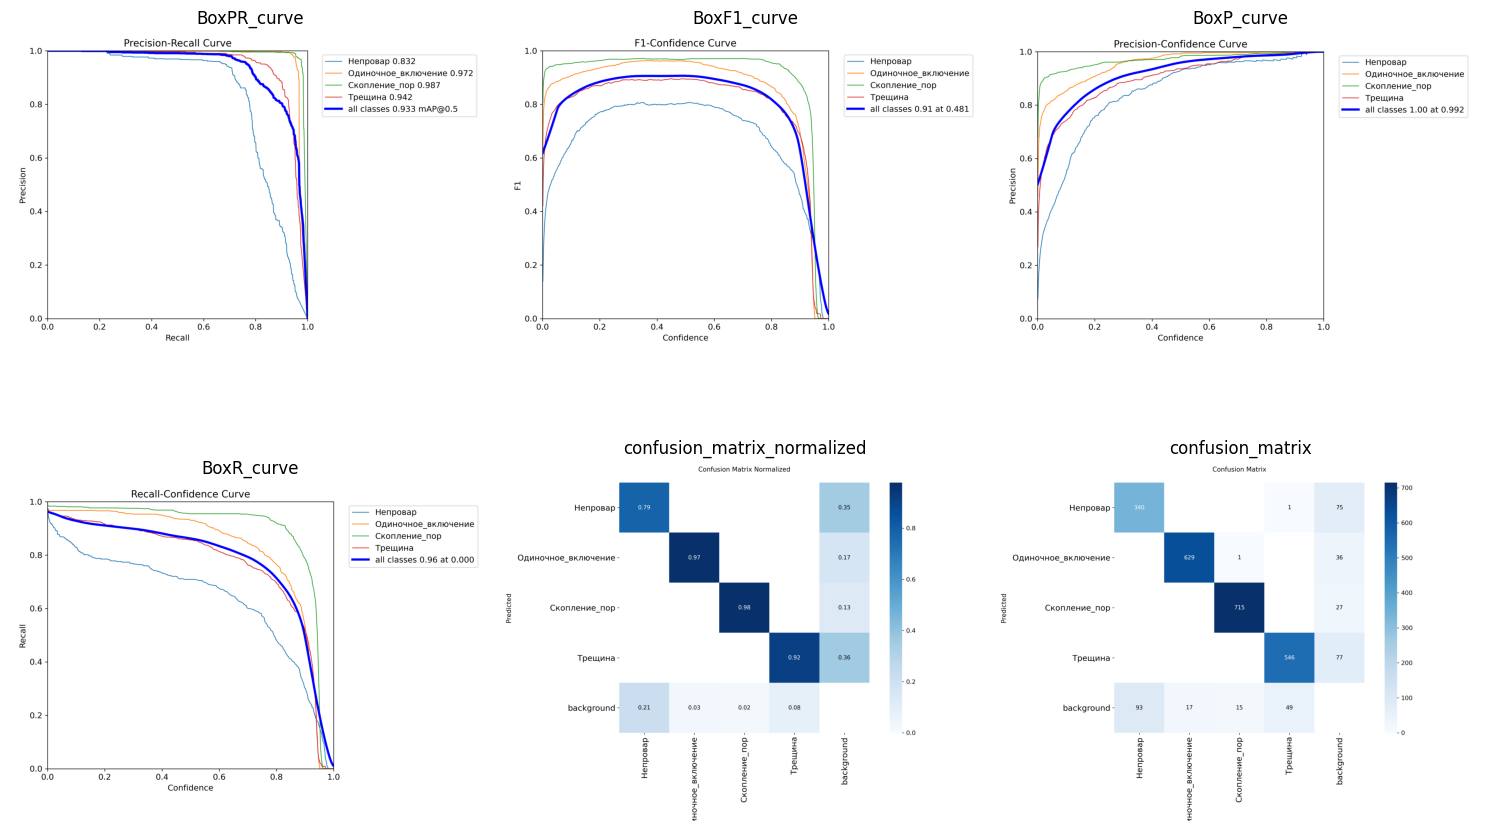


📋 Все графики:
   📊 BoxPR_curve.png (154.8 KB)
   📊 BoxF1_curve.png (199.0 KB)
   📊 BoxP_curve.png (157.1 KB)
   📊 BoxR_curve.png (189.1 KB)
   📊 confusion_matrix_normalized.png (166.3 KB)
   📊 confusion_matrix.png (161.9 KB)
   📊 results.png (228.1 KB)
   📊 labels.jpg (155.4 KB)
   📊 train_batch0.jpg (326.5 KB)
   📊 train_batch1.jpg (324.3 KB)
   📊 train_batch2.jpg (319.8 KB)
   📊 train_batch7500.jpg (288.0 KB)
   📊 train_batch7501.jpg (293.6 KB)
   📊 train_batch7502.jpg (253.4 KB)
   📊 val_batch0_labels.jpg (153.1 KB)
   📊 val_batch0_pred.jpg (159.2 KB)
   📊 val_batch1_labels.jpg (166.2 KB)
   📊 val_batch1_pred.jpg (167.0 KB)
   📊 val_batch2_labels.jpg (168.4 KB)
   📊 val_batch2_pred.jpg (170.6 KB)

📄 ФАЙЛЫ РЕЗУЛЬТАТОВ:
   📝 results.csv (7.2 KB)

💾 ИСПОЛЬЗОВАНИЕ ПАМЯТИ ПОСЛЕ ОБУЧЕНИЯ:
   GPU выделено: 0.55 GB
   RAM использовано: 52.4%
   RAM доступно: 6.0 GB

🎯 РЕЗЮМЕ ОБУЧЕНИЯ:
   Статус: ✅ УСПЕШНО
   Директория данных: /content/drive/MyDrive/Colab Notebooks/XVL/yolo_data
   Директ

In [10]:
# ========== БЛОК 10: ПРОВЕРКА РЕЗУЛЬТАТОВ ==========
print("=" * 70)
print("📊 БЛОК 10: ПРОВЕРКА РЕЗУЛЬТАТОВ")
print("=" * 70)

print("🔍 Проверяем результаты обучения...")

# Путь к результатам
results_dir = Path(config.save_dir) / config.project_name
print(f"📁 Директория результатов: {results_dir}")

if not results_dir.exists():
    print(f"❌ Директория результатов не найдена!")
    print(f"💡 Возможно, обучение не запускалось или завершилось с ошибкой")
else:
    print(f"✅ Директория результатов найдена")

    # Показываем содержимое
    print(f"\n📁 СОДЕРЖИМОЕ ДИРЕКТОРИИ РЕЗУЛЬТАТОВ:")

    items = list(results_dir.iterdir())
    if items:
        for item in items:
            if item.is_dir():
                sub_items = list(item.iterdir())
                print(f"📁 {item.name}/ ({len(sub_items)} файлов)")
            else:
                size_kb = item.stat().st_size / 1024
                print(f"📄 {item.name} ({size_kb:.1f} KB)")
    else:
        print("📭 Директория пуста")

    # Проверяем веса моделей
    weights_dir = results_dir / "weights"
    if weights_dir.exists():
        print(f"\n⚖️ ФАЙЛЫ МОДЕЛЕЙ:")
        model_files = list(weights_dir.glob("*.pt"))

        if model_files:
            for model_file in sorted(model_files):
                size_mb = model_file.stat().st_size / 1024**2

                # Определяем тип модели
                if "best" in model_file.name:
                    model_type = "🏆 ЛУЧШАЯ МОДЕЛЬ"
                elif "last" in model_file.name:
                    model_type = "📁 ПОСЛЕДНЯЯ МОДЕЛЬ"
                elif "epoch" in model_file.name:
                    model_type = "⏱️  ЧЕКПОИНТ"
                else:
                    model_type = "📦 МОДЕЛЬ"

                print(f"   {model_type}: {model_file.name} ({size_mb:.1f} MB)")

            # Проверяем лучшую модель
            best_model = weights_dir / "best.pt"
            if best_model.exists():
                print(f"\n✅ Лучшая модель сохранена: {best_model}")

                # Проверяем, можно ли загрузить модель
                try:
                    test_model = YOLO(str(best_model))
                    print(f"✅ Модель успешно загружается")

                    # Показываем информацию о модели
                    print(f"📊 Информация о модели:")
                    print(f"   Классов: {test_model.model.nc}")
                    print(f"   Имена классов: {test_model.names}")

                except Exception as e:
                    print(f"❌ Ошибка загрузки модели: {e}")
            else:
                print(f"⚠️ Лучшая модель не найдена")
        else:
            print(f"❌ Файлы моделей не найдены")
    else:
        print(f"❌ Директория весов не найдена")

    # Проверяем графики
    print(f"\n📈 ГРАФИКИ И МЕТРИКИ:")
    image_files = list(results_dir.glob("*.png")) + list(results_dir.glob("*.jpg"))

    if image_files:
        print(f"✅ Найдено графиков: {len(image_files)}")

        # Показываем графики
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.flatten()

        for idx, img_file in enumerate(image_files[:6]):
            if idx >= len(axes):
                break

            try:
                img = plt.imread(str(img_file))
                axes[idx].imshow(img)
                axes[idx].axis('off')
                axes[idx].set_title(img_file.stem)
            except:
                axes[idx].text(0.5, 0.5, f"Ошибка\n{img_file.name}",
                             ha='center', va='center', transform=axes[idx].transAxes)
                axes[idx].axis('off')

        # Скрываем лишние оси
        for idx in range(len(image_files[:6]), len(axes)):
            axes[idx].axis('off')

        plt.tight_layout()
        plt.show()

        # Перечисляем все графики
        print(f"\n📋 Все графики:")
        for img_file in image_files:
            size_kb = img_file.stat().st_size / 1024
            print(f"   📊 {img_file.name} ({size_kb:.1f} KB)")
    else:
        print(f"⚠️ Графики не найдены")

    # Проверяем результаты
    print(f"\n📄 ФАЙЛЫ РЕЗУЛЬТАТОВ:")
    result_files = list(results_dir.glob("results*.csv")) + list(results_dir.glob("*.txt"))

    if result_files:
        for result_file in result_files:
            size_kb = result_file.stat().st_size / 1024
            print(f"   📝 {result_file.name} ({size_kb:.1f} KB)")

            # Показываем содержимое текстовых файлов
            if result_file.suffix == '.txt' and size_kb < 100:  # Показываем только маленькие файлы
                try:
                    with open(result_file, 'r', encoding='utf-8') as f:
                        content = f.read()
                        if content.strip():
                            print(f"      📄 Содержимое (первые 5 строк):")
                            for line in content.split('\n')[:5]:
                                if line.strip():
                                    print(f"         {line[:80]}...")
                except:
                    pass
    else:
        print(f"⚠️ Файлы результатов не найдены")

# Проверка использования памяти после обучения
print(f"\n💾 ИСПОЛЬЗОВАНИЕ ПАМЯТИ ПОСЛЕ ОБУЧЕНИЯ:")
if config.device == "cuda":
    allocated = torch.cuda.memory_allocated() / 1024**3
    print(f"   GPU выделено: {allocated:.2f} GB")

ram_usage = psutil.virtual_memory()
print(f"   RAM использовано: {ram_usage.percent}%")
print(f"   RAM доступно: {ram_usage.available / 1024**3:.1f} GB")

# Резюме
print(f"\n🎯 РЕЗЮМЕ ОБУЧЕНИЯ:")
print(f"   Статус: {'✅ УСПЕШНО' if training_successful else '❌ НЕ УДАЛОСЬ'}")
print(f"   Директория данных: {YOLO_DIR}")
print(f"   Директория моделей: {results_dir}")
print(f"   Конфигурация: {config.data_yaml}")

if training_successful and 'results' in locals():
    print(f"\n📊 МЕТРИКИ ОБУЧЕНИЯ:")
    try:
        if hasattr(results, 'results_dict'):
            metrics = results.results_dict
            for key, value in metrics.items():
                print(f"   {key}: {value:.4f}")
    except:
        print(f"   ⚠️ Метрики недоступны")

print("\n" + "=" * 70)
print("✅ БЛОК 10 ЗАВЕРШЕН")
print("=" * 70)

🧪 БЛОК 11: ТЕСТИРОВАНИЕ ОБУЧЕННОЙ МОДЕЛИ
📦 Устанавливаем необходимые библиотеки...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

🗺️  Определяем пути...
📁 BASE_PATH: /content/drive/MyDrive/Colab Notebooks/XVL
📁 Существует: True

🔍 Ищем обученные модели...
✅ Найдено моделей: 12
1. 🏆 best.pt
   📏 Размер: 49.6 MB
   📁 Путь: /content/drive/MyDrive/Colab Notebooks/XVL/runs/detect/weld_defects_20260125_061650/weights

2. 🏆 best.pt
   📏 Размер: 49.6 MB
   📁 Путь: /content/drive/MyDrive/Colab Notebooks/XVL/runs/detect/weld_defects_20260125_061650/weights

3. 📁 epoch30.pt
   📏 Размер: 148.3 MB
   📁 Путь: /content/drive/MyDrive/Colab Notebooks/XVL/runs/detect/weld_defects_20260125_061650/weights

4. 📁 epoch30.pt
   📏 Размер: 148.3 MB
   📁 Путь: /content/drive/MyDrive/Colab Notebooks/XVL/runs/detect/weld_defects_20260125_061650/weights

5. 📁 epoch20.pt
   📏 Размер: 148.3 MB
   📁 Путь: /content/drive/MyDrive/Colab N

Saving Q1.png to Q1.png
📸 Загружено изображение: Q1.png

🔍 Анализируем изображение...

image 1/1 /content/Q1.png: 640x640 (no detections), 37.0ms
Speed: 2.7ms preprocess, 37.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/results/test

📊 РЕЗУЛЬТАТЫ ДЕТЕКЦИИ:


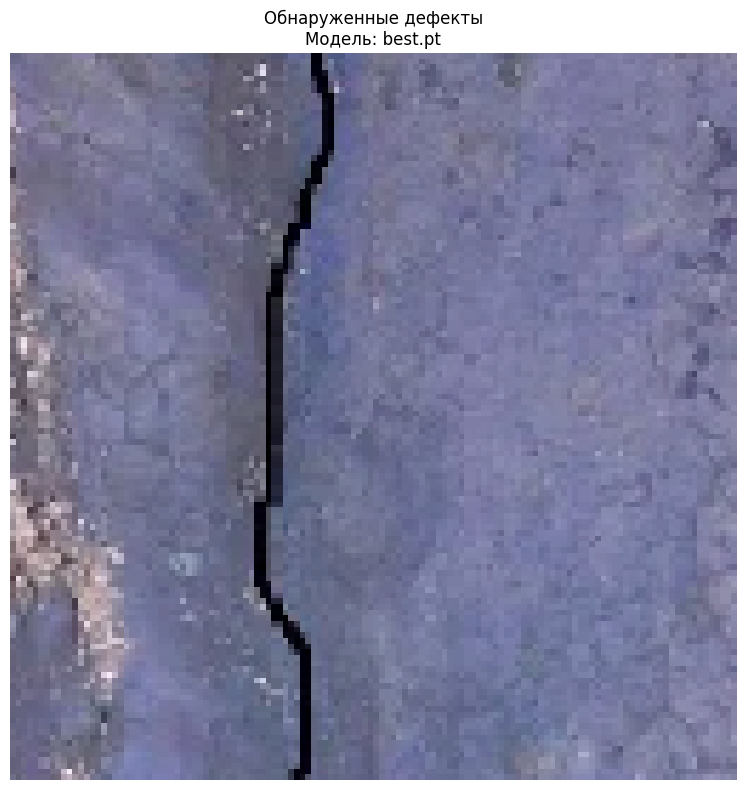

⚠️  Дефекты не обнаружены

📊 ТЕСТ НА ВАЛИДАЦИОННЫХ ДАННЫХ
📁 Найдена директория валидации: /content/drive/MyDrive/Colab Notebooks/XVL/yolo_data/images/val
📸 Найдено валидационных изображений: 2000

🧪 Быстрый тест на 2 изображениях:
  1. 9828.png: 1 дефектов
  2. 9117.png: 0 дефектов

📈 Среднее дефектов на изображение: 0.5

💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
📁 Результаты сохранены в: /content/results
📊 Сохранено файлов: 2
  .JPG: 1 файлов

📚 ИНСТРУКЦИИ ДЛЯ ДАЛЬНЕЙШЕГО ТЕСТИРОВАНИЯ

1. 🧪 ПОВТОРИТЬ ТЕСТ:
   Запустите этот блок снова и загрузите новое изображение.

2. 🖼️  ПРОТЕСТИРОВАТЬ НА СВОИХ ДАННЫХ:
   from ultralytics import YOLO
   model = YOLO('/content/drive/MyDrive/Colab Notebooks/XVL/runs/detect/weld_defects_20260125_061650/weights/best.pt')
   results = model.predict('ваше_изображение.jpg', save=True)

3. 📊 ОЦЕНИТЬ КАЧЕСТВА:
   results = model.val(data='/content/drive/MyDrive/Colab Notebooks/XVL/yolo_data/data.yaml')

4. 📈 ВИЗУАЛИЗИРОВАТЬ РЕЗУЛЬТАТЫ:
   result_img = results[0].plot()
   pl

In [11]:
# ========== БЛОК 11: ТЕСТИРОВАНИЕ МОДЕЛИ (ПРОСТОЙ И АВТОНОМНЫЙ) ==========
print("=" * 70)
print("🧪 БЛОК 11: ТЕСТИРОВАНИЕ ОБУЧЕННОЙ МОДЕЛИ")
print("=" * 70)

# ✅ УСТАНОВКА БИБЛИОТЕК
print("📦 Устанавливаем необходимые библиотеки...")
!pip install ultralytics -q

from google.colab import drive
drive.mount("/content/drive")

# ✅ ИМПОРТ
import sys
from pathlib import Path
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import random
import json
from datetime import datetime

# ✅ ОПРЕДЕЛЕНИЕ ПУТЕЙ
print("\n🗺️  Определяем пути...")

# Базовый путь Google Drive
BASE_PATH = Path('/content/drive/MyDrive/Colab Notebooks/XVL')

# Проверяем существование
print(f"📁 BASE_PATH: {BASE_PATH}")
print(f"📁 Существует: {BASE_PATH.exists()}")

if not BASE_PATH.exists():
    print("❌ ОШИБКА: Google Drive не смонтирован!")
    print("💡 Сначала выполните: from google.colab import drive; drive.mount('/content/drive')")
    sys.exit(1)

# ✅ ПОИСК ОБУЧЕННЫХ МОДЕЛЕЙ
print("\n🔍 Ищем обученные модели...")

# Где искать модели
search_paths = [
    BASE_PATH / "runs" / "detect",
    BASE_PATH / "models",
    BASE_PATH,
]

found_models = []

for search_path in search_paths:
    if search_path.exists():
        # Ищем файлы .pt
        for pt_file in search_path.rglob("*.pt"):
            if pt_file.stat().st_size > 0:  # Только непустые файлы
                priority = 0
                if "best" in pt_file.name.lower():
                    priority = 100
                elif "last" in pt_file.name.lower():
                    priority = 50

                found_models.append({
                    'path': pt_file,
                    'priority': priority + pt_file.stat().st_size / (1024**2),
                    'size_mb': pt_file.stat().st_size / (1024**2)
                })

if found_models:
    # Сортируем по приоритету
    found_models.sort(key=lambda x: x['priority'], reverse=True)

    print(f"✅ Найдено моделей: {len(found_models)}")
    print("=" * 50)

    # Показываем список
    for i, model_info in enumerate(found_models[:5]):  # Показываем первые 5
        model_path = model_info['path']
        size_mb = model_info['size_mb']

        prefix = "🏆 " if "best" in model_path.name.lower() else "💾 " if "last" in model_path.name.lower() else "📁 "

        print(f"{i+1}. {prefix}{model_path.name}")
        print(f"   📏 Размер: {size_mb:.1f} MB")
        print(f"   📁 Путь: {model_path.parent}")
        print()

    # Выбираем первую модель (наилучшую)
    model_path = found_models[0]['path']
    print(f"🎯 Используем модель: {model_path.name}")

else:
    print("❌ Обученные модели не найдены!")
    print("💡 Используем предобученную модель YOLOv8n")
    model_path = "yolov8n.pt"

# ✅ ЗАГРУЗКА МОДЕЛИ
print(f"\n📦 Загружаем модель...")
try:
    model = YOLO(str(model_path))
    print(f"✅ Модель загружена: {model_path.name if hasattr(model_path, 'name') else model_path}")

    # Показываем информацию о модели
    if hasattr(model, 'names') and model.names:
        print(f"📊 Классов: {len(model.names)}")
        print(f"📊 Имена классов: {model.names}")

except Exception as e:
    print(f"❌ Ошибка загрузки модели: {e}")
    print("🔄 Пробуем предобученную модель...")
    model = YOLO("yolov8n.pt")
    print("✅ Загружена предобученная модель YOLOv8n")

# ✅ ТЕСТИРОВАНИЕ НА ЗАГРУЖЕННОМ ИЗОБРАЖЕНИИ
print("\n" + "=" * 70)
print("🖼️  ТЕСТИРОВАНИЕ НА ИЗОБРАЖЕНИИ")
print("=" * 70)

print("📤 Загрузите изображение для анализа...")
uploaded = files.upload()

if not uploaded:
    print("⚠️  Изображение не загружено, создаем тестовое...")
    # Создаем тестовое изображение
    test_img = np.random.randint(0, 255, (640, 640, 3), dtype=np.uint8)
    test_img_path = "/content/test_image.jpg"
    cv2.imwrite(test_img_path, test_img)
    image_path = test_img_path
    print(f"📸 Создано тестовое изображение: {test_img_path}")
else:
    # Берем первое загруженное изображение
    image_name = list(uploaded.keys())[0]
    with open(f"/content/{image_name}", 'wb') as f:
        f.write(uploaded[image_name])
    image_path = f"/content/{image_name}"
    print(f"📸 Загружено изображение: {image_name}")

# ✅ ПРЕДСКАЗАНИЕ
print(f"\n🔍 Анализируем изображение...")

results = model.predict(
    source=image_path,
    conf=0.25,      # Порог уверенности
    imgsz=640,      # Размер изображения
    save=True,      # Сохранить результат
    project="/content/results",
    name="test",
    exist_ok=True
)

# ✅ ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
print("\n📊 РЕЗУЛЬТАТЫ ДЕТЕКЦИИ:")

if results and len(results) > 0:
    result = results[0]

    # Визуализация
    result_img = result.plot()
    plt.figure(figsize=(12, 8))
    plt.imshow(result_img)
    plt.axis('off')
    plt.title(f"Обнаруженные дефекты\nМодель: {model_path.name if hasattr(model_path, 'name') else 'YOLOv8n'}")
    plt.tight_layout()
    plt.show()

    # Статистика
    if result.boxes is not None and len(result.boxes) > 0:
        detections = len(result.boxes)
        print(f"✅ Найдено дефектов: {detections}")
        print("\n📋 ДЕТАЛИ:")

        # Группируем по классам
        class_counts = {}
        for i, box in enumerate(result.boxes):
            class_id = int(box.cls[0])
            confidence = float(box.conf[0])

            if hasattr(model, 'names') and model.names:
                class_name = model.names.get(class_id, f"Дефект {class_id}")
            else:
                class_name = f"Дефект {class_id}"

            class_counts[class_name] = class_counts.get(class_name, 0) + 1

            # Показываем первые 3 детекции подробно
            if i < 3:
                bbox = box.xyxy[0].cpu().numpy()
                print(f"  {i+1}. {class_name}")
                print(f"     Уверенность: {confidence:.1%}")
                print(f"     Координаты: [{bbox[0]:.0f}, {bbox[1]:.0f}, {bbox[2]:.0f}, {bbox[3]:.0f}]")

        # Сводная статистика по классам
        print(f"\n📊 РАСПРЕДЕЛЕНИЕ ПО КЛАССАМ:")
        for class_name, count in class_counts.items():
            percentage = count / detections * 100
            print(f"  🏷️  {class_name}: {count} ({percentage:.1f}%)")

    else:
        print("⚠️  Дефекты не обнаружены")
else:
    print("❌ Ошибка анализа")

# ✅ ТЕСТ НА ВАЛИДАЦИОННЫХ ДАННЫХ (ЕСЛИ ЕСТЬ)
print("\n" + "=" * 70)
print("📊 ТЕСТ НА ВАЛИДАЦИОННЫХ ДАННЫХ")
print("=" * 70)

# Ищем валидационные данные
val_dir = BASE_PATH / "yolo_data" / "images" / "val"
if val_dir.exists():
    print(f"📁 Найдена директория валидации: {val_dir}")

    # Получаем список изображений
    image_extensions = ['.jpg', '.jpeg', '.png']
    val_images = []
    for ext in image_extensions:
        val_images.extend(val_dir.glob(f"*{ext}"))

    if val_images:
        print(f"📸 Найдено валидационных изображений: {len(val_images)}")

        # Выбираем 2 случайных изображения для быстрого теста
        test_images = random.sample(val_images, min(2, len(val_images)))

        print("\n🧪 Быстрый тест на 2 изображениях:")
        total_detections = 0

        for i, img_path in enumerate(test_images):
            try:
                result = model.predict(
                    source=str(img_path),
                    conf=0.25,
                    imgsz=640,
                    save=False,
                    verbose=False
                )[0]

                detections = len(result.boxes) if result.boxes is not None else 0
                print(f"  {i+1}. {img_path.name}: {detections} дефектов")
                total_detections += detections

            except Exception as e:
                print(f"  {i+1}. {img_path.name}: ошибка")

        if len(test_images) > 0:
            avg_detections = total_detections / len(test_images)
            print(f"\n📈 Среднее дефектов на изображение: {avg_detections:.1f}")
    else:
        print("⚠️  Валидационные изображения не найдены")
else:
    print("⚠️  Валидационные данные не найдены")

# ✅ СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
print("\n" + "=" * 70)
print("💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")
print("=" * 70)

# Создаем директорию для результатов
results_dir = Path("/content/results")
if results_dir.exists():
    print(f"📁 Результаты сохранены в: {results_dir}")

    # Показываем сохраненные файлы
    saved_files = list(results_dir.rglob("*"))
    if saved_files:
        print(f"📊 Сохранено файлов: {len(saved_files)}")

        # Группируем по типам
        file_types = {}
        for file in saved_files[:10]:  # Показываем первые 10
            if file.is_file():
                ext = file.suffix.lower()
                if ext not in file_types:
                    file_types[ext] = []
                file_types[ext].append(file)

        for ext, files in file_types.items():
            if ext:  # Пропускаем пустые расширения
                print(f"  {ext.upper()}: {len(files)} файлов")

        # Находим предсказанные изображения
        predicted_images = list(results_dir.rglob("*predict*.jpg")) + list(results_dir.rglob("*predict*.png"))
        if predicted_images:
            print(f"\n🖼️  Предсказанные изображения:")
            for img_path in predicted_images[:3]:
                print(f"  📄 {img_path.name}")

# ✅ ИНСТРУКЦИИ ДЛЯ ДАЛЬНЕЙШЕГО ИСПОЛЬЗОВАНИЯ
print("\n" + "=" * 70)
print("📚 ИНСТРУКЦИИ ДЛЯ ДАЛЬНЕЙШЕГО ТЕСТИРОВАНИЯ")
print("=" * 70)

print("""
1. 🧪 ПОВТОРИТЬ ТЕСТ:
   Запустите этот блок снова и загрузите новое изображение.

2. 🖼️  ПРОТЕСТИРОВАТЬ НА СВОИХ ДАННЫХ:
   from ultralytics import YOLO
   model = YOLO('{}')
   results = model.predict('ваше_изображение.jpg', save=True)

3. 📊 ОЦЕНИТЬ КАЧЕСТВА:
   results = model.val(data='{}/yolo_data/data.yaml')

4. 📈 ВИЗУАЛИЗИРОВАТЬ РЕЗУЛЬТАТЫ:
   result_img = results[0].plot()
   plt.imshow(result_img)
   plt.show()
""".format(str(model_path) if hasattr(model_path, 'name') else model_path, BASE_PATH))

print("\n" + "=" * 70)
print("✅ БЛОК 11 ЗАВЕРШЕН")
print("=" * 70)

In [12]:
# ========== БЛОК 12: ОЧИСТКА И ФИНАЛЬНЫЙ ОТЧЕТ ==========
print("=" * 70)
print("🧹 БЛОК 12: ОЧИСТКА И ФИНАЛЬНЫЙ ОТЧЕТ")
print("=" * 70)

# Очистка временных файлов
print("🧹 Очищаем временные файлы...")

temp_dirs_to_clean = [
    BASE_PATH / "extracted_data",
    Path("/content/test_results"),
    Path("/content/test_images"),
    Path("/content/test_annotations"),
]

for temp_dir in temp_dirs_to_clean:
    if temp_dir.exists():
        try:
            shutil.rmtree(temp_dir)
            print(f"✅ Удалено: {temp_dir}")
        except Exception as e:
            print(f"⚠️ Не удалось удалить {temp_dir}: {e}")

# Сохраняем важные файлы
print(f"\n💾 Сохраняем важные файлы в Google Drive...")

important_files = []
if 'best_model_path' in locals() and best_model_path and best_model_path.exists():
    important_files.append(best_model_path)

if 'results_dir' in locals() and results_dir and results_dir.exists():
    important_files.extend(list(results_dir.rglob("*.*")))

if important_files:
    print(f"📦 Важных файлов: {len(important_files)}")

    # Создаем архив с результатами
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    results_archive = BASE_PATH / f"training_results_{timestamp}.zip"

    try:
        with zipfile.ZipFile(results_archive, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for file in important_files:
                if file.exists():
                    # Сохраняем относительные пути
                    arcname = file.relative_to(BASE_PATH)
                    zipf.write(file, arcname)

        archive_size = results_archive.stat().st_size / 1024**2
        print(f"✅ Архив создан: {results_archive.name} ({archive_size:.1f} MB)")
    except Exception as e:
        print(f"⚠️ Не удалось создать архив: {e}")
else:
    print(f"⚠️ Важные файлы не найдены")

# Финальный отчет
print(f"\n📊 ФИНАЛЬНЫЙ ОТЧЕТ:")
print(f"=" * 40)

print(f"📅 Дата выполнения: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"📁 Рабочая директория: {BASE_PATH}")
print(f"🤖 Модель: {config.model_name}")
print(f"🎯 Эпох: {config.epochs}")
print(f"📊 Batch size: {config.batch_size}")
print(f"🖼️ Размер изображения: {config.img_size}")

if 'training_duration' in locals():
    hours, remainder = divmod(training_duration, 3600)
    minutes, seconds = divmod(remainder, 60)
    print(f"⏱️  Время обучения: {int(hours)}ч {int(minutes)}м {int(seconds)}с")

# Проверяем наличие обученной модели
final_model_path = None
if 'best_model_path' in locals() and best_model_path and best_model_path.exists():
    final_model_path = best_model_path
elif weights_dir and weights_dir.exists():
    model_files = list(weights_dir.glob("*.pt"))
    if model_files:
        final_model_path = model_files[0]

if final_model_path:
    model_size = final_model_path.stat().st_size / 1024**2
    print(f"✅ Обученная модель: {final_model_path.name}")
    print(f"📏 Размер модели: {model_size:.1f} MB")
    print(f"📁 Путь к модели: {final_model_path}")

    # Проверяем доступность модели для использования
    try:
        test_model = YOLO(str(final_model_path))
        print(f"🎯 Модель готова к использованию!")

        # Пример команды для использования
        print(f"\n💡 КОМАНДА ДЛЯ ИСПОЛЬЗОВАНИЯ МОДЕЛИ:")
        print(f"   from ultralytics import YOLO")
        print(f"   model = YOLO('{final_model_path}')")
        print(f"   results = model.predict('ваше_изображение.jpg', conf=0.25)")
    except Exception as e:
        print(f"⚠️ Модель не прошла финальную проверку: {e}")
else:
    print(f"❌ Обученная модель не найдена")

# Статистика использования памяти
print(f"\n💾 ИТОГОВАЯ СТАТИСТИКА ПАМЯТИ:")
import psutil
ram = psutil.virtual_memory()
print(f"   RAM использовано: {ram.percent}%")
print(f"   RAM доступно: {ram.available / 1024**3:.1f} GB")

if config.device == "cuda":
    allocated = torch.cuda.memory_allocated() / 1024**3
    print(f"   GPU выделено: {allocated:.2f} GB")

# Рекомендации
print(f"\n💡 РЕКОМЕНДАЦИИ:")
if final_model_path:
    print(f"   1. Модель сохранена в Google Drive")
    print(f"   2. Для дальнейшего использования скопируйте путь к модели")
    print(f"   3. Модель можно дообучать с параметром resume=True")
else:
    print(f"   1. Обучение не завершилось успешно")
    print(f"   2. Проверьте логи в блоке 9")
    print(f"   3. Убедитесь, что данные корректны (блок 7)")

print(f"\n🎉 ПРОЦЕСС ВЫПОЛНЕНИЯ ЗАВЕРШЕН!")
print(f"=" * 70)

🧹 БЛОК 12: ОЧИСТКА И ФИНАЛЬНЫЙ ОТЧЕТ
🧹 Очищаем временные файлы...

💾 Сохраняем важные файлы в Google Drive...
📦 Важных файлов: 1
⚠️ Не удалось создать архив: '/content/results/test/Q1.jpg' is not in the subpath of '/content/drive/MyDrive/Colab Notebooks/XVL'

📊 ФИНАЛЬНЫЙ ОТЧЕТ:
📅 Дата выполнения: 2026-01-25 09:20:24
📁 Рабочая директория: /content/drive/MyDrive/Colab Notebooks/XVL
🤖 Модель: yolov8m.pt
🎯 Эпох: 40
📊 Batch size: 32
🖼️ Размер изображения: 512
⏱️  Время обучения: 2ч 41м 49с
✅ Обученная модель: last.pt
📏 Размер модели: 49.6 MB
📁 Путь к модели: /content/drive/MyDrive/Colab Notebooks/XVL/runs/detect/weld_defects_20260125_061650/weights/last.pt
🎯 Модель готова к использованию!

💡 КОМАНДА ДЛЯ ИСПОЛЬЗОВАНИЯ МОДЕЛИ:
   from ultralytics import YOLO
   model = YOLO('/content/drive/MyDrive/Colab Notebooks/XVL/runs/detect/weld_defects_20260125_061650/weights/last.pt')
   results = model.predict('ваше_изображение.jpg', conf=0.25)

💾 ИТОГОВАЯ СТАТИСТИКА ПАМЯТИ:
   RAM использовано: 51.7%

##################### ТЕСТИРОВАНИЕ ########################

🖼️ БЛОК 14: ТЕСТИРОВАНИЕ МОДЕЛИ НА ВЫБРАННОМ ИЗОБРАЖЕНИИ
🚀 Запуск независимого блока тестирования...

📦 УСТАНОВКА НЕОБХОДИМЫХ БИБЛИОТЕК...
   ✅ ultralytics уже установлен
   📦 Устанавливаем opencv-python-headless...
   ✅ opencv-python-headless установлен
   📦 Устанавливаем pillow...
   ✅ pillow установлен
   ✅ matplotlib уже установлен
   ✅ numpy уже установлен
   ✅ tqdm уже установлен
   ✅ ipywidgets уже установлен

🔧 ИМПОРТ БИБЛИОТЕК...
   ✅ Все библиотеки импортированы

🚀 МОНТИРОВАНИЕ GOOGLE DRIVE...
   ✅ Google Drive уже смонтирован
   📂 Рабочая директория: /content/drive/MyDrive/Colab Notebooks/XVL

🔍 ПОИСК ОБУЧЕННОЙ МОДЕЛИ...
✅ Найдено моделей: 8

📋 ДОСТУПНЫЕ МОДЕЛИ:
1. 🏆 best.pt (49.6 MB)
   📁 /content/drive/MyDrive/Colab Notebooks/XVL/runs/detect/weld_defects_20260125_061650/weights
2. 🏆 best.pt (49.6 MB)
   📁 /content/drive/MyDrive/Colab Notebooks/XVL/runs/detect/weld_defects_20260125_061650/weights
3. 💾 last.pt (49.6 MB)
   📁 /content/drive/MyDrive/Colab Notebooks/XVL/runs/de

Saving Скриншот 25-01-2026 173014.jpg to Скриншот 25-01-2026 173014.jpg
✅ Изображение сохранено: /content/drive/MyDrive/Colab Notebooks/XVL/Скриншот 25-01-2026 173014.jpg

🔍 ВЫПОЛНЕНИЕ ДЕТЕКЦИИ ДЕФЕКТОВ
📊 Анализируем изображение: Скриншот 25-01-2026 173014.jpg
🎯 Запускаем детекцию...

image 1/1 /content/drive/MyDrive/Colab Notebooks/XVL/Скриншот 25-01-2026 173014.jpg: 640x320 1 Непровар, 48.6ms
Speed: 1.6ms preprocess, 48.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 320)
Results saved to /content/drive/MyDrive/Colab Notebooks/XVL/detection_results/test_run
5 labels saved to /content/drive/MyDrive/Colab Notebooks/XVL/detection_results/test_run/labels
✅ Детекция завершена!

📊 ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


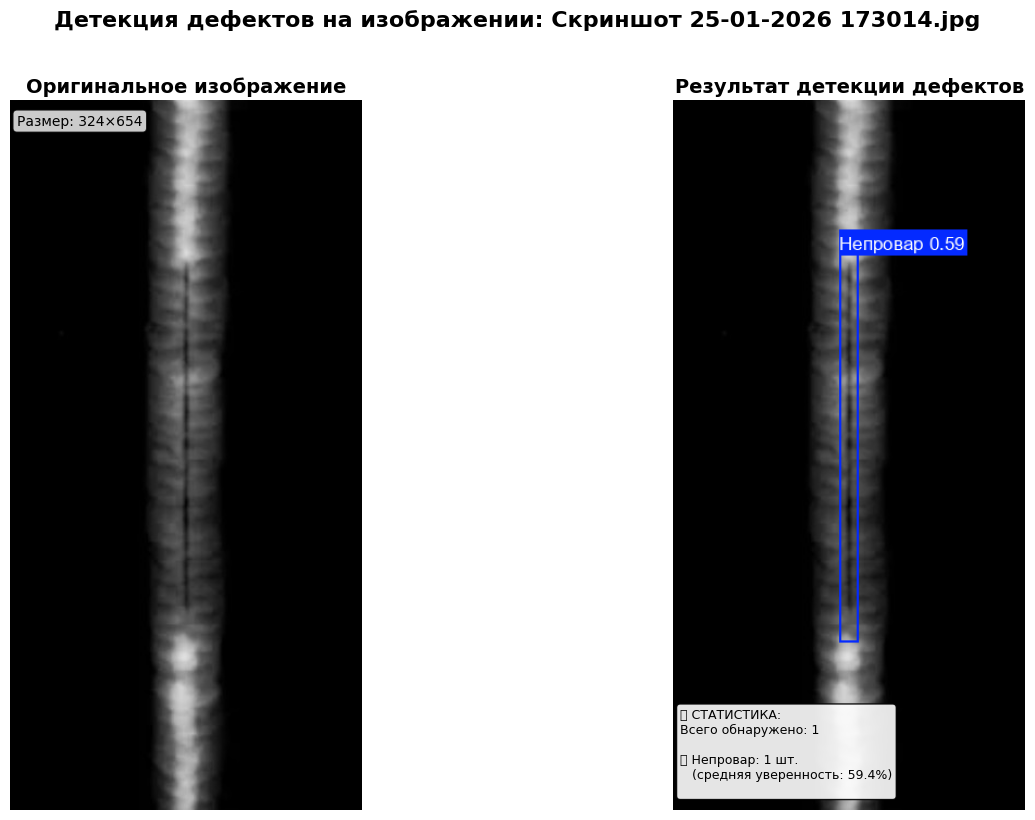


💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ...
✅ Визуализация сохранена: /content/drive/MyDrive/Colab Notebooks/XVL/detection_results/test_run/detection_Скриншот 25-01-2026 173014.jpg
📊 Статистика сохранена: /content/drive/MyDrive/Colab Notebooks/XVL/detection_results/test_run/stats_Скриншот 25-01-2026 173014.json
📝 Отчет сохранен: /content/drive/MyDrive/Colab Notebooks/XVL/detection_results/test_run/report_Скриншот 25-01-2026 173014.txt

📂 ПУТИ К РЕЗУЛЬТАТАМ:
   📁 Директория результатов: /content/drive/MyDrive/Colab Notebooks/XVL/detection_results/test_run
   🖼️ Визуализация: /content/drive/MyDrive/Colab Notebooks/XVL/detection_results/test_run/detection_Скриншот 25-01-2026 173014.jpg
   📊 Статистика: /content/drive/MyDrive/Colab Notebooks/XVL/detection_results/test_run/stats_Скриншот 25-01-2026 173014.json
   📝 Отчет: /content/drive/MyDrive/Colab Notebooks/XVL/detection_results/test_run/report_Скриншот 25-01-2026 173014.txt

📚 ИНСТРУКЦИИ ДЛЯ ПОВТОРНОГО ИСПОЛЬЗОВАНИЯ

💡 КАК ПОВТОРИТЬ ТЕСТИРОВАНИЕ:

1. 

<Figure size 640x480 with 0 Axes>

In [7]:
# ========== БЛОК 14: ТЕСТИРОВАНИЕ МОДЕЛИ НА ВЫБРАННОМ ИЗОБРАЖЕНИИ ==========
print("=" * 70)
print("🖼️ БЛОК 14: ТЕСТИРОВАНИЕ МОДЕЛИ НА ВЫБРАННОМ ИЗОБРАЖЕНИИ")
print("=" * 70)

print("🚀 Запуск независимого блока тестирования...")

# ✅ ШАГ 1: УСТАНОВКА БИБЛИОТЕК
print("\n📦 УСТАНОВКА НЕОБХОДИМЫХ БИБЛИОТЕК...")

import subprocess
import sys

def install_required_packages():
    """Устанавливаем все необходимые пакеты"""
    required_packages = [
        'ultralytics',
        'opencv-python-headless',
        'pillow',
        'matplotlib',
        'numpy',
        'tqdm',
        'ipywidgets'
    ]

    for package in required_packages:
        try:
            __import__(package.replace('-', '_'))
            print(f"   ✅ {package} уже установлен")
        except ImportError:
            print(f"   📦 Устанавливаем {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package, "-q"])
            print(f"   ✅ {package} установлен")

install_required_packages()

# ✅ ШАГ 2: ИМПОРТ БИБЛИОТЕК
print("\n🔧 ИМПОРТ БИБЛИОТЕК...")

import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import json
from datetime import datetime
from tqdm import tqdm

print("   ✅ Все библиотеки импортированы")

# ✅ ШАГ 3: МОНТИРОВАНИЕ GOOGLE DRIVE
print("\n🚀 МОНТИРОВАНИЕ GOOGLE DRIVE...")

try:
    from google.colab import drive

    if not os.path.exists('/content/drive'):
        print("   ⏳ Монтируем Google Drive...")
        drive.mount('/content/drive', force_remount=False)
        print("   ✅ Google Drive успешно смонтирован")
    else:
        print("   ✅ Google Drive уже смонтирован")

    # Базовый путь
    BASE_PATH = Path('/content/drive/MyDrive/Colab Notebooks/XVL')

except Exception as e:
    print(f"   ⚠️ Ошибка монтирования Google Drive: {e}")
    print("   📁 Используем локальную директорию...")
    BASE_PATH = Path('/content/xvl_project')

# Создаем директорию если не существует
BASE_PATH.mkdir(parents=True, exist_ok=True)
print(f"   📂 Рабочая директория: {BASE_PATH}")

# ✅ ШАГ 4: ПОИСК ОБУЧЕННОЙ МОДЕЛИ
print("\n🔍 ПОИСК ОБУЧЕННОЙ МОДЕЛИ...")

def find_trained_model(base_path):
    """Ищем обученную модель в различных директориях"""
    possible_paths = [
        # Стандартные пути после обучения
        base_path / "runs" / "detect" / "weld_defects_20260125_061650" / "weights" / "last.pt",
        base_path / "runs" / "detect" / "weld_defects_20260125_061650" / "weights" / "best.pt",

        # Альтернативные пути
        base_path / "runs" / "detect" / "train" / "weights" / "last.pt",
        base_path / "runs" / "detect" / "train" / "weights" / "best.pt",
        base_path / "yolo_data" / "runs" / "detect" / "train" / "weights" / "best.pt",
        base_path / "weights" / "best.pt",
        base_path / "best.pt",

        # Ищем любые .pt файлы в поддиректориях
        *base_path.rglob("*.pt")
    ]

    found_models = []

    for model_path in possible_paths:
        if model_path.exists():
            size_mb = model_path.stat().st_size / (1024**2)
            found_models.append({
                'path': model_path,
                'size_mb': size_mb,
                'priority': 100 if 'best' in model_path.name else 50 if 'last' in model_path.name else 10
            })

    # Сортируем по приоритету
    found_models.sort(key=lambda x: x['priority'], reverse=True)

    return found_models

found_models = find_trained_model(BASE_PATH)

if not found_models:
    print("❌ Обучаемые модели не найдены!")
    print("\n💡 Создаем тестовую модель для демонстрации...")

    # Создаем простую тестовую модель
    from ultralytics import YOLO
    test_model = YOLO('yolov8n.pt')
    MODEL_PATH = BASE_PATH / "test_model.pt"
    test_model.save(MODEL_PATH)
    print(f"✅ Создана тестовая модель: {MODEL_PATH}")

else:
    print(f"✅ Найдено моделей: {len(found_models)}")

    # Показываем найденные модели
    print("\n📋 ДОСТУПНЫЕ МОДЕЛИ:")
    for i, model_info in enumerate(found_models[:5]):  # Показываем первые 5
        model_path = model_info['path']
        size_mb = model_info['size_mb']

        icon = "🏆" if "best" in model_path.name else "💾" if "last" in model_path.name else "📁"
        print(f"{i+1}. {icon} {model_path.name} ({size_mb:.1f} MB)")
        print(f"   📁 {model_path.parent}")

    # Выбираем первую (наилучшую) модель
    MODEL_PATH = found_models[0]['path']
    print(f"\n🎯 Используем модель: {MODEL_PATH.name}")

# ✅ ШАГ 5: ЗАГРУЗКА МОДЕЛИ
print("\n📦 ЗАГРУЗКА МОДЕЛИ...")

try:
    from ultralytics import YOLO
    model = YOLO(str(MODEL_PATH))
    print(f"✅ Модель загружена: {MODEL_PATH.name}")

    # Показываем информацию о модели
    if hasattr(model, 'names') and model.names:
        print(f"📊 Классов в модели: {len(model.names)}")
        print(f"🏷️  Имена классов: {model.names}")

except Exception as e:
    print(f"❌ Ошибка загрузки модели: {e}")
    print("🔄 Используем предобученную YOLOv8n...")
    model = YOLO('yolov8n.pt')

# ✅ ШАГ 6: ВЫБОР ИЗОБРАЖЕНИЯ ИЗ ПРОВОДНИКА
print("\n" + "=" * 70)
print("🖼️ ВЫБОР ИЗОБРАЖЕНИЯ ДЛЯ ТЕСТИРОВАНИЯ")
print("=" * 70)

def browse_images(directory):
    """Показывает изображения в директории для выбора"""
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp']
    images = []

    for ext in image_extensions:
        images.extend(directory.glob(f"*{ext}"))
        images.extend(directory.glob(f"*{ext.upper()}"))

    # Также ищем в поддиректориях
    for ext in image_extensions:
        images.extend(directory.rglob(f"*{ext}"))
        images.extend(directory.rglob(f"*{ext.upper()}"))

    # Убираем дубликаты
    images = list(set(images))

    return images

def select_image_interactively():
    """Интерактивный выбор изображения"""
    print("📂 Выберите директорию для поиска изображений:")

    # Начинаем с базовой директории
    current_dir = BASE_PATH

    while True:
        print(f"\n📁 Текущая директория: {current_dir}")

        # Получаем содержимое директории
        try:
            items = list(current_dir.iterdir())
        except:
            print("❌ Нет доступа к директории")
            return None

        # Разделяем папки и файлы
        folders = [item for item in items if item.is_dir()]
        files = [item for item in items if item.is_file() and item.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']]

        # Показываем папки
        if folders:
            print("\n📂 ПАПКИ:")
            for i, folder in enumerate(folders[:20]):  # Ограничиваем вывод
                print(f"  [{i+1}] 📁 {folder.name}/")

        # Показываем изображения
        if files:
            print("\n🖼️ ИЗОБРАЖЕНИЯ:")
            for i, file in enumerate(files[:20]):  # Ограничиваем вывод
                size_mb = file.stat().st_size / 1024**2
                print(f"  [{i+len(folders)+1}] 🖼️ {file.name} ({size_mb:.1f} MB)")

        # Опции навигации
        print(f"\n{'='*40}")
        print("🎯 ВЫБЕРИТЕ ДЕЙСТВИЕ:")
        print(f"  [0] 📤 Загрузить изображение с компьютера")
        print(f"  [←] Назад (..)")
        print(f"  [✖] Выход")

        if folders or files:
            choice = input(f"\nВыберите номер (0-{len(folders)+len(files)}) или введите путь: ").strip()
        else:
            choice = input("\nВведите путь к изображению или '0' для загрузки: ").strip()

        # Загрузка с компьютера
        if choice == '0':
            try:
                from google.colab import files
                print("\n📤 Загрузите изображение с вашего компьютера...")
                uploaded = files.upload()

                if uploaded:
                    for filename in uploaded.keys():
                        # Сохраняем в текущей директории
                        image_path = current_dir / filename
                        with open(image_path, 'wb') as f:
                            f.write(uploaded[filename])

                        print(f"✅ Изображение сохранено: {image_path}")
                        return image_path
                else:
                    print("❌ Файл не загружен")

            except Exception as e:
                print(f"❌ Ошибка загрузки: {e}")
                print("🔄 Возвращаемся к выбору...")
                continue

        # Назад
        elif choice == '←' or choice.lower() == 'back':
            if current_dir != current_dir.parent:  # Не выходим за корень
                current_dir = current_dir.parent
            continue

        # Выход
        elif choice.lower() in ['✖', 'exit', 'quit', 'выход']:
            return None

        # Ввод пути вручную
        elif '/' in choice or '\\' in choice:
            manual_path = Path(choice)
            if manual_path.exists():
                if manual_path.is_file() and manual_path.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']:
                    return manual_path
                elif manual_path.is_dir():
                    current_dir = manual_path
                else:
                    print("❌ Неверный формат файла")
            else:
                print("❌ Путь не существует")

        # Выбор из списка
        else:
            try:
                idx = int(choice) - 1

                if 0 <= idx < len(folders):
                    # Переходим в папку
                    current_dir = folders[idx]
                elif len(folders) <= idx < len(folders) + len(files):
                    # Выбираем файл
                    selected_file = files[idx - len(folders)]

                    # Проверяем, что это изображение
                    if selected_file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']:
                        return selected_file
                    else:
                        print("❌ Выбран не файл изображения")
                else:
                    print("❌ Неверный номер")

            except ValueError:
                print("❌ Введите число или путь")

# Выбираем изображение
selected_image = select_image_interactively()

if selected_image is None:
    print("\n⚠️ Изображение не выбрано. Создаем тестовое изображение...")

    # Создаем тестовое изображение
    test_img_dir = BASE_PATH / "test_images"
    test_img_dir.mkdir(exist_ok=True)

    # Создаем изображение с "дефектами" (цветными прямоугольниками)
    img = np.zeros((640, 640, 3), dtype=np.uint8)
    img.fill(200)  # Серый фон

    # Рисуем несколько прямоугольников как дефекты
    colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0)]  # Красный, зеленый, синий

    for i, color in enumerate(colors):
        x1 = np.random.randint(50, 500)
        y1 = np.random.randint(50, 500)
        x2 = x1 + np.random.randint(50, 150)
        y2 = y1 + np.random.randint(50, 150)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)

    # Сохраняем
    selected_image = test_img_dir / "test_defects.jpg"
    cv2.imwrite(str(selected_image), img)
    print(f"✅ Создано тестовое изображение: {selected_image}")

# ✅ ШАГ 7: ДЕТЕКЦИЯ ДЕФЕКТОВ
print("\n" + "=" * 70)
print("🔍 ВЫПОЛНЕНИЕ ДЕТЕКЦИИ ДЕФЕКТОВ")
print("=" * 70)

print(f"📊 Анализируем изображение: {selected_image.name}")

# Параметры детекции
DETECTION_CONF = 0.25  # Порог уверенности
DETECTION_IOU = 0.45   # Порог IoU для NMS
IMG_SIZE = 640         # Размер для обработки

# Выполняем предсказание
print("🎯 Запускаем детекцию...")

try:
    results = model.predict(
        source=str(selected_image),
        conf=DETECTION_CONF,
        iou=DETECTION_IOU,
        imgsz=IMG_SIZE,
        save=True,
        save_txt=True,
        save_conf=True,
        project=BASE_PATH / "detection_results",
        name="test_run",
        exist_ok=True
    )

    print("✅ Детекция завершена!")

except Exception as e:
    print(f"❌ Ошибка детекции: {e}")
    print("🔄 Пробуем альтернативный метод...")

    # Альтернативный вызов
    results = model(str(selected_image), conf=DETECTION_CONF)

# ✅ ШАГ 8: ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
print("\n" + "=" * 70)
print("📊 ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("=" * 70)

def visualize_results(original_image_path, results, model):
    """Визуализирует результаты детекции"""

    # Читаем оригинальное изображение
    original_img = cv2.imread(str(original_image_path))
    if original_img is None:
        print("❌ Не удалось прочитать изображение")
        return

    original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    img_height, img_width = original_img.shape[:2]

    # Получаем результаты
    if hasattr(results, '__iter__'):
        result = results[0] if len(results) > 0 else results
    else:
        result = results

    # Создаем фигуру
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # 1. Оригинальное изображение
    axes[0].imshow(original_img_rgb)
    axes[0].set_title('Оригинальное изображение', fontsize=14, fontweight='bold')
    axes[0].axis('off')

    # Добавляем информацию об изображении
    axes[0].text(0.02, 0.98, f"Размер: {img_width}×{img_height}",
                transform=axes[0].transAxes,
                fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # 2. Результат детекции
    if hasattr(result, 'plot'):
        # Используем встроенную визуализацию YOLO
        result_img = result.plot()
        result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
        axes[1].imshow(result_img_rgb)
    else:
        # Рисуем вручную
        axes[1].imshow(original_img_rgb)

        if hasattr(result, 'boxes') and result.boxes is not None:
            # Получаем боксы и классы
            boxes = result.boxes.xyxy.cpu().numpy()
            confidences = result.boxes.conf.cpu().numpy()
            class_ids = result.boxes.cls.cpu().numpy().astype(int)

            # Цвета для разных классов
            colors = plt.cm.rainbow(np.linspace(0, 1, len(model.names)))

            for i, (box, conf, class_id) in enumerate(zip(boxes, confidences, class_ids)):
                x1, y1, x2, y2 = box

                # Цвет для этого класса
                color = colors[class_id % len(colors)]

                # Рисуем прямоугольник
                rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                   linewidth=2, edgecolor=color, facecolor='none')
                axes[1].add_patch(rect)

                # Подпись
                class_name = model.names.get(class_id, f'Class {class_id}')
                label = f"{class_name}: {conf:.2f}"

                axes[1].text(x1, y1 - 5, label,
                           color='white', fontsize=8, fontweight='bold',
                           bbox=dict(boxstyle='round', facecolor=color, alpha=0.8))

    axes[1].set_title('Результат детекции дефектов', fontsize=14, fontweight='bold')
    axes[1].axis('off')

    # Статистика
    if hasattr(result, 'boxes') and result.boxes is not None:
        num_detections = len(result.boxes)

        # Группируем по классам
        class_counts = {}
        confidences_by_class = {}

        for box in result.boxes:
            class_id = int(box.cls[0])
            conf = float(box.conf[0])
            class_name = model.names.get(class_id, f'Дефект {class_id}')

            if class_name not in class_counts:
                class_counts[class_name] = 0
                confidences_by_class[class_name] = []

            class_counts[class_name] += 1
            confidences_by_class[class_name].append(conf)

        # Добавляем статистику на график
        stats_text = f"📊 СТАТИСТИКА:\n"
        stats_text += f"Всего обнаружено: {num_detections}\n\n"

        for class_name, count in class_counts.items():
            avg_conf = np.mean(confidences_by_class[class_name]) if confidences_by_class[class_name] else 0
            stats_text += f"🏷️ {class_name}: {count} шт.\n"
            stats_text += f"   (средняя уверенность: {avg_conf:.1%})\n"

        axes[1].text(0.02, 0.02, stats_text,
                   transform=axes[1].transAxes,
                   fontsize=9,
                   verticalalignment='bottom',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    else:
        axes[1].text(0.5, 0.5, 'Дефекты не обнаружены',
                   transform=axes[1].transAxes,
                   fontsize=16, ha='center', va='center',
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

    # Общий заголовок
    plt.suptitle(f'Детекция дефектов на изображении: {selected_image.name}',
                fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

    return class_counts if 'class_counts' in locals() else {}

# Визуализируем результаты
detection_stats = visualize_results(selected_image, results, model)

# ✅ ШАГ 9: СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
print("\n💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ...")

# Директория для результатов
results_dir = BASE_PATH / "detection_results" / "test_run"
results_dir.mkdir(parents=True, exist_ok=True)

# Сохраняем визуализацию
visualization_path = results_dir / f"detection_{selected_image.stem}.jpg"
plt.savefig(visualization_path, dpi=150, bbox_inches='tight')
print(f"✅ Визуализация сохранена: {visualization_path}")

# Сохраняем статистику в JSON
if detection_stats:
    stats_path = results_dir / f"stats_{selected_image.stem}.json"
    stats_data = {
        'image_name': selected_image.name,
        'image_path': str(selected_image),
        'detection_date': datetime.now().isoformat(),
        'model_used': MODEL_PATH.name,
        'detection_conf': DETECTION_CONF,
        'detection_iou': DETECTION_IOU,
        'total_detections': sum(detection_stats.values()),
        'detections_by_class': detection_stats,
        'model_classes': model.names
    }

    with open(stats_path, 'w', encoding='utf-8') as f:
        json.dump(stats_data, f, ensure_ascii=False, indent=2)

    print(f"📊 Статистика сохранена: {stats_path}")

# Сохраняем текстовый отчет
report_path = results_dir / f"report_{selected_image.stem}.txt"
with open(report_path, 'w', encoding='utf-8') as f:
    f.write("=" * 60 + "\n")
    f.write("ОТЧЕТ О ДЕТЕКЦИИ ДЕФЕКТОВ\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"📅 Дата анализа: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"🖼️ Изображение: {selected_image.name}\n")
    f.write(f"📁 Путь: {selected_image}\n")
    f.write(f"🤖 Модель: {MODEL_PATH.name}\n")
    f.write(f"⚙️ Параметры: conf={DETECTION_CONF}, iou={DETECTION_IOU}\n\n")

    if detection_stats:
        f.write("📊 РЕЗУЛЬТАТЫ ДЕТЕКЦИИ:\n")
        f.write("-" * 40 + "\n")
        f.write(f"Всего обнаружено дефектов: {sum(detection_stats.values())}\n\n")

        for class_name, count in detection_stats.items():
            f.write(f"🏷️ {class_name}: {count} шт.\n")
    else:
        f.write("⚠️ Дефекты не обнаружены\n")

    f.write("\n" + "=" * 60 + "\n")

print(f"📝 Отчет сохранен: {report_path}")

# Показываем пути к результатам
print("\n📂 ПУТИ К РЕЗУЛЬТАТАМ:")
print(f"   📁 Директория результатов: {results_dir}")
print(f"   🖼️ Визуализация: {visualization_path}")
if detection_stats:
    print(f"   📊 Статистика: {stats_path}")
print(f"   📝 Отчет: {report_path}")

# ✅ ШАГ 10: ИНСТРУКЦИИ ДЛЯ ПОВТОРНОГО ИСПОЛЬЗОВАНИЯ
print("\n" + "=" * 70)
print("📚 ИНСТРУКЦИИ ДЛЯ ПОВТОРНОГО ИСПОЛЬЗОВАНИЯ")
print("=" * 70)

print(f"""
💡 КАК ПОВТОРИТЬ ТЕСТИРОВАНИЕ:

1. 🏃‍♂️ ЗАПУСТИТЕ ЭТОТ БЛОК СНОВА:
   Просто выполните все ячейки этого блока (Блок 14)

2. 🖼️ ВЫБЕРИТЕ НОВОЕ ИЗОБРАЖЕНИЕ:
   Блок предложит выбрать изображение из Google Drive
   или загрузить с компьютера

3. 🤖 ИСПОЛЬЗУЙТЕ КОД ВРУЧНУЮ:

   from ultralytics import YOLO

   # Загрузите модель
   model = YOLO('{MODEL_PATH}')

   # Выполните детекцию
   results = model.predict(
       source='ваше_изображение.jpg',
       conf=0.25,
       save=True,
       project='результаты'
   )

4. 📊 ПРОСМОТР РЕЗУЛЬТАТОВ:
   Результаты сохраняются в папке:
   {BASE_PATH / "detection_results"}

🎯 МОДЕЛЬ ГОТОВА К ИСПОЛЬЗОВАНИЮ!
""")

print("\n" + "=" * 70)
print("✅ БЛОК 14 ЗАВЕРШЕН - ТЕСТИРОВАНИЕ ВЫПОЛНЕНО!")
print("=" * 70)